In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from matplotlib import pyplot
import os
import time
from keras.layers import Dropout
from keras import regularizers
from sklearn import cross_validation
import random
from sklearn.gaussian_process import gaussian_process

C:\Users\Christian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Christian\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
hoje = time.strftime("%d-%m")
my_path = 'Imagens'
epo = 250
moptimizer = Adagrad(lr=0.01)

datos= pd.read_csv("roboBohr.csv")
datos.shape
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]
df_val=datos[int(0.6*total):int(0.85*total)]          
df_test=datos[int(0.85*total)::]

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
y_test = df_test.pop('Eat').values.reshape(-1,1)
X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

idim=X_train_scaled.shape[1]

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 227us/step - loss: 1.5260 - mean_squared_error: 1.5260 - val_loss: 0.5899 - val_mean_squared_error: 0.5899
Epoch 2/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.6122 - mean_squared_error: 0.6122 - val_loss: 0.4825 - val_mean_squared_error: 0.4825
Epoch 3/250
9745/9745 [==============================] - 2s 168us/step - loss: 0.5050 - mean_squared_error: 0.5050 - val_loss: 0.3876 - val_mean_squared_error: 0.3876
Epoch 4/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.4282 - mean_squared_error: 0.4282 - val_loss: 0.3498 - val_mean_squared_error: 0.3498
Epoch 5/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.3715 - mean_squared_error: 0.3715 - val_loss: 0.3121 - val_mean_squared_error: 0.3121
Epoch 6/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.3249 - mean_squared_error: 0.3249 - 

Epoch 98/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 99/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 100/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 101/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 102/250
9745/9745 [==============================] - 1s 128us/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 103/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0424 - val_mean_squared_er

9745/9745 [==============================] - 1s 131us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 195/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 196/250
9745/9745 [==============================] - 1s 130us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 197/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 198/250
9745/9745 [==============================] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.01 - 1s 131us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 199/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0168 - mean_squared_error: 0.0168 

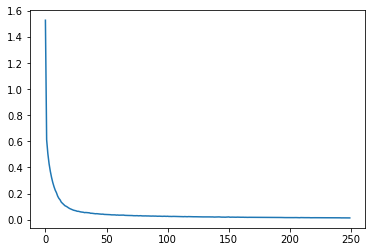

In [3]:
#Sigmoidal
SigModel = Sequential()
SigModel.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
SigModel.add(Dense(1, kernel_initializer='uniform',activation="linear"))
SigModel.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])
SigHistory = SigModel.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
a = pyplot.plot(SigHistory.history['mean_squared_error'])
a = pyplot.savefig(os.path.join(my_path, 'Sig_History_EX1_%s.png')%hoje)

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 201us/step - loss: 135.6896 - mean_squared_error: 135.6896 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 2/250
9745/9745 [==============================] - 2s 170us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 3/250
9745/9745 [==============================] - 2s 163us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 4/250
9745/9745 [==============================] - 2s 175us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 5/250
9745/9745 [==============================] - 2s 183us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 6/250
9745/9745 [==============================] - 2s 191us/step - loss

9745/9745 [==============================] - 2s 181us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 94/250
9745/9745 [==============================] - 2s 171us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 95/250
9745/9745 [==============================] - 2s 171us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 96/250
9745/9745 [==============================] - 2s 175us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 97/250
9745/9745 [==============================] - 2s 181us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 98/250
9745/9745 [==============================] - 2s 181us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 2s 202us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 2s 198us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 2s 191us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 188/250
9745/9745 [==============================] - 2s 195us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 189/250
9745/9745 [==============================] - 2s 202us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 190/250
9745/9745 [==============================] - 2s 195us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

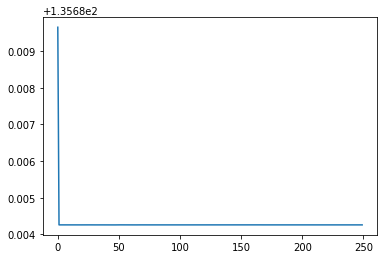

In [4]:
        #Relu
ReluModel = Sequential()
ReluModel.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
ReluModel.add(Dense(1, kernel_initializer='uniform',activation="relu"))
ReluModel.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])
ReluHistory = ReluModel.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
b = pyplot.plot(ReluHistory.history['mean_squared_error'])
b = pyplot.savefig(os.path.join(my_path, 'Relu_History_EX1_%s.png')%hoje)

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 221us/step - loss: 4.3430 - mean_squared_error: 4.3430 - val_loss: 1.2609 - val_mean_squared_error: 1.2609
Epoch 2/250
9745/9745 [==============================] - 2s 202us/step - loss: 1.2637 - mean_squared_error: 1.2637 - val_loss: 0.9664 - val_mean_squared_error: 0.9664
Epoch 3/250
9745/9745 [==============================] - 2s 202us/step - loss: 1.0717 - mean_squared_error: 1.0717 - val_loss: 0.8646 - val_mean_squared_error: 0.8646
Epoch 4/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.9495 - mean_squared_error: 0.9495 - val_loss: 0.7547 - val_mean_squared_error: 0.7547
Epoch 5/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.8675 - mean_squared_error: 0.8675 - val_loss: 0.6908 - val_mean_squared_error: 0.6908
Epoch 6/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.8085 - mean_squared_error: 0.8085 - 

Epoch 98/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.2169 - mean_squared_error: 0.2169 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 99/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.2146 - mean_squared_error: 0.2146 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 100/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.2117 - mean_squared_error: 0.2117 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 101/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.2100 - mean_squared_error: 0.2100 - val_loss: 0.2041 - val_mean_squared_error: 0.2041
Epoch 102/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.2077 - mean_squared_error: 0.2077 - val_loss: 0.2043 - val_mean_squared_error: 0.2043
Epoch 103/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.2055 - mean_squared_error: 0.2055 - val_loss: 0.2018 - val_mean_squared_er

9745/9745 [==============================] - 2s 172us/step - loss: 0.0918 - mean_squared_error: 0.0918 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 195/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0911 - mean_squared_error: 0.0911 - val_loss: 0.1089 - val_mean_squared_error: 0.1089
Epoch 196/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1087 - val_mean_squared_error: 0.1087
Epoch 197/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.1076 - val_mean_squared_error: 0.1076
Epoch 198/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1068 - val_mean_squared_error: 0.1068
Epoch 199/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0888 - mean_squared_error: 0.0888 - val_loss: 0.1073 - val_mean_squared_error: 0.1073


9745/9745 [==============================] - 2s 177us/step - loss: 0.2759 - mean_squared_error: 0.2759 - val_loss: 0.2489 - val_mean_squared_error: 0.2489
Epoch 41/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.2699 - mean_squared_error: 0.2699 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 42/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2647 - mean_squared_error: 0.2647 - val_loss: 0.2427 - val_mean_squared_error: 0.2427
Epoch 43/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.2585 - mean_squared_error: 0.2585 - val_loss: 0.2360 - val_mean_squared_error: 0.2360
Epoch 44/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.2533 - mean_squared_error: 0.2533 - val_loss: 0.2330 - val_mean_squared_error: 0.2330
Epoch 45/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.2483 - mean_squared_error: 0.2483 - val_loss: 0.2285 - val_mean_squared_error: 0.2285
Epoch

Epoch 89/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.1094 - mean_squared_error: 0.1094 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 90/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.1076 - mean_squared_error: 0.1076 - val_loss: 0.1206 - val_mean_squared_error: 0.1206
Epoch 91/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1061 - mean_squared_error: 0.1061 - val_loss: 0.1194 - val_mean_squared_error: 0.1194
Epoch 92/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 93/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.1181 - val_mean_squared_error: 0.1181
Epoch 94/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.1015 - mean_squared_error: 0.1015 - val_loss: 0.1154 - val_mean_squared_error:

9745/9745 [==============================] - 2s 213us/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0651 - val_mean_squared_error: 0.0651
Epoch 186/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0477 - mean_squared_error: 0.0477 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 187/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 188/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 189/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 190/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0638 - val_mean_squared_error: 0.0638


9745/9745 [==============================] - 1s 143us/step - loss: 0.2350 - mean_squared_error: 0.2350 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 32/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.2272 - mean_squared_error: 0.2272 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 33/250
9745/9745 [==============================] - 1s 146us/step - loss: 0.2218 - mean_squared_error: 0.2218 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 34/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.2144 - mean_squared_error: 0.2144 - val_loss: 0.2056 - val_mean_squared_error: 0.2056
Epoch 35/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2087 - mean_squared_error: 0.2087 - val_loss: 0.2024 - val_mean_squared_error: 0.2024
Epoch 36/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.2020 - mean_squared_error: 0.2020 - val_loss: 0.1963 - val_mean_squared_error: 0.1963
Epoch

Epoch 80/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 81/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 82/250
9745/9745 [==============================] - 1s 144us/step - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 83/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0877 - val_mean_squared_error: 0.0877
Epoch 84/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 85/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0864 - val_mean_squared_error:

9745/9745 [==============================] - 1s 134us/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 177/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 178/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 179/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 180/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 181/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


9745/9745 [==============================] - 1s 135us/step - loss: 0.2475 - mean_squared_error: 0.2475 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Epoch 23/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2379 - mean_squared_error: 0.2379 - val_loss: 0.2184 - val_mean_squared_error: 0.2184
Epoch 24/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 25/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.2190 - mean_squared_error: 0.2190 - val_loss: 0.2073 - val_mean_squared_error: 0.2073
Epoch 26/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2108 - mean_squared_error: 0.2108 - val_loss: 0.2006 - val_mean_squared_error: 0.2006
Epoch 27/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.2029 - mean_squared_error: 0.2029 - val_loss: 0.1949 - val_mean_squared_error: 0.1949
Epoch

Epoch 71/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 72/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.0807 - val_mean_squared_error: 0.0807
Epoch 73/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0861 - val_mean_squared_error: 0.0861
Epoch 74/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 75/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 76/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0826 - val_mean_squared_error:

9745/9745 [==============================] - 1s 132us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 168/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 169/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 170/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 171/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 172/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0502 - val_mean_squared_error: 0.0502


9745/9745 [==============================] - 1s 139us/step - loss: 0.3357 - mean_squared_error: 0.3357 - val_loss: 0.2888 - val_mean_squared_error: 0.2888
Epoch 14/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.3165 - mean_squared_error: 0.3165 - val_loss: 0.2721 - val_mean_squared_error: 0.2721
Epoch 15/250
9745/9745 [==============================] - 1s 144us/step - loss: 0.3010 - mean_squared_error: 0.3010 - val_loss: 0.2637 - val_mean_squared_error: 0.2637
Epoch 16/250
9745/9745 [==============================] - 1s 137us/step - loss: 0.2853 - mean_squared_error: 0.2853 - val_loss: 0.2540 - val_mean_squared_error: 0.2540
Epoch 17/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.2700 - mean_squared_error: 0.2700 - val_loss: 0.2552 - val_mean_squared_error: 0.2552
Epoch 18/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.2557 - mean_squared_error: 0.2557 - val_loss: 0.2337 - val_mean_squared_error: 0.2337
Epoch

Epoch 62/250
9745/9745 [==============================] - 2s 228us/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 63/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 64/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0727 - val_mean_squared_error: 0.0727
Epoch 65/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 66/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 67/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0704 - val_mean_squared_error:

Epoch 111/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0523 - val_mean_squared_error: 0.0523
Epoch 112/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 113/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 114/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 115/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 116/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0508 - val_mean_squared_

9745/9745 [==============================] - 1s 142us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 208/250
9745/9745 [==============================] - 1s 135us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 209/250
9745/9745 [==============================] - 1s 129us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 210/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 211/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 212/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0432 - val_mean_squared_error: 0.0432


Epoch 54/250
9745/9745 [==============================] - 1s 129us/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 55/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 56/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 57/250
9745/9745 [==============================] - 1s 129us/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 58/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 59/250
9745/9745 [==============================] - 1s 130us/step - loss: 0.0521 - mean_squared_error: 0.0521 - val_loss: 0.0689 - val_mean_squared_error:

9745/9745 [==============================] - 2s 166us/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 151/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 152/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 153/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 154/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 155/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0445 - val_mean_squared_error: 0.0445


9745/9745 [==============================] - 1s 146us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 247/250
9745/9745 [==============================] - 1s 144us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 248/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 249/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 250/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 170us/step - loss: 1.6653 - mean_squared_error: 1.6653 - val_

Epoch 93/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 94/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 95/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 96/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 97/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 98/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0525 - val_mean_squared_error:

9745/9745 [==============================] - 1s 133us/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 190/250
9745/9745 [==============================] - 1s 150us/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 191/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 192/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 193/250
9745/9745 [==============================] - 1s 150us/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 194/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0428 - val_mean_squared_error: 0.0428


9745/9745 [==============================] - 2s 191us/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 36/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 37/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0768 - val_mean_squared_error: 0.0768
Epoch 38/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.0637 - mean_squared_error: 0.0637 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 39/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 40/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch

Epoch 84/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 85/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 86/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 87/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 88/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 89/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0494 - val_mean_squared_error:

9745/9745 [==============================] - 2s 214us/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 181/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 182/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 183/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 184/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 185/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


9745/9745 [==============================] - 2s 183us/step - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.1195 - val_mean_squared_error: 0.1195
Epoch 27/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0960 - val_mean_squared_error: 0.0960
Epoch 28/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.0936 - val_mean_squared_error: 0.0936
Epoch 29/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0768 - mean_squared_error: 0.0768 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 30/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 31/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0825 - val_mean_squared_error: 0.0825
Epoch

Epoch 75/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 76/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 77/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 78/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 79/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 80/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0494 - val_mean_squared_error:

9745/9745 [==============================] - 2s 207us/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 172/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 173/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 174/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 175/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 176/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0402 - val_mean_squared_error: 0.0402


9745/9745 [==============================] - 2s 234us/step - loss: 0.1312 - mean_squared_error: 0.1312 - val_loss: 0.1591 - val_mean_squared_error: 0.1591
Epoch 18/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 19/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1216 - val_mean_squared_error: 0.1216
Epoch 20/250
9745/9745 [==============================] - 3s 308us/step - loss: 0.1075 - mean_squared_error: 0.1075 - val_loss: 0.1198 - val_mean_squared_error: 0.1198
Epoch 21/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch 22/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.0942 - mean_squared_error: 0.0942 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch

Epoch 66/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 67/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 68/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0602 - val_mean_squared_error: 0.0602
Epoch 69/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 70/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 71/250
9745/9745 [==============================] - 1s 154us/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0507 - val_mean_squared_error:

Epoch 115/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 116/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 117/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 118/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 119/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 120/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0418 - val_mean_squared_

9745/9745 [==============================] - 3s 268us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 212/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 213/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 214/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 215/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 216/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0403 - val_mean_squared_error: 0.0403


Epoch 58/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 59/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 60/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 61/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0625 - val_mean_squared_error: 0.0625
Epoch 62/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 63/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0580 - val_mean_squared_error:

Epoch 107/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 108/250
9745/9745 [==============================] - 3s 327us/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 109/250
9745/9745 [==============================] - 3s 288us/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 110/250
9745/9745 [==============================] - 3s 325us/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 111/250
9745/9745 [==============================] - 3s 316us/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 112/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0500 - val_mean_squared_

9745/9745 [==============================] - 2s 243us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 204/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 205/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 206/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 207/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 208/250
9745/9745 [==============================] - 2s 242us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0362 - val_mean_squared_error: 0.0362


Epoch 50/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.1464 - val_mean_squared_error: 0.1464
Epoch 51/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0654 - val_mean_squared_error: 0.0654
Epoch 52/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0591 - val_mean_squared_error: 0.0591
Epoch 53/250
9745/9745 [==============================] - 2s 217us/step - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 54/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 55/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0740 - val_mean_squared_error:

Epoch 99/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 100/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 101/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 102/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 103/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 104/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0523 - val_mean_squared_e

9745/9745 [==============================] - 3s 261us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 196/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0604 - val_mean_squared_error: 0.0604
Epoch 197/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 198/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 199/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 200/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0393 - val_mean_squared_error: 0.0393


9745/9745 [==============================] - 2s 215us/step - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0851 - val_mean_squared_error: 0.0851
Epoch 42/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.1069 - val_mean_squared_error: 0.1069
Epoch 43/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 44/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 45/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 46/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch

Epoch 90/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 91/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 92/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0587 - val_mean_squared_error: 0.0587
Epoch 93/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 94/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 95/250
9745/9745 [==============================] - 2s 219us/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0411 - val_mean_squared_error:

9745/9745 [==============================] - 2s 209us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 187/250
9745/9745 [==============================] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.01 - 2s 205us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 188/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 189/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 190/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 191/250
9745/9745 [==============================] - 2s 219us/step - loss: 0.0174 - mean_squared_error: 0.0174 

9745/9745 [==============================] - 3s 273us/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 33/250
9745/9745 [==============================] - 3s 280us/step - loss: 0.0536 - mean_squared_error: 0.0536 - val_loss: 0.1040 - val_mean_squared_error: 0.1040
Epoch 34/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0751 - val_mean_squared_error: 0.0751
Epoch 35/250
9745/9745 [==============================] - 3s 285us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 36/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0873 - val_mean_squared_error: 0.0873
Epoch 37/250
9745/9745 [==============================] - 2s 252us/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch

Epoch 81/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 82/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 83/250
9745/9745 [==============================] - 2s 225us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 84/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 85/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0480 - val_mean_squared_error: 0.0480
Epoch 86/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0428 - val_mean_squared_error:

9745/9745 [==============================] - 1s 142us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 178/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 179/250
9745/9745 [==============================] - 1s 143us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 180/250
9745/9745 [==============================] - 1s 152us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 181/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 182/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0431 - val_mean_squared_error: 0.0431


9745/9745 [==============================] - 1s 143us/step - loss: 0.0681 - mean_squared_error: 0.0681 - val_loss: 0.0836 - val_mean_squared_error: 0.0836
Epoch 24/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.1193 - val_mean_squared_error: 0.1193
Epoch 25/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0858 - val_mean_squared_error: 0.0858
Epoch 26/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 27/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0671 - val_mean_squared_error: 0.0671
Epoch 28/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch

Epoch 72/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 73/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 74/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 75/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 76/250
9745/9745 [==============================] - 1s 141us/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 77/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0474 - val_mean_squared_error:

9745/9745 [==============================] - 1s 150us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 169/250
9745/9745 [==============================] - 1s 143us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 170/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 171/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 172/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 173/250
9745/9745 [==============================] - 1s 149us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0323 - val_mean_squared_error: 0.0323


9745/9745 [==============================] - 1s 138us/step - loss: 0.1154 - mean_squared_error: 0.1154 - val_loss: 0.1433 - val_mean_squared_error: 0.1433
Epoch 15/250
9745/9745 [==============================] - 1s 142us/step - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.1704 - val_mean_squared_error: 0.1704
Epoch 16/250
9745/9745 [==============================] - 1s 137us/step - loss: 0.0995 - mean_squared_error: 0.0995 - val_loss: 0.1391 - val_mean_squared_error: 0.1391
Epoch 17/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 18/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.3352 - val_mean_squared_error: 0.3352
Epoch 19/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0850 - mean_squared_error: 0.0850 - val_loss: 0.0907 - val_mean_squared_error: 0.0907
Epoch

Epoch 63/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 64/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 65/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0782 - val_mean_squared_error: 0.0782
Epoch 66/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 67/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 68/250
9745/9745 [==============================] - 2s 158us/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0495 - val_mean_squared_error:

Epoch 112/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 113/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 114/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 115/250
9745/9745 [==============================] - 2s 169us/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 116/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 117/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0481 - val_mean_squared_

9745/9745 [==============================] - 2s 198us/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 209/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 210/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 211/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 212/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 213/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0418 - val_mean_squared_error: 0.0418


Epoch 55/250
9745/9745 [==============================] - 3s 291us/step - loss: 0.0418 - mean_squared_error: 0.0418 - val_loss: 0.0689 - val_mean_squared_error: 0.0689
Epoch 56/250
9745/9745 [==============================] - 3s 284us/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 57/250
9745/9745 [==============================] - 3s 293us/step - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 58/250
9745/9745 [==============================] - 3s 287us/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 59/250
9745/9745 [==============================] - 2s 256us/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 60/250
9745/9745 [==============================] - 1s 146us/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0692 - val_mean_squared_error:

Epoch 104/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 105/250
9745/9745 [==============================] - 2s 154us/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 106/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 107/250
9745/9745 [==============================] - 1s 149us/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 108/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 109/250
9745/9745 [==============================] - 1s 143us/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0460 - val_mean_squared_

9745/9745 [==============================] - 2s 229us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 201/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 202/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 203/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 204/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 205/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0372 - val_mean_squared_error: 0.0372


9745/9745 [==============================] - 3s 257us/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 47/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 48/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 49/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 50/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 51/250
9745/9745 [==============================] - 3s 283us/step - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch

Epoch 95/250
9745/9745 [==============================] - 2s 156us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 96/250
9745/9745 [==============================] - 1s 143us/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 97/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0709 - val_mean_squared_error: 0.0709
Epoch 98/250
9745/9745 [==============================] - 1s 130us/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 99/250
9745/9745 [==============================] - 1s 149us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 100/250
9745/9745 [==============================] - 2s 156us/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0469 - val_mean_squared_error

9745/9745 [==============================] - 2s 178us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 192/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0473 - val_mean_squared_error: 0.0473
Epoch 193/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 194/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 195/250
9745/9745 [==============================] - 1s 151us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 196/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0423 - val_mean_squared_error: 0.0423


9745/9745 [==============================] - 1s 125us/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0589 - val_mean_squared_error: 0.0589
Epoch 38/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 39/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 40/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0639 - val_mean_squared_error: 0.0639
Epoch 41/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1012 - val_mean_squared_error: 0.1012
Epoch 42/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0944 - val_mean_squared_error: 0.0944s: 0.0

9745/9745 [==============================] - 3s 261us/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 134/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 135/250
9745/9745 [==============================] - 2s 239us/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 136/250
9745/9745 [==============================] - 2s 237us/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 137/250
9745/9745 [==============================] - 2s 255us/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 138/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


9745/9745 [==============================] - 2s 157us/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 230/250
9745/9745 [==============================] - 2s 155us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 231/250
9745/9745 [==============================] - 1s 153us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 232/250
9745/9745 [==============================] - 2s 157us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 233/250
9745/9745 [==============================] - 2s 155us/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 234/250
9745/9745 [==============================] - 2s 158us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


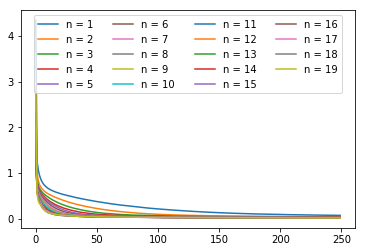

In [5]:
n_lr = 20
lear_rate = np.linspace(0,0.015,n_lr)
n = 1

while n < n_lr:
    
        #Sigmoidal
    SigModelValLear = Sequential()
    SigModelValLear.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    SigModelValLear.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    SigModelValLear.compile(optimizer=SGD(lr=lear_rate[n]),loss='mean_squared_error',metrics=['mse'])
    SigHistoryValLear = SigModelValLear.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    pyplot.plot(SigHistoryValLear.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Sig_%s.png')% (hoje))
    
    n = n+1



Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 215us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 2/250
9745/9745 [==============================] - 2s 163us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 3/250
9745/9745 [==============================] - 2s 159us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 4/250
9745/9745 [==============================] - 1s 144us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 5/250
9745/9745 [==============================] - 1s 131us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 6/250
9745/9745 [==============================] - 1s 130us/step - loss

9745/9745 [==============================] - 2s 174us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 94/250
9745/9745 [==============================] - 2s 173us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 95/250
9745/9745 [==============================] - 2s 174us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 96/250
9745/9745 [==============================] - 2s 173us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 97/250
9745/9745 [==============================] - 2s 175us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 98/250
9745/9745 [==============================] - 2s 173us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 1

9745/9745 [==============================] - 2s 197us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 186/250
9745/9745 [==============================] - 2s 199us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 187/250
9745/9745 [==============================] - 2s 206us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 188/250
9745/9745 [==============================] - 2s 198us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 189/250
9745/9745 [==============================] - 2s 198us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_loss: 166.6554 - val_mean_squared_error: 166.6554
Epoch 190/250
9745/9745 [==============================] - 2s 208us/step - loss: 146.5140 - mean_squared_error: 146.5140 - val_lo

9745/9745 [==============================] - 1s 134us/step - loss: 135.6870 - mean_squared_error: 135.6870 - val_loss: 155.2186 - val_mean_squared_error: 155.2186
Epoch 28/250
9745/9745 [==============================] - 2s 188us/step - loss: 135.6869 - mean_squared_error: 135.6869 - val_loss: 155.2184 - val_mean_squared_error: 155.2184
Epoch 29/250
9745/9745 [==============================] - 2s 183us/step - loss: 135.6868 - mean_squared_error: 135.6868 - val_loss: 155.2183 - val_mean_squared_error: 155.2183
Epoch 30/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.6867 - mean_squared_error: 135.6867 - val_loss: 155.2182 - val_mean_squared_error: 155.2182
Epoch 31/250
9745/9745 [==============================] - 2s 232us/step - loss: 135.6866 - mean_squared_error: 135.6866 - val_loss: 155.2182 - val_mean_squared_error: 155.2182
Epoch 32/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.6865 - mean_squared_error: 135.6865 - val_loss: 1

9745/9745 [==============================] - 1s 128us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 120/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 121/250
9745/9745 [==============================] - 1s 146us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 122/250
9745/9745 [==============================] - 2s 179us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 123/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6847 - mean_squared_error: 135.6847 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 124/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.6847 - mean_squared_error: 135.6847 - val_lo

9745/9745 [==============================] - 1s 128us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 212/250
9745/9745 [==============================] - ETA: 0s - loss: 135.6024 - mean_squared_error: 135.60 - 1s 125us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 213/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 214/250
9745/9745 [==============================] - 2s 167us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 215/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 216/250
9745/9745 [==============================] - 2s 216us/step 

9745/9745 [==============================] - 2s 217us/step - loss: 135.6849 - mean_squared_error: 135.6849 - val_loss: 155.2164 - val_mean_squared_error: 155.2164
Epoch 53/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 54/250
9745/9745 [==============================] - 2s 202us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 55/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 56/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 57/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 1

9745/9745 [==============================] - 2s 211us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 145/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 146/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 147/250
9745/9745 [==============================] - 2s 208us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 148/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 149/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_lo

9745/9745 [==============================] - 2s 209us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 237/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 238/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 239/250
9745/9745 [==============================] - 2s 205us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 240/250
9745/9745 [==============================] - 2s 187us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 241/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_lo

9745/9745 [==============================] - 1s 127us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 79/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 80/250
9745/9745 [==============================] - 1s 139us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 81/250
9745/9745 [==============================] - 2s 234us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 82/250
9745/9745 [==============================] - 3s 291us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 83/250
9745/9745 [==============================] - 3s 288us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 1

9745/9745 [==============================] - 2s 167us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 171/250
9745/9745 [==============================] - 3s 277us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 172/250
9745/9745 [==============================] - 3s 281us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 173/250
9745/9745 [==============================] - 3s 283us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 174/250
9745/9745 [==============================] - 2s 233us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 175/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_lo

9745/9745 [==============================] - 1s 129us/step - loss: 135.6857 - mean_squared_error: 135.6857 - val_loss: 155.2171 - val_mean_squared_error: 155.2171
Epoch 13/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_loss: 155.2170 - val_mean_squared_error: 155.2170
Epoch 14/250
9745/9745 [==============================] - 1s 146us/step - loss: 135.6855 - mean_squared_error: 135.6855 - val_loss: 155.2169 - val_mean_squared_error: 155.2169
Epoch 15/250
9745/9745 [==============================] - 2s 177us/step - loss: 135.6854 - mean_squared_error: 135.6854 - val_loss: 155.2168 - val_mean_squared_error: 155.2168
Epoch 16/250
9745/9745 [==============================] - 3s 270us/step - loss: 135.6853 - mean_squared_error: 135.6853 - val_loss: 155.2168 - val_mean_squared_error: 155.2168
Epoch 17/250
9745/9745 [==============================] - 3s 270us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 1

9745/9745 [==============================] - 3s 304us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 105/250
9745/9745 [==============================] - 3s 318us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 106/250
9745/9745 [==============================] - 2s 163us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 107/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 108/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 109/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_lo

9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 197/250
9745/9745 [==============================] - 1s 147us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 198/250
9745/9745 [==============================] - 2s 160us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 199/250
9745/9745 [==============================] - 2s 165us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 200/250
9745/9745 [==============================] - 3s 258us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 201/250
9745/9745 [==============================] - 3s 308us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 132us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 39/250
9745/9745 [==============================] - 1s 140us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 40/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 41/250
9745/9745 [==============================] - 3s 287us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 42/250
9745/9745 [==============================] - 3s 285us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 43/250
9745/9745 [==============================] - 3s 281us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 1

9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 131/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 132/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 133/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 134/250
9745/9745 [==============================] - 1s 142us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 135/250
9745/9745 [==============================] - 2s 206us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 2s 245us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 223/250
9745/9745 [==============================] - 3s 306us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 224/250
9745/9745 [==============================] - 3s 295us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 225/250
9745/9745 [==============================] - 3s 258us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 226/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 227/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 3s 300us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 65/250
9745/9745 [==============================] - 3s 260us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 66/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 67/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 68/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 69/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 1

9745/9745 [==============================] - 2s 248us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 157/250
9745/9745 [==============================] - 3s 283us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 158/250
9745/9745 [==============================] - 3s 292us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 159/250
9745/9745 [==============================] - 3s 276us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 160/250
9745/9745 [==============================] - 1s 140us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 161/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 3s 327us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 249/250
9745/9745 [==============================] - 2s 177us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 250/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 181us/step - loss: 135.8573 - mean_squared_error: 135.8573 - val_loss: 155.2289 - val_mean_squared_error: 155.2289
Epoch 2/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6927 - mean_squared_error: 135.6927 - val_loss: 155.2215 - val_mean_squared_error: 155.2215
Epoch 3/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.68

9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 91/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 92/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 93/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 94/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 95/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 3s 286us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 183/250
9745/9745 [==============================] - 3s 325us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 184/250
9745/9745 [==============================] - 3s 316us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 185/250
9745/9745 [==============================] - 1s 141us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 186/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 187/250
9745/9745 [==============================] - 1s 131us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 25/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 26/250
9745/9745 [==============================] - 1s 119us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 27/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 28/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 29/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 1

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 117/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 118/250
9745/9745 [==============================] - 1s 119us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 119/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 120/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 121/250
9745/9745 [==============================] - 1s 118us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 209/250
9745/9745 [==============================] - 1s 119us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 210/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 211/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 212/250
9745/9745 [==============================] - 1s 119us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 213/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

Epoch 51/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 52/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 53/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 54/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 55/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 56/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6844 - mean_squared_error: 135.6844 

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 144/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 145/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 146/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 147/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 148/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 236/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 237/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 238/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 239/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 240/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 78/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 79/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 80/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 81/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 82/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 170/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 171/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 172/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 173/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 174/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 122us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 12/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6847 - mean_squared_error: 135.6847 - val_loss: 155.2162 - val_mean_squared_error: 155.2162
Epoch 13/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6847 - mean_squared_error: 135.6847 - val_loss: 155.2162 - val_mean_squared_error: 155.2162
Epoch 14/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6847 - mean_squared_error: 135.6847 - val_loss: 155.2162 - val_mean_squared_error: 155.2162
Epoch 15/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 16/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 1

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 104/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 105/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 106/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 107/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 108/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 196/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 197/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 198/250
9745/9745 [==============================] - 1s 121us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 199/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 200/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 38/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 39/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 40/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 41/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 42/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 1

9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 130/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 131/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 132/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 133/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 134/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 222/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 223/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 224/250
9745/9745 [==============================] - 1s 120us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 225/250
9745/9745 [==============================] - 1s 122us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 226/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 64/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 65/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 66/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 67/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 68/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 156/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 157/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 158/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 159/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 160/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 248/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 249/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 250/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 187us/step - loss: 135.7885 - mean_squared_error: 135.7885 - val_loss: 155.2215 - val_mean_squared_error: 155.2215
Epoch 2/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.

9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 90/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 91/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 92/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 93/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 94/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 182/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 183/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 184/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 185/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 1s 132us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 123us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 24/250
9745/9745 [==============================] - ETA: 0s - loss: 135.5953 - mean_squared_error: 135.59 - 1s 123us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 25/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 26/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 27/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 28/250
9745/9745 [==============================] - 1s 123us/step - los

9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 116/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 117/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 118/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 119/250
9745/9745 [==============================] - 1s 130us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 120/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 208/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 209/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 210/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 211/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 212/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 50/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 51/250
9745/9745 [==============================] - 1s 124us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 52/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 53/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 54/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 142/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 143/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 144/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 145/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 146/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 234/250
9745/9745 [==============================] - 1s 126us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 235/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 236/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 237/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 238/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 141us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 76/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 77/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 78/250
9745/9745 [==============================] - 1s 135us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 79/250
9745/9745 [==============================] - 1s 149us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 80/250
9745/9745 [==============================] - 2s 156us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 168/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 169/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 170/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 171/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 172/250
9745/9745 [==============================] - 1s 128us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 125us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 10/250
9745/9745 [==============================] - 1s 124us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 11/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 12/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2161 - val_mean_squared_error: 155.2161
Epoch 13/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 14/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6845 - mean_squared_error: 135.6845 - val_loss: 1

9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 102/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 103/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 104/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 105/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 106/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 194/250
9745/9745 [==============================] - 1s 124us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 195/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 196/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 197/250
9745/9745 [==============================] - 1s 123us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 198/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 36/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 37/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 38/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 39/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 40/250
9745/9745 [==============================] - 1s 129us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 128/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 129/250
9745/9745 [==============================] - 1s 126us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 130/250
9745/9745 [==============================] - ETA: 0s - loss: 135.7220 - mean_squared_error: 135.72 - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 131/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 132/250
9745/9745 [==============================] - 1s 127us/step 

9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 174/250
9745/9745 [==============================] - 1s 126us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 175/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 176/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 177/250
9745/9745 [==============================] - 1s 127us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 178/250
9745/9745 [==============================] - 1s 125us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

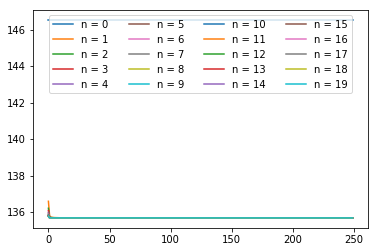

In [6]:
n_lr = 20
lear_rate = np.linspace(0,0.015,n_lr)
n = 0

while n < n_lr:
    
        #Relu
    ReluModelValLear = Sequential()
    ReluModelValLear.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    ReluModelValLear.add(Dense(1, kernel_initializer='uniform',activation="sigmoid"))
    ReluModelValLear.compile(optimizer=SGD(lr=lear_rate[n]),loss='mean_squared_error',metrics=['mse'])
    ReluHistoryValLear = ReluModelValLear.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    pyplot.plot(ReluHistoryValLear.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Relu_%s.png')% (hoje))
    
    n =n+1

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 199us/step - loss: 1.3006 - mean_squared_error: 1.3006 - val_loss: 0.5361 - val_mean_squared_error: 0.5361
Epoch 2/250
9745/9745 [==============================] - 1s 128us/step - loss: 0.6094 - mean_squared_error: 0.6094 - val_loss: 0.4482 - val_mean_squared_error: 0.4482
Epoch 3/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.5158 - mean_squared_error: 0.5158 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch 4/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.4384 - mean_squared_error: 0.4384 - val_loss: 0.3398 - val_mean_squared_error: 0.3398
Epoch 5/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.3796 - mean_squared_error: 0.3796 - val_loss: 0.3049 - val_mean_squared_error: 0.3049
Epoch 6/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.3347 - mean_squared_error: 0.3347 - 

Epoch 98/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 99/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 100/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 101/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0465 - val_mean_squared_error: 0.0465
Epoch 102/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 103/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0394 - val_mean_squared_er

9745/9745 [==============================] - 1s 127us/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 195/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 196/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 197/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 198/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 199/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0385 - val_mean_squared_error: 0.0385


9745/9745 [==============================] - 1s 125us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 41/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 42/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 43/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 44/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 45/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch

Epoch 89/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 90/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 91/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 92/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 93/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 94/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0520 - val_mean_squared_error:

9745/9745 [==============================] - 1s 127us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 186/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 187/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 188/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 189/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 190/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0340 - val_mean_squared_error: 0.0340


9745/9745 [==============================] - 1s 127us/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 32/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 33/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 34/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 35/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 36/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch

Epoch 80/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 81/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 82/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 83/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 84/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 85/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0516 - val_mean_squared_error:

9745/9745 [==============================] - 1s 127us/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 177/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 178/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 179/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 180/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 181/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


9745/9745 [==============================] - 1s 127us/step - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 23/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.1218 - val_mean_squared_error: 0.1218
Epoch 24/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0872 - mean_squared_error: 0.0872 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 25/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0841 - mean_squared_error: 0.0841 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 26/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 27/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch

Epoch 71/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0414 - mean_squared_error: 0.0414 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 72/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 73/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 74/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0407 - mean_squared_error: 0.0407 - val_loss: 0.0603 - val_mean_squared_error: 0.0603
Epoch 75/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 76/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0590 - val_mean_squared_error:

9745/9745 [==============================] - 1s 125us/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 168/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 169/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 170/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 171/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 172/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0491 - val_mean_squared_error: 0.0491


9745/9745 [==============================] - 1s 127us/step - loss: 0.2559 - mean_squared_error: 0.2559 - val_loss: 0.2372 - val_mean_squared_error: 0.2372
Epoch 14/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.2453 - mean_squared_error: 0.2453 - val_loss: 0.2287 - val_mean_squared_error: 0.2287
Epoch 15/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.2350 - mean_squared_error: 0.2350 - val_loss: 0.2202 - val_mean_squared_error: 0.2202
Epoch 16/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.2267 - mean_squared_error: 0.2267 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 17/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.2191 - mean_squared_error: 0.2191 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 18/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 0.2042 - val_mean_squared_error: 0.2042
Epoch

Epoch 62/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.1154 - val_mean_squared_error: 0.1154
Epoch 63/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 64/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.1131 - val_mean_squared_error: 0.1131
Epoch 65/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 66/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1118 - val_mean_squared_error: 0.1118
Epoch 67/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0951 - mean_squared_error: 0.0951 - val_loss: 0.1112 - val_mean_squared_error:

Epoch 111/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 112/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0748 - mean_squared_error: 0.0748 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 113/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0911 - val_mean_squared_error: 0.0911
Epoch 114/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 115/250
9745/9745 [==============================] - 1s 124us/step - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 116/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0903 - val_mean_squared_

Epoch 207/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 208/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 209/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 210/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 211/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 212/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0772 - val_mean_squared_

Epoch 54/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 0.2642 - val_mean_squared_error: 0.2642
Epoch 55/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2872 - mean_squared_error: 0.2872 - val_loss: 0.2637 - val_mean_squared_error: 0.2637
Epoch 56/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2863 - mean_squared_error: 0.2863 - val_loss: 0.2633 - val_mean_squared_error: 0.2633
Epoch 57/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2852 - mean_squared_error: 0.2852 - val_loss: 0.2617 - val_mean_squared_error: 0.2617
Epoch 58/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2841 - mean_squared_error: 0.2841 - val_loss: 0.2607 - val_mean_squared_error: 0.2607
Epoch 59/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.2829 - mean_squared_error: 0.2829 - val_loss: 0.2611 - val_mean_squared_error:

Epoch 103/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2520 - mean_squared_error: 0.2520 - val_loss: 0.2381 - val_mean_squared_error: 0.2381
Epoch 104/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2516 - mean_squared_error: 0.2516 - val_loss: 0.2377 - val_mean_squared_error: 0.2377
Epoch 105/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2511 - mean_squared_error: 0.2511 - val_loss: 0.2377 - val_mean_squared_error: 0.2377
Epoch 106/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2506 - mean_squared_error: 0.2506 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 107/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2502 - mean_squared_error: 0.2502 - val_loss: 0.2368 - val_mean_squared_error: 0.2368
Epoch 108/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.2496 - mean_squared_error: 0.2496 - val_loss: 0.2362 - val_mean_squared_

9745/9745 [==============================] - 1s 134us/step - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 0.2150 - val_mean_squared_error: 0.2150
Epoch 200/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2208 - mean_squared_error: 0.2208 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 201/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2206 - mean_squared_error: 0.2206 - val_loss: 0.2146 - val_mean_squared_error: 0.2146
Epoch 202/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.2148 - val_mean_squared_error: 0.2148
Epoch 203/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.2202 - mean_squared_error: 0.2202 - val_loss: 0.2144 - val_mean_squared_error: 0.2144
Epoch 204/250
9745/9745 [==============================] - 1s 134us/step - loss: 0.2200 - mean_squared_error: 0.2200 - val_loss: 0.2143 - val_mean_squared_error: 0.2143


9745/9745 [==============================] - 1s 151us/step - loss: 0.5439 - mean_squared_error: 0.5439 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 46/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.5432 - mean_squared_error: 0.5432 - val_loss: 0.4575 - val_mean_squared_error: 0.4575
Epoch 47/250
9745/9745 [==============================] - 1s 148us/step - loss: 0.5424 - mean_squared_error: 0.5424 - val_loss: 0.4561 - val_mean_squared_error: 0.4561
Epoch 48/250
9745/9745 [==============================] - 1s 145us/step - loss: 0.5418 - mean_squared_error: 0.5418 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 49/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.5411 - mean_squared_error: 0.5411 - val_loss: 0.4561 - val_mean_squared_error: 0.4561
Epoch 50/250
9745/9745 [==============================] - 1s 147us/step - loss: 0.5405 - mean_squared_error: 0.5405 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch

Epoch 94/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.5212 - mean_squared_error: 0.5212 - val_loss: 0.4400 - val_mean_squared_error: 0.4400
Epoch 95/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.5209 - mean_squared_error: 0.5209 - val_loss: 0.4397 - val_mean_squared_error: 0.4397
Epoch 96/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.5206 - mean_squared_error: 0.5206 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
Epoch 97/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.5203 - mean_squared_error: 0.5203 - val_loss: 0.4393 - val_mean_squared_error: 0.4393
Epoch 98/250
9745/9745 [==============================] - 3s 323us/step - loss: 0.5200 - mean_squared_error: 0.5200 - val_loss: 0.4389 - val_mean_squared_error: 0.4389
Epoch 99/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 0.4388 - val_mean_squared_error:

9745/9745 [==============================] - 2s 192us/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 191/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.5015 - mean_squared_error: 0.5015 - val_loss: 0.4252 - val_mean_squared_error: 0.4252
Epoch 192/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.5014 - mean_squared_error: 0.5014 - val_loss: 0.4251 - val_mean_squared_error: 0.4251
Epoch 193/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.5012 - mean_squared_error: 0.5012 - val_loss: 0.4250 - val_mean_squared_error: 0.4250
Epoch 194/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.5011 - mean_squared_error: 0.5011 - val_loss: 0.4251 - val_mean_squared_error: 0.4251
Epoch 195/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.5009 - mean_squared_error: 0.5009 - val_loss: 0.4248 - val_mean_squared_error: 0.4248


9745/9745 [==============================] - 2s 195us/step - loss: 0.7836 - mean_squared_error: 0.7836 - val_loss: 0.6474 - val_mean_squared_error: 0.6474
Epoch 37/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.7824 - mean_squared_error: 0.7824 - val_loss: 0.6462 - val_mean_squared_error: 0.6462
Epoch 38/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.6454 - val_mean_squared_error: 0.6454
Epoch 39/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.7803 - mean_squared_error: 0.7803 - val_loss: 0.6441 - val_mean_squared_error: 0.6441
Epoch 40/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.7793 - mean_squared_error: 0.7793 - val_loss: 0.6435 - val_mean_squared_error: 0.6435
Epoch 41/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.7783 - mean_squared_error: 0.7783 - val_loss: 0.6429 - val_mean_squared_error: 0.6429
Epoch

Epoch 85/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.7520 - mean_squared_error: 0.7520 - val_loss: 0.6207 - val_mean_squared_error: 0.6207
Epoch 86/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.7517 - mean_squared_error: 0.7517 - val_loss: 0.6204 - val_mean_squared_error: 0.6204
Epoch 87/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.7513 - mean_squared_error: 0.7513 - val_loss: 0.6201 - val_mean_squared_error: 0.6201
Epoch 88/250
9745/9745 [==============================] - 2s 225us/step - loss: 0.7509 - mean_squared_error: 0.7509 - val_loss: 0.6197 - val_mean_squared_error: 0.6197
Epoch 89/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.7505 - mean_squared_error: 0.7505 - val_loss: 0.6194 - val_mean_squared_error: 0.6194
Epoch 90/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.7502 - mean_squared_error: 0.7502 - val_loss: 0.6191 - val_mean_squared_error:

9745/9745 [==============================] - 2s 197us/step - loss: 0.7292 - mean_squared_error: 0.7292 - val_loss: 0.6018 - val_mean_squared_error: 0.6018
Epoch 182/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.7291 - mean_squared_error: 0.7291 - val_loss: 0.6017 - val_mean_squared_error: 0.6017
Epoch 183/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.7289 - mean_squared_error: 0.7289 - val_loss: 0.6015 - val_mean_squared_error: 0.6015
Epoch 184/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.7288 - mean_squared_error: 0.7288 - val_loss: 0.6014 - val_mean_squared_error: 0.6014
Epoch 185/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.7286 - mean_squared_error: 0.7286 - val_loss: 0.6013 - val_mean_squared_error: 0.6013
Epoch 186/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.7285 - mean_squared_error: 0.7285 - val_loss: 0.6011 - val_mean_squared_error: 0.6011


9745/9745 [==============================] - 2s 192us/step - loss: 1.2227 - mean_squared_error: 1.2227 - val_loss: 1.0582 - val_mean_squared_error: 1.0582
Epoch 28/250
9745/9745 [==============================] - 2s 191us/step - loss: 1.2209 - mean_squared_error: 1.2209 - val_loss: 1.0565 - val_mean_squared_error: 1.0565
Epoch 29/250
9745/9745 [==============================] - 2s 197us/step - loss: 1.2193 - mean_squared_error: 1.2193 - val_loss: 1.0549 - val_mean_squared_error: 1.0549
Epoch 30/250
9745/9745 [==============================] - 2s 192us/step - loss: 1.2177 - mean_squared_error: 1.2177 - val_loss: 1.0533 - val_mean_squared_error: 1.0533
Epoch 31/250
9745/9745 [==============================] - 2s 191us/step - loss: 1.2161 - mean_squared_error: 1.2161 - val_loss: 1.0518 - val_mean_squared_error: 1.0518
Epoch 32/250
9745/9745 [==============================] - 2s 191us/step - loss: 1.2146 - mean_squared_error: 1.2146 - val_loss: 1.0505 - val_mean_squared_error: 1.0505
Epoch

Epoch 76/250
9745/9745 [==============================] - 2s 210us/step - loss: 1.1762 - mean_squared_error: 1.1762 - val_loss: 1.0131 - val_mean_squared_error: 1.0131
Epoch 77/250
9745/9745 [==============================] - 2s 206us/step - loss: 1.1757 - mean_squared_error: 1.1757 - val_loss: 1.0125 - val_mean_squared_error: 1.0125
Epoch 78/250
9745/9745 [==============================] - 2s 204us/step - loss: 1.1751 - mean_squared_error: 1.1751 - val_loss: 1.0120 - val_mean_squared_error: 1.0120
Epoch 79/250
9745/9745 [==============================] - 2s 233us/step - loss: 1.1746 - mean_squared_error: 1.1746 - val_loss: 1.0115 - val_mean_squared_error: 1.0115
Epoch 80/250
9745/9745 [==============================] - 2s 250us/step - loss: 1.1741 - mean_squared_error: 1.1741 - val_loss: 1.0110 - val_mean_squared_error: 1.0110
Epoch 81/250
9745/9745 [==============================] - 2s 249us/step - loss: 1.1735 - mean_squared_error: 1.1735 - val_loss: 1.0104 - val_mean_squared_error:

9745/9745 [==============================] - 2s 209us/step - loss: 1.1433 - mean_squared_error: 1.1433 - val_loss: 0.9811 - val_mean_squared_error: 0.9811
Epoch 173/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.1431 - mean_squared_error: 1.1431 - val_loss: 0.9808 - val_mean_squared_error: 0.9808
Epoch 174/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.1429 - mean_squared_error: 1.1429 - val_loss: 0.9806 - val_mean_squared_error: 0.9806
Epoch 175/250
9745/9745 [==============================] - 2s 196us/step - loss: 1.1426 - mean_squared_error: 1.1426 - val_loss: 0.9804 - val_mean_squared_error: 0.9804
Epoch 176/250
9745/9745 [==============================] - 2s 196us/step - loss: 1.1424 - mean_squared_error: 1.1424 - val_loss: 0.9802 - val_mean_squared_error: 0.9802
Epoch 177/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.1422 - mean_squared_error: 1.1422 - val_loss: 0.9800 - val_mean_squared_error: 0.9800


9745/9745 [==============================] - 2s 196us/step - loss: 1.6189 - mean_squared_error: 1.6189 - val_loss: 1.4410 - val_mean_squared_error: 1.4410
Epoch 19/250
9745/9745 [==============================] - 2s 202us/step - loss: 1.6175 - mean_squared_error: 1.6175 - val_loss: 1.4397 - val_mean_squared_error: 1.4397
Epoch 20/250
9745/9745 [==============================] - 2s 241us/step - loss: 1.6162 - mean_squared_error: 1.6162 - val_loss: 1.4386 - val_mean_squared_error: 1.4386
Epoch 21/250
9745/9745 [==============================] - 2s 224us/step - loss: 1.6149 - mean_squared_error: 1.6149 - val_loss: 1.4374 - val_mean_squared_error: 1.4374
Epoch 22/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.6137 - mean_squared_error: 1.6137 - val_loss: 1.4364 - val_mean_squared_error: 1.4364
Epoch 23/250
9745/9745 [==============================] - 2s 209us/step - loss: 1.6126 - mean_squared_error: 1.6126 - val_loss: 1.4354 - val_mean_squared_error: 1.4354
Epoch

Epoch 67/250
9745/9745 [==============================] - 2s 202us/step - loss: 1.5867 - mean_squared_error: 1.5867 - val_loss: 1.4115 - val_mean_squared_error: 1.4115
Epoch 68/250
9745/9745 [==============================] - 2s 197us/step - loss: 1.5863 - mean_squared_error: 1.5863 - val_loss: 1.4112 - val_mean_squared_error: 1.4112
Epoch 69/250
9745/9745 [==============================] - 2s 209us/step - loss: 1.5860 - mean_squared_error: 1.5860 - val_loss: 1.4109 - val_mean_squared_error: 1.4109
Epoch 70/250
9745/9745 [==============================] - 2s 198us/step - loss: 1.5857 - mean_squared_error: 1.5857 - val_loss: 1.4106 - val_mean_squared_error: 1.4106
Epoch 71/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.5854 - mean_squared_error: 1.5854 - val_loss: 1.4103 - val_mean_squared_error: 1.4103
Epoch 72/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.5850 - mean_squared_error: 1.5850 - val_loss: 1.4100 - val_mean_squared_error:

Epoch 116/250
9745/9745 [==============================] - 2s 210us/step - loss: 1.5743 - mean_squared_error: 1.5743 - val_loss: 1.3999 - val_mean_squared_error: 1.3999
Epoch 117/250
9745/9745 [==============================] - 2s 193us/step - loss: 1.5741 - mean_squared_error: 1.5741 - val_loss: 1.3997 - val_mean_squared_error: 1.3997
Epoch 118/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.5739 - mean_squared_error: 1.5739 - val_loss: 1.3995 - val_mean_squared_error: 1.3995
Epoch 119/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.5737 - mean_squared_error: 1.5737 - val_loss: 1.3993 - val_mean_squared_error: 1.3993
Epoch 120/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.5736 - mean_squared_error: 1.5736 - val_loss: 1.3992 - val_mean_squared_error: 1.3992
Epoch 121/250
9745/9745 [==============================] - 2s 206us/step - loss: 1.5734 - mean_squared_error: 1.5734 - val_loss: 1.3990 - val_mean_squared_

9745/9745 [==============================] - 2s 192us/step - loss: 1.5616 - mean_squared_error: 1.5616 - val_loss: 1.3878 - val_mean_squared_error: 1.3878
Epoch 213/250
9745/9745 [==============================] - 2s 200us/step - loss: 1.5615 - mean_squared_error: 1.5615 - val_loss: 1.3877 - val_mean_squared_error: 1.3877
Epoch 214/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.5614 - mean_squared_error: 1.5614 - val_loss: 1.3876 - val_mean_squared_error: 1.3876
Epoch 215/250
9745/9745 [==============================] - 2s 192us/step - loss: 1.5613 - mean_squared_error: 1.5613 - val_loss: 1.3875 - val_mean_squared_error: 1.3875
Epoch 216/250
9745/9745 [==============================] - 2s 192us/step - loss: 1.5612 - mean_squared_error: 1.5612 - val_loss: 1.3874 - val_mean_squared_error: 1.3874
Epoch 217/250
9745/9745 [==============================] - 2s 192us/step - loss: 1.5611 - mean_squared_error: 1.5611 - val_loss: 1.3874 - val_mean_squared_error: 1.3874


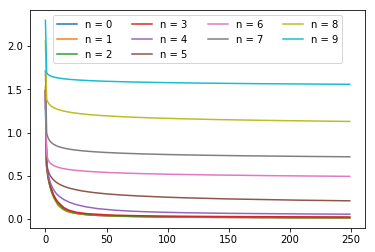

In [7]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
n = 0

while n < n_decay:
    
    sgd = SGD(lr=0.01, decay=lear_decay[n])
    
        #Sigmoidal
    SigModelLearDec = Sequential()
    SigModelLearDec.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    SigModelLearDec.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    SigModelLearDec.compile(optimizer=sgd,loss='mean_squared_error',metrics=['mse'])
    SigHistoryLearDec = SigModelLearDec.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    pyplot.plot(SigHistoryLearDec.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Sig_LearDec_%s.png')%hoje)

    n = n+1



Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 311us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 2/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 3/250
9745/9745 [==============================] - 2s 208us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 4/250
9745/9745 [==============================] - 2s 205us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 5/250
9745/9745 [==============================] - 2s 201us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 6/250
9745/9745 [==============================] - 2s 223us/step - loss

9745/9745 [==============================] - 2s 212us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 94/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 95/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 96/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 97/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 98/250
9745/9745 [==============================] - 2s 250us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 2s 222us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 188/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 189/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 190/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 2s 210us/step - loss: 135.8053 - mean_squared_error: 135.8053 - val_loss: 155.3614 - val_mean_squared_error: 155.3614
Epoch 28/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.7967 - mean_squared_error: 135.7967 - val_loss: 155.3510 - val_mean_squared_error: 155.3510
Epoch 29/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.7890 - mean_squared_error: 135.7890 - val_loss: 155.3414 - val_mean_squared_error: 155.3414
Epoch 30/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.7818 - mean_squared_error: 135.7818 - val_loss: 155.3326 - val_mean_squared_error: 155.3326
Epoch 31/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.7753 - mean_squared_error: 135.7753 - val_loss: 155.3246 - val_mean_squared_error: 155.3246
Epoch 32/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.7692 - mean_squared_error: 135.7692 - val_loss: 1

9745/9745 [==============================] - 2s 221us/step - loss: 135.6898 - mean_squared_error: 135.6898 - val_loss: 155.2207 - val_mean_squared_error: 155.2207
Epoch 120/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6897 - mean_squared_error: 135.6897 - val_loss: 155.2206 - val_mean_squared_error: 155.2206
Epoch 121/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6896 - mean_squared_error: 135.6896 - val_loss: 155.2205 - val_mean_squared_error: 155.2205
Epoch 122/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.6896 - mean_squared_error: 135.6896 - val_loss: 155.2204 - val_mean_squared_error: 155.2204
Epoch 123/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6895 - mean_squared_error: 135.6895 - val_loss: 155.2204 - val_mean_squared_error: 155.2204
Epoch 124/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.6894 - mean_squared_error: 135.6894 - val_lo

9745/9745 [==============================] - 2s 254us/step - loss: 135.6857 - mean_squared_error: 135.6857 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 212/250
9745/9745 [==============================] - 2s 207us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 213/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 214/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 215/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_loss: 155.2171 - val_mean_squared_error: 155.2171
Epoch 216/250
9745/9745 [==============================] - 2s 203us/step - loss: 135.6856 - mean_squared_error: 135.6856 - val_lo

9745/9745 [==============================] - 2s 210us/step - loss: 135.6875 - mean_squared_error: 135.6875 - val_loss: 155.2197 - val_mean_squared_error: 155.2197
Epoch 54/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6874 - mean_squared_error: 135.6874 - val_loss: 155.2197 - val_mean_squared_error: 155.2197
Epoch 55/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2196 - val_mean_squared_error: 155.2196
Epoch 56/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2196 - val_mean_squared_error: 155.2196
Epoch 57/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6872 - mean_squared_error: 135.6872 - val_loss: 155.2195 - val_mean_squared_error: 155.2195
Epoch 58/250
9745/9745 [==============================] - 2s 207us/step - loss: 135.6872 - mean_squared_error: 135.6872 - val_loss: 1

9745/9745 [==============================] - 2s 219us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 146/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 147/250
9745/9745 [==============================] - 2s 240us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 148/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 149/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 150/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6852 - mean_squared_error: 135.6852 - val_lo

9745/9745 [==============================] - 2s 210us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 238/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 239/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 240/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 241/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_loss: 155.2172 - val_mean_squared_error: 155.2172
Epoch 242/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6848 - mean_squared_error: 135.6848 - val_lo

9745/9745 [==============================] - 2s 214us/step - loss: 135.7104 - mean_squared_error: 135.7104 - val_loss: 155.2442 - val_mean_squared_error: 155.2442
Epoch 80/250
9745/9745 [==============================] - 2s 226us/step - loss: 135.7100 - mean_squared_error: 135.7100 - val_loss: 155.2436 - val_mean_squared_error: 155.2436
Epoch 81/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.7095 - mean_squared_error: 135.7095 - val_loss: 155.2431 - val_mean_squared_error: 155.2431
Epoch 82/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.7091 - mean_squared_error: 135.7091 - val_loss: 155.2425 - val_mean_squared_error: 155.2425
Epoch 83/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.7087 - mean_squared_error: 135.7087 - val_loss: 155.2420 - val_mean_squared_error: 155.2420
Epoch 84/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.7083 - mean_squared_error: 135.7083 - val_loss: 1

9745/9745 [==============================] - 2s 212us/step - loss: 135.6922 - mean_squared_error: 135.6922 - val_loss: 155.2231 - val_mean_squared_error: 155.2231
Epoch 172/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6921 - mean_squared_error: 135.6921 - val_loss: 155.2230 - val_mean_squared_error: 155.2230
Epoch 173/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6921 - mean_squared_error: 135.6921 - val_loss: 155.2230 - val_mean_squared_error: 155.2230
Epoch 174/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.6920 - mean_squared_error: 135.6920 - val_loss: 155.2229 - val_mean_squared_error: 155.2229
Epoch 175/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.6919 - mean_squared_error: 135.6919 - val_loss: 155.2228 - val_mean_squared_error: 155.2228
Epoch 176/250
9745/9745 [==============================] - 3s 288us/step - loss: 135.6918 - mean_squared_error: 135.6918 - val_lo

9745/9745 [==============================] - 2s 216us/step - loss: 135.9847 - mean_squared_error: 135.9847 - val_loss: 155.4621 - val_mean_squared_error: 155.4621
Epoch 14/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.9477 - mean_squared_error: 135.9477 - val_loss: 155.4310 - val_mean_squared_error: 155.4310
Epoch 15/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.9157 - mean_squared_error: 135.9157 - val_loss: 155.4043 - val_mean_squared_error: 155.4043
Epoch 16/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.8878 - mean_squared_error: 135.8878 - val_loss: 155.3811 - val_mean_squared_error: 155.3811
Epoch 17/250
9745/9745 [==============================] - 2s 229us/step - loss: 135.8636 - mean_squared_error: 135.8636 - val_loss: 155.3610 - val_mean_squared_error: 155.3610
Epoch 18/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.8430 - mean_squared_error: 135.8430 - val_loss: 1

9745/9745 [==============================] - 2s 231us/step - loss: 135.7011 - mean_squared_error: 135.7011 - val_loss: 155.2315 - val_mean_squared_error: 155.2315
Epoch 106/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.7010 - mean_squared_error: 135.7010 - val_loss: 155.2314 - val_mean_squared_error: 155.2314
Epoch 107/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.7010 - mean_squared_error: 135.7010 - val_loss: 155.2313 - val_mean_squared_error: 155.2313
Epoch 108/250
9745/9745 [==============================] - 2s 224us/step - loss: 135.7009 - mean_squared_error: 135.7009 - val_loss: 155.2313 - val_mean_squared_error: 155.2313
Epoch 109/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.7008 - mean_squared_error: 135.7008 - val_loss: 155.2312 - val_mean_squared_error: 155.2312
Epoch 110/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.7007 - mean_squared_error: 135.7007 - val_lo

9745/9745 [==============================] - 2s 223us/step - loss: 135.6967 - mean_squared_error: 135.6967 - val_loss: 155.2274 - val_mean_squared_error: 155.2274
Epoch 198/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6967 - mean_squared_error: 135.6967 - val_loss: 155.2274 - val_mean_squared_error: 155.2274
Epoch 199/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6967 - mean_squared_error: 135.6967 - val_loss: 155.2273 - val_mean_squared_error: 155.2273
Epoch 200/250
9745/9745 [==============================] - 2s 224us/step - loss: 135.6967 - mean_squared_error: 135.6967 - val_loss: 155.2273 - val_mean_squared_error: 155.2273
Epoch 201/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6966 - mean_squared_error: 135.6966 - val_loss: 155.2273 - val_mean_squared_error: 155.2273
Epoch 202/250
9745/9745 [==============================] - 2s 226us/step - loss: 135.6966 - mean_squared_error: 135.6966 - val_lo

9745/9745 [==============================] - 2s 222us/step - loss: 135.6933 - mean_squared_error: 135.6933 - val_loss: 155.2247 - val_mean_squared_error: 155.2247
Epoch 40/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6931 - mean_squared_error: 135.6931 - val_loss: 155.2244 - val_mean_squared_error: 155.2244
Epoch 41/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6929 - mean_squared_error: 135.6929 - val_loss: 155.2242 - val_mean_squared_error: 155.2242
Epoch 42/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6927 - mean_squared_error: 135.6927 - val_loss: 155.2239 - val_mean_squared_error: 155.2239
Epoch 43/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6925 - mean_squared_error: 135.6925 - val_loss: 155.2237 - val_mean_squared_error: 155.2237
Epoch 44/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.6923 - mean_squared_error: 135.6923 - val_loss: 1

9745/9745 [==============================] - 2s 217us/step - loss: 135.6874 - mean_squared_error: 135.6874 - val_loss: 155.2185 - val_mean_squared_error: 155.2185
Epoch 132/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2185 - val_mean_squared_error: 155.2185
Epoch 133/250
9745/9745 [==============================] - 2s 231us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2185 - val_mean_squared_error: 155.2185
Epoch 134/250
9745/9745 [==============================] - 2s 225us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2185 - val_mean_squared_error: 155.2185
Epoch 135/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_loss: 155.2185 - val_mean_squared_error: 155.2185
Epoch 136/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.6873 - mean_squared_error: 135.6873 - val_lo

9745/9745 [==============================] - 2s 216us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 224/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 225/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 226/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 227/250
9745/9745 [==============================] - 2s 224us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2176 - val_mean_squared_error: 155.2176
Epoch 228/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_lo

9745/9745 [==============================] - 2s 221us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 66/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 67/250
9745/9745 [==============================] - 2s 207us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 68/250
9745/9745 [==============================] - 2s 206us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 69/250
9745/9745 [==============================] - 2s 208us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 70/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 2s 216us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 158/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 159/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 160/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 161/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 162/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

9745/9745 [==============================] - 2s 235us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 250/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 336us/step - loss: 135.8302 - mean_squared_error: 135.8302 - val_loss: 155.3963 - val_mean_squared_error: 155.3963
Epoch 2/250
9745/9745 [==============================] - 2s 218us/step - loss: 135.8274 - mean_squared_error: 135.8274 - val_loss: 155.3930 - val_mean_squared_error: 155.3930
Epoch 3/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.8247 - mean_squared_error: 135.8247 - val_loss: 155.3899 - val_mean_squared_error: 155.3899
Epoch 4/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.8221

9745/9745 [==============================] - 2s 215us/step - loss: 135.7350 - mean_squared_error: 135.7350 - val_loss: 155.2777 - val_mean_squared_error: 155.2777
Epoch 92/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.7346 - mean_squared_error: 135.7346 - val_loss: 155.2772 - val_mean_squared_error: 155.2772
Epoch 93/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.7342 - mean_squared_error: 135.7342 - val_loss: 155.2767 - val_mean_squared_error: 155.2767
Epoch 94/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.7339 - mean_squared_error: 135.7339 - val_loss: 155.2763 - val_mean_squared_error: 155.2763
Epoch 95/250
9745/9745 [==============================] - 2s 240us/step - loss: 135.7335 - mean_squared_error: 135.7335 - val_loss: 155.2758 - val_mean_squared_error: 155.2758
Epoch 96/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.7331 - mean_squared_error: 135.7331 - val_loss: 1

9745/9745 [==============================] - 2s 216us/step - loss: 135.7120 - mean_squared_error: 135.7120 - val_loss: 155.2467 - val_mean_squared_error: 155.2467
Epoch 184/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.7118 - mean_squared_error: 135.7118 - val_loss: 155.2465 - val_mean_squared_error: 155.2465
Epoch 185/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.7117 - mean_squared_error: 135.7117 - val_loss: 155.2463 - val_mean_squared_error: 155.2463
Epoch 186/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.7115 - mean_squared_error: 135.7115 - val_loss: 155.2460 - val_mean_squared_error: 155.2460
Epoch 187/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.7113 - mean_squared_error: 135.7113 - val_loss: 155.2458 - val_mean_squared_error: 155.2458
Epoch 188/250
9745/9745 [==============================] - 2s 209us/step - loss: 135.7112 - mean_squared_error: 135.7112 - val_lo

9745/9745 [==============================] - 2s 228us/step - loss: 135.9860 - mean_squared_error: 135.9860 - val_loss: 155.5965 - val_mean_squared_error: 155.5965
Epoch 26/250
9745/9745 [==============================] - 2s 227us/step - loss: 135.9730 - mean_squared_error: 135.9730 - val_loss: 155.5803 - val_mean_squared_error: 155.5803
Epoch 27/250
9745/9745 [==============================] - 2s 223us/step - loss: 135.9606 - mean_squared_error: 135.9606 - val_loss: 155.5650 - val_mean_squared_error: 155.5650
Epoch 28/250
9745/9745 [==============================] - 2s 223us/step - loss: 135.9490 - mean_squared_error: 135.9490 - val_loss: 155.5507 - val_mean_squared_error: 155.5507
Epoch 29/250
9745/9745 [==============================] - 2s 236us/step - loss: 135.9381 - mean_squared_error: 135.9381 - val_loss: 155.5372 - val_mean_squared_error: 155.5372
Epoch 30/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.9279 - mean_squared_error: 135.9279 - val_loss: 1

9745/9745 [==============================] - 2s 222us/step - loss: 135.7205 - mean_squared_error: 135.7205 - val_loss: 155.2659 - val_mean_squared_error: 155.2659
Epoch 118/250
9745/9745 [==============================] - 2s 230us/step - loss: 135.7201 - mean_squared_error: 135.7201 - val_loss: 155.2655 - val_mean_squared_error: 155.2655
Epoch 119/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.7197 - mean_squared_error: 135.7197 - val_loss: 155.2651 - val_mean_squared_error: 155.2651
Epoch 120/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.7194 - mean_squared_error: 135.7194 - val_loss: 155.2646 - val_mean_squared_error: 155.2646
Epoch 121/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.7190 - mean_squared_error: 135.7190 - val_loss: 155.2642 - val_mean_squared_error: 155.2642
Epoch 122/250
9745/9745 [==============================] - 2s 227us/step - loss: 135.7187 - mean_squared_error: 135.7187 - val_lo

9745/9745 [==============================] - 2s 225us/step - loss: 135.7025 - mean_squared_error: 135.7025 - val_loss: 155.2424 - val_mean_squared_error: 155.2424
Epoch 210/250
9745/9745 [==============================] - 2s 226us/step - loss: 135.7024 - mean_squared_error: 135.7024 - val_loss: 155.2422 - val_mean_squared_error: 155.2422
Epoch 211/250
9745/9745 [==============================] - 2s 223us/step - loss: 135.7022 - mean_squared_error: 135.7022 - val_loss: 155.2420 - val_mean_squared_error: 155.2420
Epoch 212/250
9745/9745 [==============================] - 2s 223us/step - loss: 135.7021 - mean_squared_error: 135.7021 - val_loss: 155.2419 - val_mean_squared_error: 155.2419
Epoch 213/250
9745/9745 [==============================] - 2s 223us/step - loss: 135.7020 - mean_squared_error: 135.7020 - val_loss: 155.2417 - val_mean_squared_error: 155.2417
Epoch 214/250
9745/9745 [==============================] - 2s 228us/step - loss: 135.7019 - mean_squared_error: 135.7019 - val_lo

Epoch 52/250
9745/9745 [==============================] - 3s 259us/step - loss: 136.1225 - mean_squared_error: 136.1225 - val_loss: 155.5537 - val_mean_squared_error: 155.5537
Epoch 53/250
9745/9745 [==============================] - 2s 240us/step - loss: 136.0956 - mean_squared_error: 136.0956 - val_loss: 155.5310 - val_mean_squared_error: 155.5310
Epoch 54/250
9745/9745 [==============================] - 2s 251us/step - loss: 136.0700 - mean_squared_error: 136.0700 - val_loss: 155.5096 - val_mean_squared_error: 155.5096
Epoch 55/250
9745/9745 [==============================] - 2s 229us/step - loss: 136.0456 - mean_squared_error: 136.0456 - val_loss: 155.4892 - val_mean_squared_error: 155.4892
Epoch 56/250
9745/9745 [==============================] - 2s 221us/step - loss: 136.0226 - mean_squared_error: 136.0226 - val_loss: 155.4701 - val_mean_squared_error: 155.4701
Epoch 57/250
9745/9745 [==============================] - 2s 221us/step - loss: 136.0007 - mean_squared_error: 136.0007 

9745/9745 [==============================] - 2s 213us/step - loss: 135.6988 - mean_squared_error: 135.6988 - val_loss: 155.2259 - val_mean_squared_error: 155.2259
Epoch 145/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6985 - mean_squared_error: 135.6985 - val_loss: 155.2257 - val_mean_squared_error: 155.2257
Epoch 146/250
9745/9745 [==============================] - 2s 220us/step - loss: 135.6982 - mean_squared_error: 135.6982 - val_loss: 155.2255 - val_mean_squared_error: 155.2255
Epoch 147/250
9745/9745 [==============================] - 2s 210us/step - loss: 135.6979 - mean_squared_error: 135.6979 - val_loss: 155.2253 - val_mean_squared_error: 155.2253
Epoch 148/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6976 - mean_squared_error: 135.6976 - val_loss: 155.2251 - val_mean_squared_error: 155.2251
Epoch 149/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6973 - mean_squared_error: 135.6973 - val_lo

9745/9745 [==============================] - 2s 221us/step - loss: 135.6863 - mean_squared_error: 135.6863 - val_loss: 155.2180 - val_mean_squared_error: 155.2180
Epoch 237/250
9745/9745 [==============================] - 2s 214us/step - loss: 135.6862 - mean_squared_error: 135.6862 - val_loss: 155.2180 - val_mean_squared_error: 155.2180
Epoch 238/250
9745/9745 [==============================] - 2s 215us/step - loss: 135.6862 - mean_squared_error: 135.6862 - val_loss: 155.2180 - val_mean_squared_error: 155.2180
Epoch 239/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6862 - mean_squared_error: 135.6862 - val_loss: 155.2180 - val_mean_squared_error: 155.2180
Epoch 240/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.6862 - mean_squared_error: 135.6862 - val_loss: 155.2179 - val_mean_squared_error: 155.2179
Epoch 241/250
9745/9745 [==============================] - 2s 211us/step - loss: 135.6861 - mean_squared_error: 135.6861 - val_lo

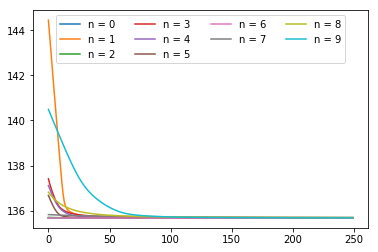

In [8]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
n = 0

while n < n_decay:

    #Relu
    ReluModelLearDec = Sequential()
    ReluModelLearDec.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    ReluModelLearDec.add(Dense(1, kernel_initializer='uniform',activation="relu"))
    ReluModelLearDec.compile(optimizer=sgd,loss='mean_squared_error',metrics=['mse'])
    ReluHistoryLearDec = ReluModelLearDec.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    pyplot.plot(ReluHistoryLearDec.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Relu_LearDec_%s.png')%hoje)

    n = n+1  

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 229us/step - loss: 2.7746 - mean_squared_error: 2.7746 - val_loss: 0.7582 - val_mean_squared_error: 0.7582
Epoch 2/250
9745/9745 [==============================] - 1s 100us/step - loss: 0.8002 - mean_squared_error: 0.8002 - val_loss: 0.5800 - val_mean_squared_error: 0.5800
Epoch 3/250
9745/9745 [==============================] - 1s 100us/step - loss: 0.6793 - mean_squared_error: 0.6793 - val_loss: 0.5195 - val_mean_squared_error: 0.5195
Epoch 4/250
9745/9745 [==============================] - 1s 100us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 0.4877 - val_mean_squared_error: 0.4877
Epoch 5/250
9745/9745 [==============================] - 1s 100us/step - loss: 0.5788 - mean_squared_error: 0.5788 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 6/250
9745/9745 [==============================] - 1s 99us/step - loss: 0.5390 - mean_squared_error: 0.5390 - v

Epoch 98/250
9745/9745 [==============================] - 1s 113us/step - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 99/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0824 - val_mean_squared_error: 0.0824
Epoch 100/250
9745/9745 [==============================] - 1s 100us/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0674 - val_mean_squared_error: 0.0674
Epoch 101/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 102/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.0714 - val_mean_squared_error: 0.0714
Epoch 103/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.0773 - val_mean_squared_er

9745/9745 [==============================] - 1s 101us/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 195/250
9745/9745 [==============================] - 1s 102us/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 196/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 197/250
9745/9745 [==============================] - 1s 107us/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 198/250
9745/9745 [==============================] - 1s 101us/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 199/250
9745/9745 [==============================] - 1s 102us/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0492 - val_mean_squared_error: 0.0492


Epoch 41/250
9745/9745 [==============================] - 1s 60us/step - loss: 0.4875 - mean_squared_error: 0.4875 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 42/250
9745/9745 [==============================] - 1s 60us/step - loss: 0.4824 - mean_squared_error: 0.4824 - val_loss: 0.4043 - val_mean_squared_error: 0.4043
Epoch 43/250
9745/9745 [==============================] - 1s 63us/step - loss: 0.4779 - mean_squared_error: 0.4779 - val_loss: 0.4048 - val_mean_squared_error: 0.4048
Epoch 44/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.4740 - mean_squared_error: 0.4740 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 45/250
9745/9745 [==============================] - 1s 68us/step - loss: 0.4696 - mean_squared_error: 0.4696 - val_loss: 0.3949 - val_mean_squared_error: 0.3949
Epoch 46/250
9745/9745 [==============================] - 1s 67us/step - loss: 0.4655 - mean_squared_error: 0.4655 - val_loss: 0.3918 - val_mean_squared_error: 0.391

9745/9745 [==============================] - 1s 65us/step - loss: 0.3178 - mean_squared_error: 0.3178 - val_loss: 0.2852 - val_mean_squared_error: 0.2852
Epoch 91/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.3166 - mean_squared_error: 0.3166 - val_loss: 0.2878 - val_mean_squared_error: 0.2878
Epoch 92/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.3141 - mean_squared_error: 0.3141 - val_loss: 0.2897 - val_mean_squared_error: 0.2897
Epoch 93/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.3118 - mean_squared_error: 0.3118 - val_loss: 0.2808 - val_mean_squared_error: 0.2808
Epoch 94/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.3088 - mean_squared_error: 0.3088 - val_loss: 0.2778 - val_mean_squared_error: 0.2778
Epoch 95/250
9745/9745 [==============================] - 1s 60us/step - loss: 0.3056 - mean_squared_error: 0.3056 - val_loss: 0.2748 - val_mean_squared_error: 0.2748
Epoch 96/25

Epoch 139/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.2132 - val_mean_squared_error: 0.2132
Epoch 140/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.2182 - mean_squared_error: 0.2182 - val_loss: 0.2111 - val_mean_squared_error: 0.2111
Epoch 141/250
9745/9745 [==============================] - 1s 60us/step - loss: 0.2161 - mean_squared_error: 0.2161 - val_loss: 0.2149 - val_mean_squared_error: 0.2149
Epoch 142/250
9745/9745 [==============================] - 1s 62us/step - loss: 0.2144 - mean_squared_error: 0.2144 - val_loss: 0.2109 - val_mean_squared_error: 0.2109
Epoch 143/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.2129 - mean_squared_error: 0.2129 - val_loss: 0.2067 - val_mean_squared_error: 0.2067
Epoch 144/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.2115 - mean_squared_error: 0.2115 - val_loss: 0.2113 - val_mean_squared_error:

Epoch 236/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 237/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 238/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.1297 - val_mean_squared_error: 0.1297
Epoch 239/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.1295 - val_mean_squared_error: 0.1295
Epoch 240/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.1274 - val_mean_squared_error: 0.1274
Epoch 241/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.1146 - mean_squared_error: 0.1146 - val_loss: 0.1287 - val_mean_squared_error:

Epoch 35/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.6077 - mean_squared_error: 0.6077 - val_loss: 0.5164 - val_mean_squared_error: 0.5164
Epoch 36/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.6031 - mean_squared_error: 0.6031 - val_loss: 0.4980 - val_mean_squared_error: 0.4980
Epoch 37/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5991 - mean_squared_error: 0.5991 - val_loss: 0.5461 - val_mean_squared_error: 0.5461
Epoch 38/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5986 - mean_squared_error: 0.5986 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 39/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5901 - mean_squared_error: 0.5901 - val_loss: 0.5113 - val_mean_squared_error: 0.5113
Epoch 40/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5869 - mean_squared_error: 0.5869 - val_loss: 0.4909 - val_mean_squared_error: 0.490

9745/9745 [==============================] - 1s 53us/step - loss: 0.4596 - mean_squared_error: 0.4596 - val_loss: 0.4308 - val_mean_squared_error: 0.4308
Epoch 85/250
9745/9745 [==============================] - 1s 60us/step - loss: 0.4611 - mean_squared_error: 0.4611 - val_loss: 0.4052 - val_mean_squared_error: 0.4052
Epoch 86/250
9745/9745 [==============================] - 1s 62us/step - loss: 0.4553 - mean_squared_error: 0.4553 - val_loss: 0.3912 - val_mean_squared_error: 0.3912
Epoch 87/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.4523 - mean_squared_error: 0.4523 - val_loss: 0.3969 - val_mean_squared_error: 0.3969
Epoch 88/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.4498 - mean_squared_error: 0.4498 - val_loss: 0.3895 - val_mean_squared_error: 0.3895
Epoch 89/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.4489 - mean_squared_error: 0.4489 - val_loss: 0.3831 - val_mean_squared_error: 0.3831
Epoch 90/25

Epoch 133/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.3596 - mean_squared_error: 0.3596 - val_loss: 0.3162 - val_mean_squared_error: 0.3162
Epoch 134/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.3581 - mean_squared_error: 0.3581 - val_loss: 0.3237 - val_mean_squared_error: 0.3237
Epoch 135/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3584 - mean_squared_error: 0.3584 - val_loss: 0.3106 - val_mean_squared_error: 0.3106
Epoch 136/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3548 - mean_squared_error: 0.3548 - val_loss: 0.3125 - val_mean_squared_error: 0.3125
Epoch 137/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3528 - mean_squared_error: 0.3528 - val_loss: 0.3123 - val_mean_squared_error: 0.3123
Epoch 138/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3526 - mean_squared_error: 0.3526 - val_loss: 0.3085 - val_mean_squared_error:

Epoch 182/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.2858 - mean_squared_error: 0.2858 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 183/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.2851 - mean_squared_error: 0.2851 - val_loss: 0.2604 - val_mean_squared_error: 0.2604
Epoch 184/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.2821 - mean_squared_error: 0.2821 - val_loss: 0.2649 - val_mean_squared_error: 0.2649
Epoch 185/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.2826 - mean_squared_error: 0.2826 - val_loss: 0.2583 - val_mean_squared_error: 0.2583
Epoch 186/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.2808 - mean_squared_error: 0.2808 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 187/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.2781 - mean_squared_error: 0.2781 - val_loss: 0.2548 - val_mean_squared_error:

Epoch 231/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.2284 - mean_squared_error: 0.2284 - val_loss: 0.2207 - val_mean_squared_error: 0.2207
Epoch 232/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.2170 - val_mean_squared_error: 0.2170
Epoch 233/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.2266 - mean_squared_error: 0.2266 - val_loss: 0.2167 - val_mean_squared_error: 0.2167
Epoch 234/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.2257 - mean_squared_error: 0.2257 - val_loss: 0.2270 - val_mean_squared_error: 0.2270
Epoch 235/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.2272 - mean_squared_error: 0.2272 - val_loss: 0.2153 - val_mean_squared_error: 0.2153
Epoch 236/250
9745/9745 [==============================] - 1s 59us/step - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.2200 - val_mean_squared_error:

Epoch 30/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.7028 - mean_squared_error: 0.7028 - val_loss: 0.5741 - val_mean_squared_error: 0.5741
Epoch 31/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6959 - mean_squared_error: 0.6959 - val_loss: 0.5691 - val_mean_squared_error: 0.5691
Epoch 32/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6896 - mean_squared_error: 0.6896 - val_loss: 0.5659 - val_mean_squared_error: 0.5659
Epoch 33/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6836 - mean_squared_error: 0.6836 - val_loss: 0.5622 - val_mean_squared_error: 0.5622
Epoch 34/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6781 - mean_squared_error: 0.6781 - val_loss: 0.5588 - val_mean_squared_error: 0.5588
Epoch 35/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6725 - mean_squared_error: 0.6725 - val_loss: 0.5514 - val_mean_squared_error: 0.551

9745/9745 [==============================] - 1s 57us/step - loss: 0.5302 - mean_squared_error: 0.5302 - val_loss: 0.4455 - val_mean_squared_error: 0.4455
Epoch 80/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5278 - mean_squared_error: 0.5278 - val_loss: 0.4400 - val_mean_squared_error: 0.4400
Epoch 81/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5257 - mean_squared_error: 0.5257 - val_loss: 0.4423 - val_mean_squared_error: 0.4423
Epoch 82/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5231 - mean_squared_error: 0.5231 - val_loss: 0.4399 - val_mean_squared_error: 0.4399
Epoch 83/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5209 - mean_squared_error: 0.5209 - val_loss: 0.4394 - val_mean_squared_error: 0.4394
Epoch 84/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5192 - mean_squared_error: 0.5192 - val_loss: 0.4333 - val_mean_squared_error: 0.4333
Epoch 85/25

Epoch 128/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 0.3752 - val_mean_squared_error: 0.3752
Epoch 129/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.4380 - mean_squared_error: 0.4380 - val_loss: 0.3737 - val_mean_squared_error: 0.3737
Epoch 130/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4362 - mean_squared_error: 0.4362 - val_loss: 0.3746 - val_mean_squared_error: 0.3746
Epoch 131/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.4343 - mean_squared_error: 0.4343 - val_loss: 0.3714 - val_mean_squared_error: 0.3714
Epoch 132/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.4333 - mean_squared_error: 0.4333 - val_loss: 0.3748 - val_mean_squared_error: 0.3748
Epoch 133/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4318 - mean_squared_error: 0.4318 - val_loss: 0.3681 - val_mean_squared_error:

Epoch 177/250
9745/9745 [==============================] - 1s 61us/step - loss: 0.3694 - mean_squared_error: 0.3694 - val_loss: 0.3244 - val_mean_squared_error: 0.3244
Epoch 178/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.3685 - mean_squared_error: 0.3685 - val_loss: 0.3239 - val_mean_squared_error: 0.3239
Epoch 179/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3667 - mean_squared_error: 0.3667 - val_loss: 0.3212 - val_mean_squared_error: 0.3212
Epoch 180/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.3653 - mean_squared_error: 0.3653 - val_loss: 0.3204 - val_mean_squared_error: 0.3204
Epoch 181/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.3635 - mean_squared_error: 0.3635 - val_loss: 0.3196 - val_mean_squared_error: 0.3196
Epoch 182/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.3623 - mean_squared_error: 0.3623 - val_loss: 0.3186 - val_mean_squared_error:

Epoch 226/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3146 - mean_squared_error: 0.3146 - val_loss: 0.2836 - val_mean_squared_error: 0.2836
Epoch 227/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.3123 - mean_squared_error: 0.3123 - val_loss: 0.2831 - val_mean_squared_error: 0.2831
Epoch 228/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.3107 - mean_squared_error: 0.3107 - val_loss: 0.2810 - val_mean_squared_error: 0.2810
Epoch 229/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.3105 - mean_squared_error: 0.3105 - val_loss: 0.2804 - val_mean_squared_error: 0.2804
Epoch 230/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.3091 - mean_squared_error: 0.3091 - val_loss: 0.2813 - val_mean_squared_error: 0.2813
Epoch 231/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.3085 - mean_squared_error: 0.3085 - val_loss: 0.2800 - val_mean_squared_error:

Epoch 25/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.8212 - mean_squared_error: 0.8212 - val_loss: 0.6737 - val_mean_squared_error: 0.6737
Epoch 26/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.8101 - mean_squared_error: 0.8101 - val_loss: 0.6610 - val_mean_squared_error: 0.6610
Epoch 27/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.6629 - val_mean_squared_error: 0.6629
Epoch 28/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7887 - mean_squared_error: 0.7887 - val_loss: 0.6477 - val_mean_squared_error: 0.6477
Epoch 29/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7797 - mean_squared_error: 0.7797 - val_loss: 0.6417 - val_mean_squared_error: 0.6417
Epoch 30/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7718 - mean_squared_error: 0.7718 - val_loss: 0.6372 - val_mean_squared_error: 0.637

9745/9745 [==============================] - 0s 50us/step - loss: 0.5931 - mean_squared_error: 0.5931 - val_loss: 0.4982 - val_mean_squared_error: 0.4982
Epoch 75/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5907 - mean_squared_error: 0.5907 - val_loss: 0.4945 - val_mean_squared_error: 0.4945
Epoch 76/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5888 - mean_squared_error: 0.5888 - val_loss: 0.4927 - val_mean_squared_error: 0.4927
Epoch 77/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5872 - mean_squared_error: 0.5872 - val_loss: 0.4893 - val_mean_squared_error: 0.4893
Epoch 78/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5856 - mean_squared_error: 0.5856 - val_loss: 0.4875 - val_mean_squared_error: 0.4875
Epoch 79/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5821 - mean_squared_error: 0.5821 - val_loss: 0.4850 - val_mean_squared_error: 0.4850
Epoch 80/25

Epoch 123/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5102 - mean_squared_error: 0.5102 - val_loss: 0.4310 - val_mean_squared_error: 0.4310
Epoch 124/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5081 - mean_squared_error: 0.5081 - val_loss: 0.4308 - val_mean_squared_error: 0.4308
Epoch 125/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5064 - mean_squared_error: 0.5064 - val_loss: 0.4276 - val_mean_squared_error: 0.4276
Epoch 126/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5051 - mean_squared_error: 0.5051 - val_loss: 0.4265 - val_mean_squared_error: 0.4265
Epoch 127/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5042 - mean_squared_error: 0.5042 - val_loss: 0.4289 - val_mean_squared_error: 0.4289
Epoch 128/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5026 - mean_squared_error: 0.5026 - val_loss: 0.4278 - val_mean_squared_error:

Epoch 172/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4492 - mean_squared_error: 0.4492 - val_loss: 0.3835 - val_mean_squared_error: 0.3835
Epoch 173/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4484 - mean_squared_error: 0.4484 - val_loss: 0.3839 - val_mean_squared_error: 0.3839
Epoch 174/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4480 - mean_squared_error: 0.4480 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 175/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4461 - mean_squared_error: 0.4461 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 176/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4449 - mean_squared_error: 0.4449 - val_loss: 0.3805 - val_mean_squared_error: 0.3805
Epoch 177/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4435 - mean_squared_error: 0.4435 - val_loss: 0.3829 - val_mean_squared_error:

Epoch 221/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.3977 - mean_squared_error: 0.3977 - val_loss: 0.3445 - val_mean_squared_error: 0.3445
Epoch 222/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.3964 - mean_squared_error: 0.3964 - val_loss: 0.3457 - val_mean_squared_error: 0.3457
Epoch 223/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.3959 - mean_squared_error: 0.3959 - val_loss: 0.3442 - val_mean_squared_error: 0.3442
Epoch 224/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.3942 - mean_squared_error: 0.3942 - val_loss: 0.3416 - val_mean_squared_error: 0.3416
Epoch 225/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.3936 - mean_squared_error: 0.3936 - val_loss: 0.3407 - val_mean_squared_error: 0.3407
Epoch 226/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.3923 - mean_squared_error: 0.3923 - val_loss: 0.3409 - val_mean_squared_error:

9745/9745 [==============================] - 1s 52us/step - loss: 0.6455 - mean_squared_error: 0.6455 - val_loss: 0.5417 - val_mean_squared_error: 0.5417
Epoch 69/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6417 - mean_squared_error: 0.6417 - val_loss: 0.5320 - val_mean_squared_error: 0.5320
Epoch 70/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6392 - mean_squared_error: 0.6392 - val_loss: 0.5337 - val_mean_squared_error: 0.5337
Epoch 71/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6363 - mean_squared_error: 0.6363 - val_loss: 0.5288 - val_mean_squared_error: 0.5288
Epoch 72/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6346 - mean_squared_error: 0.6346 - val_loss: 0.5253 - val_mean_squared_error: 0.5253
Epoch 73/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6311 - mean_squared_error: 0.6311 - val_loss: 0.5269 - val_mean_squared_error: 0.5269
Epoch 74/25

9745/9745 [==============================] - 0s 49us/step - loss: 0.5500 - mean_squared_error: 0.5500 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 118/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5492 - mean_squared_error: 0.5492 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 119/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5469 - mean_squared_error: 0.5469 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 120/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5457 - mean_squared_error: 0.5457 - val_loss: 0.4572 - val_mean_squared_error: 0.4572
Epoch 121/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5444 - mean_squared_error: 0.5444 - val_loss: 0.4574 - val_mean_squared_error: 0.4574
Epoch 122/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.5428 - mean_squared_error: 0.5428 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 

Epoch 166/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4905 - mean_squared_error: 0.4905 - val_loss: 0.4157 - val_mean_squared_error: 0.4157
Epoch 167/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.4893 - mean_squared_error: 0.4893 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 168/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4889 - mean_squared_error: 0.4889 - val_loss: 0.4147 - val_mean_squared_error: 0.4147
Epoch 169/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4874 - mean_squared_error: 0.4874 - val_loss: 0.4122 - val_mean_squared_error: 0.4122
Epoch 170/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4860 - mean_squared_error: 0.4860 - val_loss: 0.4108 - val_mean_squared_error: 0.4108
Epoch 171/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4852 - mean_squared_error: 0.4852 - val_loss: 0.4109 - val_mean_squared_error:

Epoch 215/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4412 - mean_squared_error: 0.4412 - val_loss: 0.3797 - val_mean_squared_error: 0.3797
Epoch 216/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4402 - mean_squared_error: 0.4402 - val_loss: 0.3765 - val_mean_squared_error: 0.3765
Epoch 217/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.4399 - mean_squared_error: 0.4399 - val_loss: 0.3756 - val_mean_squared_error: 0.3756
Epoch 218/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.4388 - mean_squared_error: 0.4388 - val_loss: 0.3776 - val_mean_squared_error: 0.3776
Epoch 219/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4379 - mean_squared_error: 0.4379 - val_loss: 0.3759 - val_mean_squared_error: 0.3759
Epoch 220/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4370 - mean_squared_error: 0.4370 - val_loss: 0.3747 - val_mean_squared_error:

9745/9745 [==============================] - 0s 51us/step - loss: 0.6609 - mean_squared_error: 0.6609 - val_loss: 0.5500 - val_mean_squared_error: 0.5500
Epoch 63/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6578 - mean_squared_error: 0.6578 - val_loss: 0.5374 - val_mean_squared_error: 0.5374
Epoch 64/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6557 - mean_squared_error: 0.6557 - val_loss: 0.5376 - val_mean_squared_error: 0.5376
Epoch 65/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6520 - mean_squared_error: 0.6520 - val_loss: 0.5458 - val_mean_squared_error: 0.5458
Epoch 66/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6503 - mean_squared_error: 0.6503 - val_loss: 0.5385 - val_mean_squared_error: 0.5385
Epoch 67/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6474 - mean_squared_error: 0.6474 - val_loss: 0.5322 - val_mean_squared_error: 0.5322
Epoch 68/25

9745/9745 [==============================] - 0s 51us/step - loss: 0.5636 - mean_squared_error: 0.5636 - val_loss: 0.4706 - val_mean_squared_error: 0.4706
Epoch 112/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5612 - mean_squared_error: 0.5612 - val_loss: 0.4748 - val_mean_squared_error: 0.4748
Epoch 113/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5601 - mean_squared_error: 0.5601 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 114/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5606 - mean_squared_error: 0.5606 - val_loss: 0.4650 - val_mean_squared_error: 0.4650
Epoch 115/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5577 - mean_squared_error: 0.5577 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 116/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5572 - mean_squared_error: 0.5572 - val_loss: 0.4636 - val_mean_squared_error: 0.4636
Epoch 

Epoch 160/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4256 - val_mean_squared_error: 0.4256
Epoch 161/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5027 - mean_squared_error: 0.5027 - val_loss: 0.4246 - val_mean_squared_error: 0.4246
Epoch 162/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5013 - mean_squared_error: 0.5013 - val_loss: 0.4229 - val_mean_squared_error: 0.4229
Epoch 163/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 0.4250 - val_mean_squared_error: 0.4250
Epoch 164/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4207 - val_mean_squared_error: 0.4207
Epoch 165/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4984 - mean_squared_error: 0.4984 - val_loss: 0.4184 - val_mean_squared_error:

Epoch 209/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 0.3886 - val_mean_squared_error: 0.3886
Epoch 210/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4545 - mean_squared_error: 0.4545 - val_loss: 0.3848 - val_mean_squared_error: 0.3848
Epoch 211/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.4525 - mean_squared_error: 0.4525 - val_loss: 0.3880 - val_mean_squared_error: 0.3880
Epoch 212/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.4524 - mean_squared_error: 0.4524 - val_loss: 0.3834 - val_mean_squared_error: 0.3834
Epoch 213/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4513 - mean_squared_error: 0.4513 - val_loss: 0.3839 - val_mean_squared_error: 0.3839
Epoch 214/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.4496 - mean_squared_error: 0.4496 - val_loss: 0.3827 - val_mean_squared_error:

9745/9745 [==============================] - 1s 53us/step - loss: 0.7351 - mean_squared_error: 0.7351 - val_loss: 0.6019 - val_mean_squared_error: 0.6019
Epoch 57/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7305 - mean_squared_error: 0.7305 - val_loss: 0.6016 - val_mean_squared_error: 0.6016
Epoch 58/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7262 - mean_squared_error: 0.7262 - val_loss: 0.5971 - val_mean_squared_error: 0.5971
Epoch 59/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7226 - mean_squared_error: 0.7226 - val_loss: 0.5986 - val_mean_squared_error: 0.5986
Epoch 60/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7188 - mean_squared_error: 0.7188 - val_loss: 0.5897 - val_mean_squared_error: 0.5897
Epoch 61/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7157 - mean_squared_error: 0.7157 - val_loss: 0.5957 - val_mean_squared_error: 0.5957
Epoch 62/25

Epoch 154/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5510 - mean_squared_error: 0.5510 - val_loss: 0.4597 - val_mean_squared_error: 0.4597
Epoch 155/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5495 - mean_squared_error: 0.5495 - val_loss: 0.4588 - val_mean_squared_error: 0.4588
Epoch 156/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5483 - mean_squared_error: 0.5483 - val_loss: 0.4594 - val_mean_squared_error: 0.4594
Epoch 157/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5475 - mean_squared_error: 0.5475 - val_loss: 0.4594 - val_mean_squared_error: 0.4594
Epoch 158/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5463 - mean_squared_error: 0.5463 - val_loss: 0.4568 - val_mean_squared_error: 0.4568
Epoch 159/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5456 - mean_squared_error: 0.5456 - val_loss: 0.4554 - val_mean_squared_error:

Epoch 203/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5051 - mean_squared_error: 0.5051 - val_loss: 0.4265 - val_mean_squared_error: 0.4265
Epoch 204/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5045 - mean_squared_error: 0.5045 - val_loss: 0.4237 - val_mean_squared_error: 0.4237
Epoch 205/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5038 - mean_squared_error: 0.5038 - val_loss: 0.4239 - val_mean_squared_error: 0.4239
Epoch 206/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5024 - mean_squared_error: 0.5024 - val_loss: 0.4237 - val_mean_squared_error: 0.4237
Epoch 207/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5021 - mean_squared_error: 0.5021 - val_loss: 0.4212 - val_mean_squared_error: 0.4212
Epoch 208/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5019 - mean_squared_error: 0.5019 - val_loss: 0.4207 - val_mean_squared_error:

9745/9745 [==============================] - 1s 52us/step - loss: 0.7678 - mean_squared_error: 0.7678 - val_loss: 0.6366 - val_mean_squared_error: 0.6366
Epoch 51/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.7637 - mean_squared_error: 0.7637 - val_loss: 0.6303 - val_mean_squared_error: 0.6303
Epoch 52/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.7584 - mean_squared_error: 0.7584 - val_loss: 0.6293 - val_mean_squared_error: 0.6293
Epoch 53/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7539 - mean_squared_error: 0.7539 - val_loss: 0.6239 - val_mean_squared_error: 0.6239
Epoch 54/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7503 - mean_squared_error: 0.7503 - val_loss: 0.6176 - val_mean_squared_error: 0.6176
Epoch 55/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7454 - mean_squared_error: 0.7454 - val_loss: 0.6146 - val_mean_squared_error: 0.6146
Epoch 56/25

Epoch 148/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5678 - mean_squared_error: 0.5678 - val_loss: 0.4775 - val_mean_squared_error: 0.4775
Epoch 149/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5668 - mean_squared_error: 0.5668 - val_loss: 0.4752 - val_mean_squared_error: 0.4752
Epoch 150/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.5656 - mean_squared_error: 0.5656 - val_loss: 0.4782 - val_mean_squared_error: 0.4782
Epoch 151/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5655 - mean_squared_error: 0.5655 - val_loss: 0.4749 - val_mean_squared_error: 0.4749
Epoch 152/250
9745/9745 [==============================] - 0s 48us/step - loss: 0.5638 - mean_squared_error: 0.5638 - val_loss: 0.4742 - val_mean_squared_error: 0.4742
Epoch 153/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5626 - mean_squared_error: 0.5626 - val_loss: 0.4721 - val_mean_squared_error:

Epoch 197/250
9745/9745 [==============================] - 0s 43us/step - loss: 0.5224 - mean_squared_error: 0.5224 - val_loss: 0.4435 - val_mean_squared_error: 0.4435
Epoch 198/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.5212 - mean_squared_error: 0.5212 - val_loss: 0.4412 - val_mean_squared_error: 0.4412
Epoch 199/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.5206 - mean_squared_error: 0.5206 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 200/250
9745/9745 [==============================] - 0s 43us/step - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 0.4394 - val_mean_squared_error: 0.4394
Epoch 201/250
9745/9745 [==============================] - 0s 43us/step - loss: 0.5188 - mean_squared_error: 0.5188 - val_loss: 0.4417 - val_mean_squared_error: 0.4417
Epoch 202/250
9745/9745 [==============================] - 0s 43us/step - loss: 0.5181 - mean_squared_error: 0.5181 - val_loss: 0.4380 - val_mean_squared_error:

Epoch 246/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.4841 - mean_squared_error: 0.4841 - val_loss: 0.4118 - val_mean_squared_error: 0.4118
Epoch 247/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.4842 - mean_squared_error: 0.4842 - val_loss: 0.4135 - val_mean_squared_error: 0.4135
Epoch 248/250
9745/9745 [==============================] - 0s 43us/step - loss: 0.4827 - mean_squared_error: 0.4827 - val_loss: 0.4114 - val_mean_squared_error: 0.4114
Epoch 249/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4820 - mean_squared_error: 0.4820 - val_loss: 0.4091 - val_mean_squared_error: 0.4091
Epoch 250/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.4815 - mean_squared_error: 0.4815 - val_loss: 0.4091 - val_mean_squared_error: 0.4091
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s 148us/step - loss: 69.5015 - mean_squared_error: 69.

Epoch 45/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.8078 - mean_squared_error: 0.8078 - val_loss: 0.6702 - val_mean_squared_error: 0.6702
Epoch 46/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.8000 - mean_squared_error: 0.8000 - val_loss: 0.6552 - val_mean_squared_error: 0.6552
Epoch 47/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.7943 - mean_squared_error: 0.7943 - val_loss: 0.6550 - val_mean_squared_error: 0.6550
Epoch 48/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.7882 - mean_squared_error: 0.7882 - val_loss: 0.6397 - val_mean_squared_error: 0.6397
Epoch 49/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.7831 - mean_squared_error: 0.7831 - val_loss: 0.6490 - val_mean_squared_error: 0.6490
Epoch 50/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.7777 - mean_squared_error: 0.7777 - val_loss: 0.6393 - val_mean_squared_error: 0.639

9745/9745 [==============================] - 0s 40us/step - loss: 0.6440 - mean_squared_error: 0.6440 - val_loss: 0.5253 - val_mean_squared_error: 0.5253
Epoch 95/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.6405 - mean_squared_error: 0.6405 - val_loss: 0.5298 - val_mean_squared_error: 0.5298
Epoch 96/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.6389 - mean_squared_error: 0.6389 - val_loss: 0.5205 - val_mean_squared_error: 0.5205
Epoch 97/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.6362 - mean_squared_error: 0.6362 - val_loss: 0.5217 - val_mean_squared_error: 0.5217
Epoch 98/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.6342 - mean_squared_error: 0.6342 - val_loss: 0.5262 - val_mean_squared_error: 0.5262
Epoch 99/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.6337 - mean_squared_error: 0.6337 - val_loss: 0.5179 - val_mean_squared_error: 0.5179
Epoch 100/2

Epoch 143/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.5678 - mean_squared_error: 0.5678 - val_loss: 0.4724 - val_mean_squared_error: 0.4724
Epoch 144/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5666 - mean_squared_error: 0.5666 - val_loss: 0.4691 - val_mean_squared_error: 0.4691
Epoch 145/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.5654 - mean_squared_error: 0.5654 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 146/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.5643 - mean_squared_error: 0.5643 - val_loss: 0.4705 - val_mean_squared_error: 0.4705
Epoch 147/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.5630 - mean_squared_error: 0.5630 - val_loss: 0.4670 - val_mean_squared_error: 0.4670
Epoch 148/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5618 - mean_squared_error: 0.5618 - val_loss: 0.4707 - val_mean_squared_error:

Epoch 192/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5154 - mean_squared_error: 0.5154 - val_loss: 0.4363 - val_mean_squared_error: 0.4363
Epoch 193/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5150 - mean_squared_error: 0.5150 - val_loss: 0.4292 - val_mean_squared_error: 0.4292
Epoch 194/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.5139 - mean_squared_error: 0.5139 - val_loss: 0.4287 - val_mean_squared_error: 0.4287
Epoch 195/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5151 - mean_squared_error: 0.5151 - val_loss: 0.4364 - val_mean_squared_error: 0.4364
Epoch 196/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.5127 - mean_squared_error: 0.5127 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 197/250
9745/9745 [==============================] - 0s 42us/step - loss: 0.5111 - mean_squared_error: 0.5111 - val_loss: 0.4287 - val_mean_squared_error:

Epoch 241/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4744 - mean_squared_error: 0.4744 - val_loss: 0.3998 - val_mean_squared_error: 0.3998
Epoch 242/250
9745/9745 [==============================] - 0s 41us/step - loss: 0.4732 - mean_squared_error: 0.4732 - val_loss: 0.3967 - val_mean_squared_error: 0.3967
Epoch 243/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4725 - mean_squared_error: 0.4725 - val_loss: 0.3973 - val_mean_squared_error: 0.3973
Epoch 244/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4717 - mean_squared_error: 0.4717 - val_loss: 0.4037 - val_mean_squared_error: 0.4037
Epoch 245/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4727 - mean_squared_error: 0.4727 - val_loss: 0.3953 - val_mean_squared_error: 0.3953
Epoch 246/250
9745/9745 [==============================] - 0s 40us/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.4035 - val_mean_squared_error:

Epoch 40/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.9649 - mean_squared_error: 0.9649 - val_loss: 0.8046 - val_mean_squared_error: 0.8046
Epoch 41/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9560 - mean_squared_error: 0.9560 - val_loss: 0.7898 - val_mean_squared_error: 0.7898
Epoch 42/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9474 - mean_squared_error: 0.9474 - val_loss: 0.7843 - val_mean_squared_error: 0.7843
Epoch 43/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9393 - mean_squared_error: 0.9393 - val_loss: 0.7782 - val_mean_squared_error: 0.7782
Epoch 44/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.9315 - mean_squared_error: 0.9315 - val_loss: 0.7696 - val_mean_squared_error: 0.7696
Epoch 45/250
9745/9745 [==============================] - 0s 48us/step - loss: 0.9243 - mean_squared_error: 0.9243 - val_loss: 0.7656 - val_mean_squared_error: 0.765

9745/9745 [==============================] - 0s 46us/step - loss: 0.7349 - mean_squared_error: 0.7349 - val_loss: 0.6059 - val_mean_squared_error: 0.6059
Epoch 90/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.7327 - mean_squared_error: 0.7327 - val_loss: 0.6012 - val_mean_squared_error: 0.6012
Epoch 91/250
9745/9745 [==============================] - 0s 47us/step - loss: 0.7299 - mean_squared_error: 0.7299 - val_loss: 0.5957 - val_mean_squared_error: 0.5957
Epoch 92/250
9745/9745 [==============================] - 0s 47us/step - loss: 0.7274 - mean_squared_error: 0.7274 - val_loss: 0.5956 - val_mean_squared_error: 0.5956
Epoch 93/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.7251 - mean_squared_error: 0.7251 - val_loss: 0.5924 - val_mean_squared_error: 0.5924
Epoch 94/250
9745/9745 [==============================] - 0s 47us/step - loss: 0.7228 - mean_squared_error: 0.7228 - val_loss: 0.5922 - val_mean_squared_error: 0.5922
Epoch 95/25

Epoch 138/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.6490 - mean_squared_error: 0.6490 - val_loss: 0.5362 - val_mean_squared_error: 0.5362
Epoch 139/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6479 - mean_squared_error: 0.6479 - val_loss: 0.5346 - val_mean_squared_error: 0.5346
Epoch 140/250
9745/9745 [==============================] - 1s 66us/step - loss: 0.6463 - mean_squared_error: 0.6463 - val_loss: 0.5318 - val_mean_squared_error: 0.5318
Epoch 141/250
9745/9745 [==============================] - 1s 64us/step - loss: 0.6452 - mean_squared_error: 0.6452 - val_loss: 0.5328 - val_mean_squared_error: 0.5328
Epoch 142/250
9745/9745 [==============================] - 1s 72us/step - loss: 0.6440 - mean_squared_error: 0.6440 - val_loss: 0.5301 - val_mean_squared_error: 0.5301
Epoch 143/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.6427 - mean_squared_error: 0.6427 - val_loss: 0.5304 - val_mean_squared_error:

Epoch 187/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.5975 - mean_squared_error: 0.5975 - val_loss: 0.4947 - val_mean_squared_error: 0.4947
Epoch 188/250
9745/9745 [==============================] - 1s 61us/step - loss: 0.5966 - mean_squared_error: 0.5966 - val_loss: 0.4935 - val_mean_squared_error: 0.4935
Epoch 189/250
9745/9745 [==============================] - 1s 66us/step - loss: 0.5958 - mean_squared_error: 0.5958 - val_loss: 0.4936 - val_mean_squared_error: 0.4936
Epoch 190/250
9745/9745 [==============================] - 1s 63us/step - loss: 0.5950 - mean_squared_error: 0.5950 - val_loss: 0.4924 - val_mean_squared_error: 0.4924
Epoch 191/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5940 - mean_squared_error: 0.5940 - val_loss: 0.4929 - val_mean_squared_error: 0.4929
Epoch 192/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5935 - mean_squared_error: 0.5935 - val_loss: 0.4899 - val_mean_squared_error:

Epoch 236/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5602 - mean_squared_error: 0.5602 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 237/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5597 - mean_squared_error: 0.5597 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 238/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.5590 - mean_squared_error: 0.5590 - val_loss: 0.4670 - val_mean_squared_error: 0.4670
Epoch 239/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5584 - mean_squared_error: 0.5584 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 240/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.5575 - mean_squared_error: 0.5575 - val_loss: 0.4648 - val_mean_squared_error: 0.4648
Epoch 241/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5571 - mean_squared_error: 0.5571 - val_loss: 0.4661 - val_mean_squared_error:

Epoch 35/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.0182 - mean_squared_error: 1.0182 - val_loss: 0.8502 - val_mean_squared_error: 0.8502
Epoch 36/250
9745/9745 [==============================] - 1s 55us/step - loss: 1.0076 - mean_squared_error: 1.0076 - val_loss: 0.8363 - val_mean_squared_error: 0.8363
Epoch 37/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.9975 - mean_squared_error: 0.9975 - val_loss: 0.8289 - val_mean_squared_error: 0.8289
Epoch 38/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9881 - mean_squared_error: 0.9881 - val_loss: 0.8189 - val_mean_squared_error: 0.8189
Epoch 39/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9786 - mean_squared_error: 0.9786 - val_loss: 0.8112 - val_mean_squared_error: 0.8112
Epoch 40/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9699 - mean_squared_error: 0.9699 - val_loss: 0.7984 - val_mean_squared_error: 0.798

9745/9745 [==============================] - 0s 51us/step - loss: 0.7468 - mean_squared_error: 0.7468 - val_loss: 0.6103 - val_mean_squared_error: 0.6103
Epoch 85/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7432 - mean_squared_error: 0.7432 - val_loss: 0.6028 - val_mean_squared_error: 0.6028
Epoch 86/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7423 - mean_squared_error: 0.7423 - val_loss: 0.6006 - val_mean_squared_error: 0.6006
Epoch 87/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.7379 - mean_squared_error: 0.7379 - val_loss: 0.6054 - val_mean_squared_error: 0.6054
Epoch 88/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7351 - mean_squared_error: 0.7351 - val_loss: 0.5994 - val_mean_squared_error: 0.5994
Epoch 89/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7322 - mean_squared_error: 0.7322 - val_loss: 0.5974 - val_mean_squared_error: 0.5974
Epoch 90/25

Epoch 133/250
9745/9745 [==============================] - 0s 46us/step - loss: 0.6505 - mean_squared_error: 0.6505 - val_loss: 0.5336 - val_mean_squared_error: 0.5336
Epoch 134/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.6493 - mean_squared_error: 0.6493 - val_loss: 0.5310 - val_mean_squared_error: 0.5310
Epoch 135/250
9745/9745 [==============================] - 0s 47us/step - loss: 0.6481 - mean_squared_error: 0.6481 - val_loss: 0.5288 - val_mean_squared_error: 0.5288
Epoch 136/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.6466 - mean_squared_error: 0.6466 - val_loss: 0.5288 - val_mean_squared_error: 0.5288
Epoch 137/250
9745/9745 [==============================] - 1s 58us/step - loss: 0.6454 - mean_squared_error: 0.6454 - val_loss: 0.5301 - val_mean_squared_error: 0.5301
Epoch 138/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.6438 - mean_squared_error: 0.6438 - val_loss: 0.5273 - val_mean_squared_error:

Epoch 182/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5958 - mean_squared_error: 0.5958 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 183/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5949 - mean_squared_error: 0.5949 - val_loss: 0.4910 - val_mean_squared_error: 0.4910
Epoch 184/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5942 - mean_squared_error: 0.5942 - val_loss: 0.4911 - val_mean_squared_error: 0.4911
Epoch 185/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5931 - mean_squared_error: 0.5931 - val_loss: 0.4890 - val_mean_squared_error: 0.4890
Epoch 186/250
9745/9745 [==============================] - 0s 48us/step - loss: 0.5922 - mean_squared_error: 0.5922 - val_loss: 0.4885 - val_mean_squared_error: 0.4885
Epoch 187/250
9745/9745 [==============================] - 0s 45us/step - loss: 0.5914 - mean_squared_error: 0.5914 - val_loss: 0.4880 - val_mean_squared_error:

Epoch 231/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.5571 - mean_squared_error: 0.5571 - val_loss: 0.4614 - val_mean_squared_error: 0.4614
Epoch 232/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5562 - mean_squared_error: 0.5562 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 233/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5558 - mean_squared_error: 0.5558 - val_loss: 0.4591 - val_mean_squared_error: 0.4591
Epoch 234/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.5550 - mean_squared_error: 0.5550 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 235/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5541 - mean_squared_error: 0.5541 - val_loss: 0.4592 - val_mean_squared_error: 0.4592
Epoch 236/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5535 - mean_squared_error: 0.5535 - val_loss: 0.4581 - val_mean_squared_error:

Epoch 30/250
9745/9745 [==============================] - 0s 48us/step - loss: 1.0656 - mean_squared_error: 1.0656 - val_loss: 0.8855 - val_mean_squared_error: 0.8855
Epoch 31/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.0535 - mean_squared_error: 1.0535 - val_loss: 0.8777 - val_mean_squared_error: 0.8777
Epoch 32/250
9745/9745 [==============================] - 1s 53us/step - loss: 1.0420 - mean_squared_error: 1.0420 - val_loss: 0.8709 - val_mean_squared_error: 0.8709
Epoch 33/250
9745/9745 [==============================] - 0s 51us/step - loss: 1.0306 - mean_squared_error: 1.0306 - val_loss: 0.8539 - val_mean_squared_error: 0.8539
Epoch 34/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.0200 - mean_squared_error: 1.0200 - val_loss: 0.8487 - val_mean_squared_error: 0.8487
Epoch 35/250
9745/9745 [==============================] - 1s 53us/step - loss: 1.0093 - mean_squared_error: 1.0093 - val_loss: 0.8410 - val_mean_squared_error: 0.841

9745/9745 [==============================] - 0s 49us/step - loss: 0.7594 - mean_squared_error: 0.7594 - val_loss: 0.6217 - val_mean_squared_error: 0.6217
Epoch 80/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.7563 - mean_squared_error: 0.7563 - val_loss: 0.6161 - val_mean_squared_error: 0.6161
Epoch 81/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.7534 - mean_squared_error: 0.7534 - val_loss: 0.6172 - val_mean_squared_error: 0.6172
Epoch 82/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7507 - mean_squared_error: 0.7507 - val_loss: 0.6170 - val_mean_squared_error: 0.6170
Epoch 83/250
9745/9745 [==============================] - 0s 48us/step - loss: 0.7477 - mean_squared_error: 0.7477 - val_loss: 0.6092 - val_mean_squared_error: 0.6092
Epoch 84/250
9745/9745 [==============================] - 0s 46us/step - loss: 0.7451 - mean_squared_error: 0.7451 - val_loss: 0.6080 - val_mean_squared_error: 0.6080
Epoch 85/25

Epoch 128/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.6583 - mean_squared_error: 0.6583 - val_loss: 0.5390 - val_mean_squared_error: 0.5390
Epoch 129/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.6566 - mean_squared_error: 0.6566 - val_loss: 0.5396 - val_mean_squared_error: 0.5396
Epoch 130/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.6550 - mean_squared_error: 0.6550 - val_loss: 0.5392 - val_mean_squared_error: 0.5392
Epoch 131/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.6536 - mean_squared_error: 0.6536 - val_loss: 0.5363 - val_mean_squared_error: 0.5363
Epoch 132/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.6525 - mean_squared_error: 0.6525 - val_loss: 0.5366 - val_mean_squared_error: 0.5366
Epoch 133/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.6509 - mean_squared_error: 0.6509 - val_loss: 0.5379 - val_mean_squared_error:

Epoch 177/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6006 - mean_squared_error: 0.6006 - val_loss: 0.4957 - val_mean_squared_error: 0.4957
Epoch 178/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5998 - mean_squared_error: 0.5998 - val_loss: 0.4945 - val_mean_squared_error: 0.4945
Epoch 179/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5979 - mean_squared_error: 0.5979 - val_loss: 0.4953 - val_mean_squared_error: 0.4953
Epoch 180/250
9745/9745 [==============================] - 1s 57us/step - loss: 0.5967 - mean_squared_error: 0.5967 - val_loss: 0.4964 - val_mean_squared_error: 0.4964
Epoch 181/250
9745/9745 [==============================] - 1s 61us/step - loss: 0.5958 - mean_squared_error: 0.5958 - val_loss: 0.4939 - val_mean_squared_error: 0.4939
Epoch 182/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5950 - mean_squared_error: 0.5950 - val_loss: 0.4919 - val_mean_squared_error:

Epoch 226/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5572 - mean_squared_error: 0.5572 - val_loss: 0.4643 - val_mean_squared_error: 0.4643
Epoch 227/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5564 - mean_squared_error: 0.5564 - val_loss: 0.4649 - val_mean_squared_error: 0.4649
Epoch 228/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5557 - mean_squared_error: 0.5557 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 229/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5551 - mean_squared_error: 0.5551 - val_loss: 0.4641 - val_mean_squared_error: 0.4641
Epoch 230/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5542 - mean_squared_error: 0.5542 - val_loss: 0.4629 - val_mean_squared_error: 0.4629
Epoch 231/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5534 - mean_squared_error: 0.5534 - val_loss: 0.4622 - val_mean_squared_error:

Epoch 25/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.1440 - mean_squared_error: 1.1440 - val_loss: 0.9617 - val_mean_squared_error: 0.9617
Epoch 26/250
9745/9745 [==============================] - 0s 49us/step - loss: 1.1289 - mean_squared_error: 1.1289 - val_loss: 0.9537 - val_mean_squared_error: 0.9537
Epoch 27/250
9745/9745 [==============================] - 1s 53us/step - loss: 1.1150 - mean_squared_error: 1.1150 - val_loss: 0.9448 - val_mean_squared_error: 0.9448
Epoch 28/250
9745/9745 [==============================] - 1s 51us/step - loss: 1.1011 - mean_squared_error: 1.1011 - val_loss: 0.9263 - val_mean_squared_error: 0.9263
Epoch 29/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.0873 - mean_squared_error: 1.0873 - val_loss: 0.9120 - val_mean_squared_error: 0.9120
Epoch 30/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.0745 - mean_squared_error: 1.0745 - val_loss: 0.8988 - val_mean_squared_error: 0.898

9745/9745 [==============================] - 1s 52us/step - loss: 0.7797 - mean_squared_error: 0.7797 - val_loss: 0.6413 - val_mean_squared_error: 0.6413
Epoch 75/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7762 - mean_squared_error: 0.7762 - val_loss: 0.6381 - val_mean_squared_error: 0.6381
Epoch 76/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7729 - mean_squared_error: 0.7729 - val_loss: 0.6356 - val_mean_squared_error: 0.6356
Epoch 77/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7697 - mean_squared_error: 0.7697 - val_loss: 0.6333 - val_mean_squared_error: 0.6333
Epoch 78/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7667 - mean_squared_error: 0.7667 - val_loss: 0.6353 - val_mean_squared_error: 0.6353
Epoch 79/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7645 - mean_squared_error: 0.7645 - val_loss: 0.6326 - val_mean_squared_error: 0.6326
Epoch 80/25

Epoch 123/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6696 - mean_squared_error: 0.6696 - val_loss: 0.5505 - val_mean_squared_error: 0.5505
Epoch 124/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6682 - mean_squared_error: 0.6682 - val_loss: 0.5532 - val_mean_squared_error: 0.5532
Epoch 125/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.6666 - mean_squared_error: 0.6666 - val_loss: 0.5499 - val_mean_squared_error: 0.5499
Epoch 126/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6650 - mean_squared_error: 0.6650 - val_loss: 0.5495 - val_mean_squared_error: 0.5495
Epoch 127/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6636 - mean_squared_error: 0.6636 - val_loss: 0.5492 - val_mean_squared_error: 0.5492
Epoch 128/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6622 - mean_squared_error: 0.6622 - val_loss: 0.5442 - val_mean_squared_error:

Epoch 172/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6105 - mean_squared_error: 0.6105 - val_loss: 0.5038 - val_mean_squared_error: 0.5038
Epoch 173/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6094 - mean_squared_error: 0.6094 - val_loss: 0.5051 - val_mean_squared_error: 0.5051
Epoch 174/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6082 - mean_squared_error: 0.6082 - val_loss: 0.5036 - val_mean_squared_error: 0.5036
Epoch 175/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6079 - mean_squared_error: 0.6079 - val_loss: 0.5002 - val_mean_squared_error: 0.5002
Epoch 176/250
9745/9745 [==============================] - 1s 56us/step - loss: 0.6073 - mean_squared_error: 0.6073 - val_loss: 0.5018 - val_mean_squared_error: 0.5018
Epoch 177/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6055 - mean_squared_error: 0.6055 - val_loss: 0.5006 - val_mean_squared_error:

Epoch 221/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5686 - mean_squared_error: 0.5686 - val_loss: 0.4758 - val_mean_squared_error: 0.4758
Epoch 222/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5678 - mean_squared_error: 0.5678 - val_loss: 0.4731 - val_mean_squared_error: 0.4731
Epoch 223/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5669 - mean_squared_error: 0.5669 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 224/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5662 - mean_squared_error: 0.5662 - val_loss: 0.4730 - val_mean_squared_error: 0.4730
Epoch 225/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5656 - mean_squared_error: 0.5656 - val_loss: 0.4729 - val_mean_squared_error: 0.4729
Epoch 226/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.4719 - val_mean_squared_error:

9745/9745 [==============================] - 0s 51us/step - loss: 0.7994 - mean_squared_error: 0.7994 - val_loss: 0.6707 - val_mean_squared_error: 0.6707
Epoch 69/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7973 - mean_squared_error: 0.7973 - val_loss: 0.6624 - val_mean_squared_error: 0.6624
Epoch 70/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7917 - mean_squared_error: 0.7917 - val_loss: 0.6553 - val_mean_squared_error: 0.6553
Epoch 71/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7882 - mean_squared_error: 0.7882 - val_loss: 0.6535 - val_mean_squared_error: 0.6535
Epoch 72/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7846 - mean_squared_error: 0.7846 - val_loss: 0.6489 - val_mean_squared_error: 0.6489
Epoch 73/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.6506 - val_mean_squared_error: 0.6506
Epoch 74/25

9745/9745 [==============================] - 0s 50us/step - loss: 0.6787 - mean_squared_error: 0.6787 - val_loss: 0.5693 - val_mean_squared_error: 0.5693
Epoch 118/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6774 - mean_squared_error: 0.6774 - val_loss: 0.5605 - val_mean_squared_error: 0.5605
Epoch 119/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6758 - mean_squared_error: 0.6758 - val_loss: 0.5590 - val_mean_squared_error: 0.5590
Epoch 120/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6745 - mean_squared_error: 0.6745 - val_loss: 0.5569 - val_mean_squared_error: 0.5569
Epoch 121/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6725 - mean_squared_error: 0.6725 - val_loss: 0.5586 - val_mean_squared_error: 0.5586
Epoch 122/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.6706 - mean_squared_error: 0.6706 - val_loss: 0.5582 - val_mean_squared_error: 0.5582
Epoch 

Epoch 166/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6147 - mean_squared_error: 0.6147 - val_loss: 0.5142 - val_mean_squared_error: 0.5142
Epoch 167/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.6137 - mean_squared_error: 0.6137 - val_loss: 0.5136 - val_mean_squared_error: 0.5136
Epoch 168/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6128 - mean_squared_error: 0.6128 - val_loss: 0.5167 - val_mean_squared_error: 0.5167
Epoch 169/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6122 - mean_squared_error: 0.6122 - val_loss: 0.5091 - val_mean_squared_error: 0.5091
Epoch 170/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6116 - mean_squared_error: 0.6116 - val_loss: 0.5094 - val_mean_squared_error: 0.5094
Epoch 171/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6098 - mean_squared_error: 0.6098 - val_loss: 0.5101 - val_mean_squared_error:

Epoch 215/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5701 - mean_squared_error: 0.5701 - val_loss: 0.4822 - val_mean_squared_error: 0.4822
Epoch 216/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5693 - mean_squared_error: 0.5693 - val_loss: 0.4789 - val_mean_squared_error: 0.4789
Epoch 217/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5683 - mean_squared_error: 0.5683 - val_loss: 0.4801 - val_mean_squared_error: 0.4801
Epoch 218/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5677 - mean_squared_error: 0.5677 - val_loss: 0.4775 - val_mean_squared_error: 0.4775
Epoch 219/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5667 - mean_squared_error: 0.5667 - val_loss: 0.4780 - val_mean_squared_error: 0.4780
Epoch 220/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5661 - mean_squared_error: 0.5661 - val_loss: 0.4777 - val_mean_squared_error:

9745/9745 [==============================] - 0s 51us/step - loss: 0.8205 - mean_squared_error: 0.8205 - val_loss: 0.6852 - val_mean_squared_error: 0.6852
Epoch 63/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.8174 - mean_squared_error: 0.8174 - val_loss: 0.6795 - val_mean_squared_error: 0.6795
Epoch 64/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.8117 - mean_squared_error: 0.8117 - val_loss: 0.6674 - val_mean_squared_error: 0.6674
Epoch 65/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.8087 - mean_squared_error: 0.8087 - val_loss: 0.6612 - val_mean_squared_error: 0.6612
Epoch 66/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.8043 - mean_squared_error: 0.8043 - val_loss: 0.6629 - val_mean_squared_error: 0.6629
Epoch 67/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7998 - mean_squared_error: 0.7998 - val_loss: 0.6616 - val_mean_squared_error: 0.6616
Epoch 68/25

9745/9745 [==============================] - 1s 56us/step - loss: 0.6889 - mean_squared_error: 0.6889 - val_loss: 0.5677 - val_mean_squared_error: 0.5677
Epoch 112/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6872 - mean_squared_error: 0.6872 - val_loss: 0.5665 - val_mean_squared_error: 0.5665
Epoch 113/250
9745/9745 [==============================] - ETA: 0s - loss: 0.6918 - mean_squared_error: 0.69 - 1s 54us/step - loss: 0.6855 - mean_squared_error: 0.6855 - val_loss: 0.5620 - val_mean_squared_error: 0.5620
Epoch 114/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6842 - mean_squared_error: 0.6842 - val_loss: 0.5620 - val_mean_squared_error: 0.5620
Epoch 115/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6822 - mean_squared_error: 0.6822 - val_loss: 0.5598 - val_mean_squared_error: 0.5598
Epoch 116/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6805 - mean_squared_error: 0.6805 - val_

Epoch 208/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5760 - mean_squared_error: 0.5760 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 209/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5754 - mean_squared_error: 0.5754 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 210/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5741 - mean_squared_error: 0.5741 - val_loss: 0.4764 - val_mean_squared_error: 0.4764
Epoch 211/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5731 - mean_squared_error: 0.5731 - val_loss: 0.4725 - val_mean_squared_error: 0.4725
Epoch 212/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5728 - mean_squared_error: 0.5728 - val_loss: 0.4723 - val_mean_squared_error: 0.4723
Epoch 213/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5715 - mean_squared_error: 0.5715 - val_loss: 0.4732 - val_mean_squared_error:

9745/9745 [==============================] - 1s 53us/step - loss: 0.8506 - mean_squared_error: 0.8506 - val_loss: 0.7050 - val_mean_squared_error: 0.7050
Epoch 56/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.8457 - mean_squared_error: 0.8457 - val_loss: 0.7013 - val_mean_squared_error: 0.7013
Epoch 57/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.8406 - mean_squared_error: 0.8406 - val_loss: 0.6946 - val_mean_squared_error: 0.6946
Epoch 58/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.8348 - mean_squared_error: 0.8348 - val_loss: 0.6966 - val_mean_squared_error: 0.6966
Epoch 59/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.8313 - mean_squared_error: 0.8313 - val_loss: 0.6855 - val_mean_squared_error: 0.6855
Epoch 60/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.8241 - mean_squared_error: 0.8241 - val_loss: 0.6769 - val_mean_squared_error: 0.6769
Epoch 61/25

Epoch 153/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6140 - mean_squared_error: 0.6140 - val_loss: 0.5039 - val_mean_squared_error: 0.5039
Epoch 154/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6135 - mean_squared_error: 0.6135 - val_loss: 0.5041 - val_mean_squared_error: 0.5041
Epoch 155/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6127 - mean_squared_error: 0.6127 - val_loss: 0.5035 - val_mean_squared_error: 0.5035
Epoch 156/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6100 - mean_squared_error: 0.6100 - val_loss: 0.5037 - val_mean_squared_error: 0.5037
Epoch 157/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6087 - mean_squared_error: 0.6087 - val_loss: 0.5074 - val_mean_squared_error: 0.5074
Epoch 158/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6079 - mean_squared_error: 0.6079 - val_loss: 0.5012 - val_mean_squared_error:

Epoch 202/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5650 - mean_squared_error: 0.5650 - val_loss: 0.4706 - val_mean_squared_error: 0.4706
Epoch 203/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5642 - mean_squared_error: 0.5642 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 204/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5644 - mean_squared_error: 0.5644 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 205/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5629 - mean_squared_error: 0.5629 - val_loss: 0.4667 - val_mean_squared_error: 0.4667
Epoch 206/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.5620 - mean_squared_error: 0.5620 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 207/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5627 - mean_squared_error: 0.5627 - val_loss: 0.4667 - val_mean_squared_error:

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 212us/step - loss: 115.8419 - mean_squared_error: 115.8419 - val_loss: 6.0502 - val_mean_squared_error: 6.0502
Epoch 2/250
9745/9745 [==============================] - 1s 53us/step - loss: 4.9059 - mean_squared_error: 4.9059 - val_loss: 1.8507 - val_mean_squared_error: 1.8507
Epoch 3/250
9745/9745 [==============================] - 0s 51us/step - loss: 1.9501 - mean_squared_error: 1.9501 - val_loss: 1.7017 - val_mean_squared_error: 1.7017
Epoch 4/250
9745/9745 [==============================] - 1s 52us/step - loss: 1.8391 - mean_squared_error: 1.8391 - val_loss: 1.6269 - val_mean_squared_error: 1.6269
Epoch 5/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.7618 - mean_squared_error: 1.7618 - val_loss: 1.5378 - val_mean_squared_error: 1.5378
Epoch 6/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.6952 - mean_squared_error: 1.6952 - v

Epoch 50/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.9012 - mean_squared_error: 0.9012 - val_loss: 0.7434 - val_mean_squared_error: 0.7434
Epoch 51/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.8933 - mean_squared_error: 0.8933 - val_loss: 0.7571 - val_mean_squared_error: 0.7571
Epoch 52/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.8912 - mean_squared_error: 0.8912 - val_loss: 0.7318 - val_mean_squared_error: 0.7318
Epoch 53/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.8803 - mean_squared_error: 0.8803 - val_loss: 0.7230 - val_mean_squared_error: 0.7230
Epoch 54/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.8746 - mean_squared_error: 0.8746 - val_loss: 0.7302 - val_mean_squared_error: 0.7302
Epoch 55/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.8693 - mean_squared_error: 0.8693 - val_loss: 0.7141 - val_mean_squared_error: 0.714

9745/9745 [==============================] - 1s 53us/step - loss: 0.7106 - mean_squared_error: 0.7106 - val_loss: 0.5900 - val_mean_squared_error: 0.5900
Epoch 100/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7088 - mean_squared_error: 0.7088 - val_loss: 0.5891 - val_mean_squared_error: 0.5891
Epoch 101/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7064 - mean_squared_error: 0.7064 - val_loss: 0.5816 - val_mean_squared_error: 0.5816
Epoch 102/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7038 - mean_squared_error: 0.7038 - val_loss: 0.5787 - val_mean_squared_error: 0.5787
Epoch 103/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7013 - mean_squared_error: 0.7013 - val_loss: 0.5817 - val_mean_squared_error: 0.5817
Epoch 104/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7001 - mean_squared_error: 0.7001 - val_loss: 0.5815 - val_mean_squared_error: 0.5815
Epoch 

Epoch 148/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6309 - mean_squared_error: 0.6309 - val_loss: 0.5213 - val_mean_squared_error: 0.5213
Epoch 149/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6310 - mean_squared_error: 0.6310 - val_loss: 0.5203 - val_mean_squared_error: 0.5203
Epoch 150/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6286 - mean_squared_error: 0.6286 - val_loss: 0.5214 - val_mean_squared_error: 0.5214
Epoch 151/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6274 - mean_squared_error: 0.6274 - val_loss: 0.5212 - val_mean_squared_error: 0.5212
Epoch 152/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6262 - mean_squared_error: 0.6262 - val_loss: 0.5193 - val_mean_squared_error: 0.5193
Epoch 153/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6252 - mean_squared_error: 0.6252 - val_loss: 0.5179 - val_mean_squared_error:

Epoch 197/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5808 - mean_squared_error: 0.5808 - val_loss: 0.4836 - val_mean_squared_error: 0.4836
Epoch 198/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5797 - mean_squared_error: 0.5797 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 199/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5790 - mean_squared_error: 0.5790 - val_loss: 0.4830 - val_mean_squared_error: 0.4830
Epoch 200/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5781 - mean_squared_error: 0.5781 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 201/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5773 - mean_squared_error: 0.5773 - val_loss: 0.4843 - val_mean_squared_error: 0.4843
Epoch 202/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5769 - mean_squared_error: 0.5769 - val_loss: 0.4808 - val_mean_squared_error:

Epoch 246/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5445 - mean_squared_error: 0.5445 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 247/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5431 - mean_squared_error: 0.5431 - val_loss: 0.4537 - val_mean_squared_error: 0.4537
Epoch 248/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5419 - mean_squared_error: 0.5419 - val_loss: 0.4541 - val_mean_squared_error: 0.4541
Epoch 249/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5411 - mean_squared_error: 0.5411 - val_loss: 0.4547 - val_mean_squared_error: 0.4547
Epoch 250/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5404 - mean_squared_error: 0.5404 - val_loss: 0.4499 - val_mean_squared_error: 0.4499
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 211us/step - loss: 129.7002 - mean_squared_error: 12

Epoch 45/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9185 - mean_squared_error: 0.9185 - val_loss: 0.7620 - val_mean_squared_error: 0.7620
Epoch 46/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.9111 - mean_squared_error: 0.9111 - val_loss: 0.7711 - val_mean_squared_error: 0.7711
Epoch 47/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9067 - mean_squared_error: 0.9067 - val_loss: 0.7460 - val_mean_squared_error: 0.7460
Epoch 48/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.8967 - mean_squared_error: 0.8967 - val_loss: 0.7506 - val_mean_squared_error: 0.7506
Epoch 49/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.8908 - mean_squared_error: 0.8908 - val_loss: 0.7314 - val_mean_squared_error: 0.7314
Epoch 50/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.8846 - mean_squared_error: 0.8846 - val_loss: 0.7277 - val_mean_squared_error: 0.727

9745/9745 [==============================] - 0s 50us/step - loss: 0.7183 - mean_squared_error: 0.7183 - val_loss: 0.5811 - val_mean_squared_error: 0.5811
Epoch 95/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7207 - mean_squared_error: 0.7207 - val_loss: 0.5860 - val_mean_squared_error: 0.5860
Epoch 96/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7137 - mean_squared_error: 0.7137 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 97/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7122 - mean_squared_error: 0.7122 - val_loss: 0.5825 - val_mean_squared_error: 0.5825
Epoch 98/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7099 - mean_squared_error: 0.7099 - val_loss: 0.5857 - val_mean_squared_error: 0.5857
Epoch 99/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7080 - mean_squared_error: 0.7080 - val_loss: 0.5857 - val_mean_squared_error: 0.5857
Epoch 100/2

Epoch 143/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6383 - mean_squared_error: 0.6383 - val_loss: 0.5374 - val_mean_squared_error: 0.5374
Epoch 144/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6402 - mean_squared_error: 0.6402 - val_loss: 0.5224 - val_mean_squared_error: 0.5224
Epoch 145/250
9745/9745 [==============================] - 1s 55us/step - loss: 0.6361 - mean_squared_error: 0.6361 - val_loss: 0.5233 - val_mean_squared_error: 0.5233
Epoch 146/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6346 - mean_squared_error: 0.6346 - val_loss: 0.5227 - val_mean_squared_error: 0.5227
Epoch 147/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6332 - mean_squared_error: 0.6332 - val_loss: 0.5243 - val_mean_squared_error: 0.5243
Epoch 148/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.6326 - mean_squared_error: 0.6326 - val_loss: 0.5180 - val_mean_squared_error:

Epoch 192/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5880 - mean_squared_error: 0.5880 - val_loss: 0.4853 - val_mean_squared_error: 0.4853
Epoch 193/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5867 - mean_squared_error: 0.5867 - val_loss: 0.4858 - val_mean_squared_error: 0.4858
Epoch 194/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.5860 - mean_squared_error: 0.5860 - val_loss: 0.4838 - val_mean_squared_error: 0.4838
Epoch 195/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5851 - mean_squared_error: 0.5851 - val_loss: 0.4840 - val_mean_squared_error: 0.4840
Epoch 196/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5845 - mean_squared_error: 0.5845 - val_loss: 0.4855 - val_mean_squared_error: 0.4855
Epoch 197/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5837 - mean_squared_error: 0.5837 - val_loss: 0.4908 - val_mean_squared_error:

Epoch 241/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5516 - mean_squared_error: 0.5516 - val_loss: 0.4585 - val_mean_squared_error: 0.4585
Epoch 242/250
9745/9745 [==============================] - 0s 48us/step - loss: 0.5509 - mean_squared_error: 0.5509 - val_loss: 0.4655 - val_mean_squared_error: 0.4655
Epoch 243/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5524 - mean_squared_error: 0.5524 - val_loss: 0.4614 - val_mean_squared_error: 0.4614
Epoch 244/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5498 - mean_squared_error: 0.5498 - val_loss: 0.4574 - val_mean_squared_error: 0.4574
Epoch 245/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.5490 - mean_squared_error: 0.5490 - val_loss: 0.4570 - val_mean_squared_error: 0.4570
Epoch 246/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5480 - mean_squared_error: 0.5480 - val_loss: 0.4594 - val_mean_squared_error:

Epoch 40/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.9548 - mean_squared_error: 0.9548 - val_loss: 0.7890 - val_mean_squared_error: 0.7890
Epoch 41/250
9745/9745 [==============================] - 0s 44us/step - loss: 0.9524 - mean_squared_error: 0.9524 - val_loss: 0.7785 - val_mean_squared_error: 0.7785
Epoch 42/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.9385 - mean_squared_error: 0.9385 - val_loss: 0.7700 - val_mean_squared_error: 0.7700
Epoch 43/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.9309 - mean_squared_error: 0.9309 - val_loss: 0.7641 - val_mean_squared_error: 0.7641
Epoch 44/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9215 - mean_squared_error: 0.9215 - val_loss: 0.7610 - val_mean_squared_error: 0.7610
Epoch 45/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.9141 - mean_squared_error: 0.9141 - val_loss: 0.7596 - val_mean_squared_error: 0.759

9745/9745 [==============================] - 1s 52us/step - loss: 0.7231 - mean_squared_error: 0.7231 - val_loss: 0.5948 - val_mean_squared_error: 0.5948
Epoch 90/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7191 - mean_squared_error: 0.7191 - val_loss: 0.5866 - val_mean_squared_error: 0.5866
Epoch 91/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.7214 - mean_squared_error: 0.7214 - val_loss: 0.5921 - val_mean_squared_error: 0.5921
Epoch 92/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.7153 - mean_squared_error: 0.7153 - val_loss: 0.5864 - val_mean_squared_error: 0.5864
Epoch 93/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7131 - mean_squared_error: 0.7131 - val_loss: 0.5801 - val_mean_squared_error: 0.5801
Epoch 94/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7119 - mean_squared_error: 0.7119 - val_loss: 0.5770 - val_mean_squared_error: 0.5770
Epoch 95/25

Epoch 138/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6384 - mean_squared_error: 0.6384 - val_loss: 0.5217 - val_mean_squared_error: 0.5217
Epoch 139/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6403 - mean_squared_error: 0.6403 - val_loss: 0.5257 - val_mean_squared_error: 0.5257
Epoch 140/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.5243 - val_mean_squared_error: 0.5243
Epoch 141/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6342 - mean_squared_error: 0.6342 - val_loss: 0.5245 - val_mean_squared_error: 0.5245
Epoch 142/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6329 - mean_squared_error: 0.6329 - val_loss: 0.5206 - val_mean_squared_error: 0.5206
Epoch 143/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6345 - mean_squared_error: 0.6345 - val_loss: 0.5206 - val_mean_squared_error:

Epoch 187/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5880 - mean_squared_error: 0.5880 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 188/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5887 - mean_squared_error: 0.5887 - val_loss: 0.4880 - val_mean_squared_error: 0.4880
Epoch 189/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.5872 - mean_squared_error: 0.5872 - val_loss: 0.4835 - val_mean_squared_error: 0.4835
Epoch 190/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5847 - mean_squared_error: 0.5847 - val_loss: 0.4867 - val_mean_squared_error: 0.4867
Epoch 191/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5836 - mean_squared_error: 0.5836 - val_loss: 0.4852 - val_mean_squared_error: 0.4852
Epoch 192/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.5827 - mean_squared_error: 0.5827 - val_loss: 0.4819 - val_mean_squared_error:

Epoch 236/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.5482 - mean_squared_error: 0.5482 - val_loss: 0.4607 - val_mean_squared_error: 0.4607
Epoch 237/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5494 - mean_squared_error: 0.5494 - val_loss: 0.4581 - val_mean_squared_error: 0.4581
Epoch 238/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5473 - mean_squared_error: 0.5473 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 239/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5518 - mean_squared_error: 0.5518 - val_loss: 0.4526 - val_mean_squared_error: 0.4526
Epoch 240/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.5480 - mean_squared_error: 0.5480 - val_loss: 0.4538 - val_mean_squared_error: 0.4538
Epoch 241/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.5447 - mean_squared_error: 0.5447 - val_loss: 0.4538 - val_mean_squared_error:

Epoch 35/250
9745/9745 [==============================] - 0s 50us/step - loss: 1.2575 - mean_squared_error: 1.2575 - val_loss: 1.0823 - val_mean_squared_error: 1.0823
Epoch 36/250
9745/9745 [==============================] - 0s 51us/step - loss: 1.2475 - mean_squared_error: 1.2475 - val_loss: 1.0726 - val_mean_squared_error: 1.0726
Epoch 37/250
9745/9745 [==============================] - 1s 53us/step - loss: 1.2377 - mean_squared_error: 1.2377 - val_loss: 1.0632 - val_mean_squared_error: 1.0632
Epoch 38/250
9745/9745 [==============================] - 0s 51us/step - loss: 1.2282 - mean_squared_error: 1.2282 - val_loss: 1.0540 - val_mean_squared_error: 1.0540
Epoch 39/250
9745/9745 [==============================] - 1s 53us/step - loss: 1.2188 - mean_squared_error: 1.2188 - val_loss: 1.0450 - val_mean_squared_error: 1.0450
Epoch 40/250
9745/9745 [==============================] - 1s 52us/step - loss: 1.2097 - mean_squared_error: 1.2097 - val_loss: 1.0362 - val_mean_squared_error: 1.036

9745/9745 [==============================] - 0s 51us/step - loss: 0.9422 - mean_squared_error: 0.9422 - val_loss: 0.7850 - val_mean_squared_error: 0.7850
Epoch 85/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9382 - mean_squared_error: 0.9382 - val_loss: 0.7813 - val_mean_squared_error: 0.7813
Epoch 86/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9343 - mean_squared_error: 0.9343 - val_loss: 0.7778 - val_mean_squared_error: 0.7778
Epoch 87/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.9304 - mean_squared_error: 0.9304 - val_loss: 0.7742 - val_mean_squared_error: 0.7742
Epoch 88/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.9266 - mean_squared_error: 0.9266 - val_loss: 0.7708 - val_mean_squared_error: 0.7708
Epoch 89/250
9745/9745 [==============================] - 1s 51us/step - loss: 0.9228 - mean_squared_error: 0.9228 - val_loss: 0.7674 - val_mean_squared_error: 0.7674
Epoch 90/25

Epoch 133/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.8008 - mean_squared_error: 0.8008 - val_loss: 0.6598 - val_mean_squared_error: 0.6598
Epoch 134/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7987 - mean_squared_error: 0.7987 - val_loss: 0.6581 - val_mean_squared_error: 0.6581
Epoch 135/250
9745/9745 [==============================] - 1s 54us/step - loss: 0.7967 - mean_squared_error: 0.7967 - val_loss: 0.6563 - val_mean_squared_error: 0.6563
Epoch 136/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7948 - mean_squared_error: 0.7948 - val_loss: 0.6547 - val_mean_squared_error: 0.6547
Epoch 137/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7928 - mean_squared_error: 0.7928 - val_loss: 0.6530 - val_mean_squared_error: 0.6530
Epoch 138/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7909 - mean_squared_error: 0.7909 - val_loss: 0.6513 - val_mean_squared_error:

Epoch 182/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.7234 - mean_squared_error: 0.7234 - val_loss: 0.5950 - val_mean_squared_error: 0.5950
Epoch 183/250
9745/9745 [==============================] - 0s 49us/step - loss: 0.7222 - mean_squared_error: 0.7222 - val_loss: 0.5940 - val_mean_squared_error: 0.5940
Epoch 184/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.7210 - mean_squared_error: 0.7210 - val_loss: 0.5930 - val_mean_squared_error: 0.5930
Epoch 185/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7198 - mean_squared_error: 0.7198 - val_loss: 0.5920 - val_mean_squared_error: 0.5920
Epoch 186/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.7186 - mean_squared_error: 0.7186 - val_loss: 0.5910 - val_mean_squared_error: 0.5910
Epoch 187/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.7174 - mean_squared_error: 0.7174 - val_loss: 0.5900 - val_mean_squared_error:

Epoch 231/250
9745/9745 [==============================] - 0s 51us/step - loss: 0.6734 - mean_squared_error: 0.6734 - val_loss: 0.5547 - val_mean_squared_error: 0.5547
Epoch 232/250
9745/9745 [==============================] - 1s 53us/step - loss: 0.6725 - mean_squared_error: 0.6725 - val_loss: 0.5540 - val_mean_squared_error: 0.5540
Epoch 233/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6717 - mean_squared_error: 0.6717 - val_loss: 0.5533 - val_mean_squared_error: 0.5533
Epoch 234/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6709 - mean_squared_error: 0.6709 - val_loss: 0.5527 - val_mean_squared_error: 0.5527
Epoch 235/250
9745/9745 [==============================] - 0s 50us/step - loss: 0.6700 - mean_squared_error: 0.6700 - val_loss: 0.5520 - val_mean_squared_error: 0.5520
Epoch 236/250
9745/9745 [==============================] - 1s 52us/step - loss: 0.6692 - mean_squared_error: 0.6692 - val_loss: 0.5514 - val_mean_squared_error:

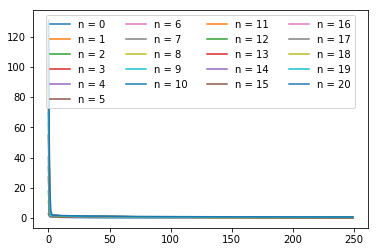

In [9]:
n_batches = 21
batch_sizes = np.round(np.linspace(100,X_train_scaled.shape[0],n_batches))
n = 0

while n < n_batches:
    
    temp = batch_sizes[n]
    
        #Sigmoidal
    SigModelBatSize = Sequential()
    SigModelBatSize.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    SigModelBatSize.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    SigModelBatSize.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])
    SigHistoryBatSize = SigModelBatSize.fit(X_train_scaled,y_train,batch_size=temp.astype(int),epochs=epo,validation_data=(X_val_scaled, y_val))
    pyplot.plot(SigHistoryBatSize.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Sig_BatSize_%s.png')%hoje)
    
    n = n+1

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 217us/step - loss: 138.9101 - mean_squared_error: 138.9101 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 2/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 3/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 4/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 5/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 6/250
9745/9745 [==============================] - 0s 50us/step - loss: 135

Epoch 48/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 49/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 50/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 51/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 52/250
9745/9745 [==============================] - 0s 48us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 53/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 95/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 96/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 97/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 98/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 99/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 100/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val

Epoch 142/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 143/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 144/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 145/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 146/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 147/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 189/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 190/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 191/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 192/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 193/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 194/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 236/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 237/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 238/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 239/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 240/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 241/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 33/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 34/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 35/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 36/250
9745/9745 [==============================] - 1s 61us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 37/250
9745/9745 [==============================] - 1s 60us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 38/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 80/250
9745/9745 [==============================] - 1s 60us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 81/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 82/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 83/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 84/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 85/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 127/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 128/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 129/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 130/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 131/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 132/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 174/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 175/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 176/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 177/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 178/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 179/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 221/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 222/250
9745/9745 [==============================] - 0s 47us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 223/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 224/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 225/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 226/250
9745/9745 [==============================] - 0s 42us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 18/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 19/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 20/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 21/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 22/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 23/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 65/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 66/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 67/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 68/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 69/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 70/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 112/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 113/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 114/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 115/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 116/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 117/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 159/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 160/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 161/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 162/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 163/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 164/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 206/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 207/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 208/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 209/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 210/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 211/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 3/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 4/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 5/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 6/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 7/250
9745/9745 [==============================] - 1s 64us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 8/250
9745/9745 [==============================] - 1s 65us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 

Epoch 50/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 51/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 52/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 53/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 54/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 55/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 97/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 98/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 99/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 100/250
9745/9745 [==============================] - 1s 59us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 101/250
9745/9745 [==============================] - 1s 62us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 102/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - v

Epoch 144/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 145/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 146/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 147/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 148/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 149/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 191/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 192/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 193/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 194/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 195/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 196/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 238/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 239/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 240/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 241/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 242/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 243/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 35/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 36/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 37/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 38/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 39/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 40/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 82/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 83/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 84/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 85/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 86/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 87/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 129/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 130/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 131/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 132/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 133/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 134/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 176/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 177/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 178/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 179/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 180/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 181/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 223/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 224/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 225/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 226/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 227/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 228/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 20/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 21/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 22/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 23/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 24/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 25/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 67/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 68/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 69/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 70/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 71/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 72/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 114/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 115/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 116/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 117/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 118/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 119/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 161/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 162/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 163/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 164/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 165/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 166/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 208/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 209/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 210/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 211/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 212/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 213/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 5/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 6/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 7/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 8/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 9/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 10/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss:

Epoch 52/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 53/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 54/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 55/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 56/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 57/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 99/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 100/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 101/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 102/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 103/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 104/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 -

Epoch 146/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 147/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 148/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 149/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 150/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 151/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 193/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 194/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 195/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 196/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 197/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 198/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 240/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 241/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 242/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 243/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 244/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 245/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 37/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 38/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 39/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 40/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 41/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 42/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 84/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 85/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 86/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 87/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 88/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 89/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 131/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 132/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 133/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 134/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 135/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 136/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 178/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 179/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 180/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 181/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 182/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 183/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 225/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 226/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 227/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 228/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 229/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 230/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 22/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 23/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 24/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 25/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 26/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 27/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 69/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 70/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 71/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 72/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 73/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 74/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 116/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 117/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 118/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 119/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 120/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 121/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 163/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 164/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 165/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 166/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 167/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 168/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 210/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 211/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 212/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 213/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 214/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 215/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 7/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 8/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 9/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 10/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 11/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 12/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_los

Epoch 54/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 55/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 56/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 57/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 58/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 59/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 101/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 102/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 103/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 104/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 105/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 106/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 148/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 149/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 150/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 151/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 152/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 153/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 195/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 196/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 197/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 198/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 199/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 200/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 242/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 243/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 244/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 245/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 246/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 247/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 39/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 40/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 41/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 42/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 43/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 44/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 86/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 87/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 88/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 89/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 90/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 91/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 133/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 134/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 135/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 136/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 137/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 138/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 180/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 181/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 182/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 183/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 184/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 185/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 227/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 228/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 229/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 230/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 231/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 232/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 24/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 25/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 26/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 27/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 28/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 29/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 71/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 72/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 73/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 74/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 75/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 76/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 118/250
9745/9745 [==============================] - 1s 67us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 119/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 120/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 121/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 122/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 123/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 165/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 166/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 167/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 168/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 169/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 170/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 212/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 213/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 214/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 215/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 216/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 217/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 9/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 10/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 11/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 12/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 13/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 14/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_l

Epoch 56/250
9745/9745 [==============================] - 1s 59us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 57/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 58/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 59/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 60/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 61/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 103/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 104/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 105/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 106/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 107/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 108/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 150/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 151/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 152/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 153/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 154/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 155/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 197/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 198/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 199/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 200/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 201/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 202/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 244/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 245/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 246/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 247/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 248/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 249/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 41/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 42/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 43/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 44/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 45/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 46/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 88/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 89/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 90/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 91/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 92/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 93/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 135/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 136/250
9745/9745 [==============================] - 0s 47us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 137/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 138/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 139/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 140/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 182/250
9745/9745 [==============================] - 0s 44us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 183/250
9745/9745 [==============================] - 0s 46us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 184/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 185/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 229/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 230/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 231/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 232/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 233/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 234/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 26/250
9745/9745 [==============================] - 1s 63us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 27/250
9745/9745 [==============================] - 1s 59us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 28/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 29/250
9745/9745 [==============================] - 1s 60us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 30/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 31/250
9745/9745 [==============================] - 0s 48us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 73/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 74/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 75/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 76/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 77/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 78/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 120/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 121/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 122/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 123/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 124/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 125/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 167/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 168/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 169/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 170/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 171/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 172/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 214/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 215/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 216/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 217/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 218/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 219/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 11/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 12/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 13/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 14/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 15/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 16/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 58/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 59/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 60/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 61/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 62/250
9745/9745 [==============================] - 1s 61us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 63/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 105/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 106/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 107/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 108/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 109/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 110/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 152/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 153/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 154/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 155/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 156/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 157/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 199/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 200/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 201/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 202/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 203/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 204/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 246/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 247/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 248/250
9745/9745 [==============================] - 1s 62us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 249/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 250/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 258us/step -

Epoch 43/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 44/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 45/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 46/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 47/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 48/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 90/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 91/250
9745/9745 [==============================] - 1s 60us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 92/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 93/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 94/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 95/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 137/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 138/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 139/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 140/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 141/250
9745/9745 [==============================] - 1s 60us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 142/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 184/250
9745/9745 [==============================] - 1s 66us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 185/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 188/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 189/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 231/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 232/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 233/250
9745/9745 [==============================] - 1s 71us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 234/250
9745/9745 [==============================] - 1s 63us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 235/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 236/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 28/250
9745/9745 [==============================] - 1s 69us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 29/250
9745/9745 [==============================] - 1s 90us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 30/250
9745/9745 [==============================] - 1s 92us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 31/250
9745/9745 [==============================] - 1s 81us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 32/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 33/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 75/250
9745/9745 [==============================] - 1s 67us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 76/250
9745/9745 [==============================] - 1s 83us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 77/250
9745/9745 [==============================] - 1s 89us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 78/250
9745/9745 [==============================] - 1s 67us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 79/250
9745/9745 [==============================] - 1s 64us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 80/250
9745/9745 [==============================] - 1s 73us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 122/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 123/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 124/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 125/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 126/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 127/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 169/250
9745/9745 [==============================] - 0s 44us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 170/250
9745/9745 [==============================] - 0s 43us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 171/250
9745/9745 [==============================] - 0s 45us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 172/250
9745/9745 [==============================] - 0s 42us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 173/250
9745/9745 [==============================] - 1s 65us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 174/250
9745/9745 [==============================] - 0s 45us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 216/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 217/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 218/250
9745/9745 [==============================] - 1s 61us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 219/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 220/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 221/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 13/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 14/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 15/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 16/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 17/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 18/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 60/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 61/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 62/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 63/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 64/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 65/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 107/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 108/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 109/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 110/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 111/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 112/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 154/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 155/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 156/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 157/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 158/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 159/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 201/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 202/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 203/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 204/250
9745/9745 [==============================] - 1s 62us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 205/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 206/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 248/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 249/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 250/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 257us/step - loss: 140.6816 - mean_squared_error: 140.6816 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 2/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 3/250
9745/9745 [==============================] - 1s 56us/step - los

Epoch 45/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 46/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 47/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 48/250
9745/9745 [==============================] - 1s 55us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 49/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 50/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_

Epoch 92/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 93/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 94/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 95/250
9745/9745 [==============================] - 0s 48us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 96/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 97/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 139/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 140/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 141/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 142/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 143/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 144/250
9745/9745 [==============================] - 1s 56us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 186/250
9745/9745 [==============================] - 1s 65us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 1s 58us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 188/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 189/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 190/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 191/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 233/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 234/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 235/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 236/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 237/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 238/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 30/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 31/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 32/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 33/250
9745/9745 [==============================] - 1s 54us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 34/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 35/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 77/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 78/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 79/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 80/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 81/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 82/250
9745/9745 [==============================] - 1s 53us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_

Epoch 124/250
9745/9745 [==============================] - 1s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 125/250
9745/9745 [==============================] - 1s 57us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 126/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 127/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 128/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 129/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 

Epoch 171/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 172/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 173/250
9745/9745 [==============================] - 0s 49us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 174/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 175/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 176/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 

Epoch 218/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 219/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 220/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 221/250
9745/9745 [==============================] - 1s 52us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 222/250
9745/9745 [==============================] - 0s 50us/step - loss: 135.6842 - mean_squared_error: 135.6842 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 223/250
9745/9745 [==============================] - 0s 51us/step - loss: 135.6843 - mean_squared_error: 135.6843 

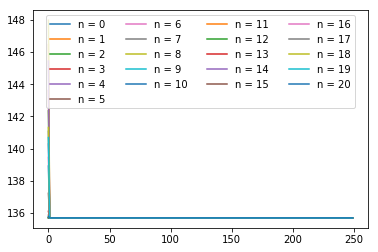

In [10]:
n_batches = 21
batch_sizes =np.round(np.linspace(100,X_train_scaled.shape[0],n_batches))
n = 0

while n < n_batches:
        #Relu
    ReluModelBatSize = Sequential()
    ReluModelBatSize.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    ReluModelBatSize.add(Dense(1, kernel_initializer='uniform',activation="relu"))
    ReluModelBatSize.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])
    ReluHistoryBatSize = ReluModelBatSize.fit(X_train_scaled,y_train,batch_size=temp.astype(int),epochs=epo,validation_data=(X_val_scaled, y_val))
    pyplot.plot(ReluHistoryBatSize.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Relu_BatSize_%s.png')%hoje)
    
    n = n+1

Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 5s 490us/step - loss: 6.4339 - mean_squared_error: 6.4339 - val_loss: 2.3978 - val_mean_squared_error: 2.3978
Epoch 2/2
9745/9745 [==============================] - 3s 289us/step - loss: 1.2007 - mean_squared_error: 1.2007 - val_loss: 1.0452 - val_mean_squared_error: 1.0452
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.6285 - mean_squared_error: 0.6285 - val_loss: 0.6021 - val_mean_squared_error: 0.6021
Epoch 2/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.4245 - mean_squared_error: 0.4245 - val_loss: 0.4305 - val_mean_squared_error: 0.4305
Epoch 3/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.3195 - mean_squared_error: 0.3195 - val_loss: 0.3293 - val_mean_squared_error: 0.3293
Epoch 4/250
9745/9745 [==============================] - 3s 291us/step - 

Epoch 96/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 97/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 98/250
9745/9745 [==============================] - 3s 285us/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 99/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 100/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 101/250
9745/9745 [==============================] - 3s 275us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0567 - val_mean_squared_erro

9745/9745 [==============================] - 3s 300us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 193/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 194/250
9745/9745 [==============================] - 3s 279us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 195/250
9745/9745 [==============================] - 3s 275us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 196/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 197/250
9745/9745 [==============================] - 3s 296us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0476 - val_mean_squared_error: 0.0476


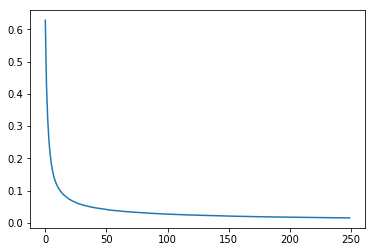

In [11]:
    #Sigmoidal
SigModelOpt = Sequential()
SigModelOpt.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
SigModelOpt.add(Dense(1, kernel_initializer='uniform',activation="linear"))
SigModelOpt.compile(optimizer=moptimizer,loss='mean_squared_error',metrics=['mse'])
SigModelOpt.fit(X_train_scaled,y_train,epochs=2,validation_data=(X_val_scaled, y_val))
SigHistoryOpt = SigModelOpt.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
pyplot.plot(SigHistoryOpt.history['mean_squared_error'])
pyplot.savefig(os.path.join(my_path, 'Sigmoid_Optimizer_%s.png')%hoje)

In [12]:
        #Relu
ReluModelOpt = Sequential()
ReluModelOpt.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
ReluModelOpt.add(Dense(1, kernel_initializer='uniform',activation="sigmoid"))
ReluModelOpt.compile(optimizer=moptimizer,loss='mean_squared_error',metrics=['mse'])
ReluModelOpt.fit(X_train_scaled,y_train,epochs=2,validation_data=(X_val_scaled, y_val))
ReluHistoryOpt = ReluModelOpt.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
pyplot.plot(ReluHistoryOpt.history['mean_squared_error'])
pyplot.savefig(os.path.join(my_path, 'Relu_Optimizer_%s.png' %hoje))

Train on 9745 samples, validate on 4060 samples
Epoch 1/2
9745/9745 [==============================] - 5s 484us/step - loss: 135.7271 - mean_squared_error: 135.7271 - val_loss: 155.2163 - val_mean_squared_error: 155.2163
Epoch 2/2
9745/9745 [==============================] - 3s 274us/step - loss: 135.6846 - mean_squared_error: 135.6846 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 280us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2160 - val_mean_squared_error: 155.2160
Epoch 2/250
9745/9745 [==============================] - 3s 273us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 3/250
9745/9745 [==============================] - 3s 272us/step - loss: 135.6844 - mean_squared_error: 135.6844 - val_loss: 155.2159 - val_mean_squared_error: 155.2159
Epoch 4/250
9745/9745 [==========

9745/9745 [==============================] - 3s 287us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 92/250
9745/9745 [==============================] - 3s 273us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 93/250
9745/9745 [==============================] - 3s 280us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 94/250
9745/9745 [==============================] - 3s 259us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 95/250
9745/9745 [==============================] - 3s 269us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 96/250
9745/9745 [==============================] - 3s 270us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 1

9745/9745 [==============================] - 3s 324us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 184/250
9745/9745 [==============================] - 3s 317us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 185/250
9745/9745 [==============================] - 3s 296us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 186/250
9745/9745 [==============================] - 3s 293us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 187/250
9745/9745 [==============================] - 3s 341us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_loss: 155.2158 - val_mean_squared_error: 155.2158
Epoch 188/250
9745/9745 [==============================] - 3s 304us/step - loss: 135.6843 - mean_squared_error: 135.6843 - val_lo

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 420us/step - loss: 2.3127 - mean_squared_error: 1.4702 - val_loss: 1.3734 - val_mean_squared_error: 0.5350
Epoch 2/250
9745/9745 [==============================] - 2s 251us/step - loss: 1.4481 - mean_squared_error: 0.6143 - val_loss: 1.3349 - val_mean_squared_error: 0.5056
Epoch 3/250
9745/9745 [==============================] - 2s 251us/step - loss: 1.3335 - mean_squared_error: 0.5089 - val_loss: 1.2669 - val_mean_squared_error: 0.4468
Epoch 4/250
9745/9745 [==============================] - 2s 247us/step - loss: 1.2566 - mean_squared_error: 0.4411 - val_loss: 1.1612 - val_mean_squared_error: 0.3503
Epoch 5/250
9745/9745 [==============================] - 2s 250us/step - loss: 1.1950 - mean_squared_error: 0.3886 - val_loss: 1.1756 - val_mean_squared_error: 0.3738
Epoch 6/250
9745/9745 [==============================] - 2s 249us/step - loss: 1.1279 - mean_squared_error: 0.3306 - 

Epoch 98/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.2241 - mean_squared_error: 0.0484 - val_loss: 0.2272 - val_mean_squared_error: 0.0534
Epoch 99/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.2343 - mean_squared_error: 0.0622 - val_loss: 0.2359 - val_mean_squared_error: 0.0655
Epoch 100/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2180 - mean_squared_error: 0.0494 - val_loss: 0.2255 - val_mean_squared_error: 0.0586
Epoch 101/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.2145 - mean_squared_error: 0.0492 - val_loss: 0.2194 - val_mean_squared_error: 0.0559
Epoch 102/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.2229 - mean_squared_error: 0.0609 - val_loss: 0.2356 - val_mean_squared_error: 0.0751
Epoch 103/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.2160 - mean_squared_error: 0.0573 - val_loss: 0.2455 - val_mean_squared_er

9745/9745 [==============================] - 3s 275us/step - loss: 0.1129 - mean_squared_error: 0.0495 - val_loss: 0.1907 - val_mean_squared_error: 0.1275
Epoch 195/250
9745/9745 [==============================] - 3s 297us/step - loss: 0.1311 - mean_squared_error: 0.0677 - val_loss: 0.1124 - val_mean_squared_error: 0.0490
Epoch 196/250
9745/9745 [==============================] - 3s 294us/step - loss: 0.1112 - mean_squared_error: 0.0481 - val_loss: 0.1272 - val_mean_squared_error: 0.0640
Epoch 197/250
9745/9745 [==============================] - 3s 311us/step - loss: 0.1214 - mean_squared_error: 0.0582 - val_loss: 0.1077 - val_mean_squared_error: 0.0448
Epoch 198/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.1300 - mean_squared_error: 0.0668 - val_loss: 0.2111 - val_mean_squared_error: 0.1454
Epoch 199/250
9745/9745 [==============================] - 3s 289us/step - loss: 0.1207 - mean_squared_error: 0.0568 - val_loss: 0.1148 - val_mean_squared_error: 0.0518


9745/9745 [==============================] - 3s 359us/step - loss: 0.3724 - mean_squared_error: 0.1501 - val_loss: 0.3139 - val_mean_squared_error: 0.0985
Epoch 41/250
9745/9745 [==============================] - 3s 329us/step - loss: 0.3991 - mean_squared_error: 0.1869 - val_loss: 0.3138 - val_mean_squared_error: 0.1039
Epoch 42/250
9745/9745 [==============================] - 3s 316us/step - loss: 0.3658 - mean_squared_error: 0.1611 - val_loss: 0.3818 - val_mean_squared_error: 0.1784
Epoch 43/250
9745/9745 [==============================] - 3s 332us/step - loss: 0.3672 - mean_squared_error: 0.1684 - val_loss: 0.3257 - val_mean_squared_error: 0.1281
Epoch 44/250
9745/9745 [==============================] - 3s 340us/step - loss: 0.3370 - mean_squared_error: 0.1425 - val_loss: 0.3107 - val_mean_squared_error: 0.1205
Epoch 45/250
9745/9745 [==============================] - 3s 356us/step - loss: 0.3442 - mean_squared_error: 0.1541 - val_loss: 0.3029 - val_mean_squared_error: 0.1162
Epoch

Epoch 89/250
9745/9745 [==============================] - 4s 418us/step - loss: 0.2840 - mean_squared_error: 0.1379 - val_loss: 0.2349 - val_mean_squared_error: 0.0903
Epoch 90/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.2572 - mean_squared_error: 0.1123 - val_loss: 0.2252 - val_mean_squared_error: 0.0813
Epoch 91/250
9745/9745 [==============================] - 4s 406us/step - loss: 0.2925 - mean_squared_error: 0.1477 - val_loss: 0.3305 - val_mean_squared_error: 0.1808
Epoch 92/250
9745/9745 [==============================] - 4s 443us/step - loss: 0.2644 - mean_squared_error: 0.1201 - val_loss: 0.2168 - val_mean_squared_error: 0.0746
Epoch 93/250
9745/9745 [==============================] - 5s 468us/step - loss: 0.2392 - mean_squared_error: 0.0967 - val_loss: 0.2728 - val_mean_squared_error: 0.1289
Epoch 94/250
9745/9745 [==============================] - 5s 489us/step - loss: 0.2874 - mean_squared_error: 0.1446 - val_loss: 0.2145 - val_mean_squared_error:

9745/9745 [==============================] - 4s 418us/step - loss: 0.2058 - mean_squared_error: 0.0874 - val_loss: 0.2093 - val_mean_squared_error: 0.0917
Epoch 186/250
9745/9745 [==============================] - 5s 518us/step - loss: 0.2405 - mean_squared_error: 0.1223 - val_loss: 0.1854 - val_mean_squared_error: 0.0668
Epoch 187/250
9745/9745 [==============================] - 4s 395us/step - loss: 0.2005 - mean_squared_error: 0.0829 - val_loss: 0.2062 - val_mean_squared_error: 0.0893
Epoch 188/250
9745/9745 [==============================] - 4s 370us/step - loss: 0.2157 - mean_squared_error: 0.0986 - val_loss: 0.4487 - val_mean_squared_error: 0.3283
Epoch 189/250
9745/9745 [==============================] - 3s 335us/step - loss: 0.2429 - mean_squared_error: 0.1249 - val_loss: 0.1947 - val_mean_squared_error: 0.0786
Epoch 190/250
9745/9745 [==============================] - 4s 408us/step - loss: 0.2063 - mean_squared_error: 0.0894 - val_loss: 0.1793 - val_mean_squared_error: 0.0630


9745/9745 [==============================] - 3s 261us/step - loss: 0.4466 - mean_squared_error: 0.2032 - val_loss: 0.6834 - val_mean_squared_error: 0.4360
Epoch 32/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.4891 - mean_squared_error: 0.2475 - val_loss: 0.4118 - val_mean_squared_error: 0.1735
Epoch 33/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.4803 - mean_squared_error: 0.2403 - val_loss: 0.4500 - val_mean_squared_error: 0.2015
Epoch 34/250
9745/9745 [==============================] - 2s 244us/step - loss: 0.4516 - mean_squared_error: 0.2142 - val_loss: 0.3633 - val_mean_squared_error: 0.1301
Epoch 35/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.4275 - mean_squared_error: 0.1939 - val_loss: 0.4039 - val_mean_squared_error: 0.1714
Epoch 36/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.4490 - mean_squared_error: 0.2179 - val_loss: 0.3771 - val_mean_squared_error: 0.1491
Epoch

Epoch 80/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.3571 - mean_squared_error: 0.1663 - val_loss: 0.3266 - val_mean_squared_error: 0.1373
Epoch 81/250
9745/9745 [==============================] - 3s 337us/step - loss: 0.3933 - mean_squared_error: 0.2006 - val_loss: 0.5667 - val_mean_squared_error: 0.3708
Epoch 82/250
9745/9745 [==============================] - 3s 338us/step - loss: 0.3238 - mean_squared_error: 0.1339 - val_loss: 0.3483 - val_mean_squared_error: 0.1603
Epoch 83/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.3502 - mean_squared_error: 0.1612 - val_loss: 0.4025 - val_mean_squared_error: 0.2108
Epoch 84/250
9745/9745 [==============================] - 3s 351us/step - loss: 0.3455 - mean_squared_error: 0.1569 - val_loss: 0.3580 - val_mean_squared_error: 0.1714
Epoch 85/250
9745/9745 [==============================] - 4s 399us/step - loss: 0.3465 - mean_squared_error: 0.1587 - val_loss: 0.2906 - val_mean_squared_error:

9745/9745 [==============================] - 3s 303us/step - loss: 0.2674 - mean_squared_error: 0.1095 - val_loss: 0.2521 - val_mean_squared_error: 0.0959
Epoch 177/250
9745/9745 [==============================] - 4s 374us/step - loss: 0.2924 - mean_squared_error: 0.1350 - val_loss: 0.2580 - val_mean_squared_error: 0.1009
Epoch 178/250
9745/9745 [==============================] - 3s 304us/step - loss: 0.3035 - mean_squared_error: 0.1460 - val_loss: 0.2703 - val_mean_squared_error: 0.1116
Epoch 179/250
9745/9745 [==============================] - 3s 304us/step - loss: 0.2820 - mean_squared_error: 0.1242 - val_loss: 0.2381 - val_mean_squared_error: 0.0814
Epoch 180/250
9745/9745 [==============================] - 3s 323us/step - loss: 0.2630 - mean_squared_error: 0.1068 - val_loss: 0.5507 - val_mean_squared_error: 0.3921
Epoch 181/250
9745/9745 [==============================] - 3s 314us/step - loss: 0.2955 - mean_squared_error: 0.1379 - val_loss: 0.2575 - val_mean_squared_error: 0.1022


9745/9745 [==============================] - 4s 405us/step - loss: 0.5983 - mean_squared_error: 0.2964 - val_loss: 0.5537 - val_mean_squared_error: 0.2612
Epoch 23/250
9745/9745 [==============================] - 4s 403us/step - loss: 0.6047 - mean_squared_error: 0.3073 - val_loss: 0.4885 - val_mean_squared_error: 0.2000
Epoch 24/250
9745/9745 [==============================] - 4s 416us/step - loss: 0.5729 - mean_squared_error: 0.2801 - val_loss: 0.4855 - val_mean_squared_error: 0.1878
Epoch 25/250
9745/9745 [==============================] - 4s 410us/step - loss: 0.5623 - mean_squared_error: 0.2732 - val_loss: 0.6174 - val_mean_squared_error: 0.3212
Epoch 26/250
9745/9745 [==============================] - 4s 387us/step - loss: 0.5475 - mean_squared_error: 0.2628 - val_loss: 0.5700 - val_mean_squared_error: 0.2855
Epoch 27/250
9745/9745 [==============================] - 4s 391us/step - loss: 0.5344 - mean_squared_error: 0.2540 - val_loss: 0.6477 - val_mean_squared_error: 0.3635
Epoch

Epoch 71/250
9745/9745 [==============================] - 4s 397us/step - loss: 0.4641 - mean_squared_error: 0.2260 - val_loss: 0.3695 - val_mean_squared_error: 0.1362
Epoch 72/250
9745/9745 [==============================] - 4s 417us/step - loss: 0.4063 - mean_squared_error: 0.1707 - val_loss: 0.3884 - val_mean_squared_error: 0.1494
Epoch 73/250
9745/9745 [==============================] - 4s 403us/step - loss: 0.4477 - mean_squared_error: 0.2121 - val_loss: 0.3476 - val_mean_squared_error: 0.1155
Epoch 74/250
9745/9745 [==============================] - 4s 401us/step - loss: 0.4051 - mean_squared_error: 0.1714 - val_loss: 0.4489 - val_mean_squared_error: 0.2175
Epoch 75/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.4580 - mean_squared_error: 0.2239 - val_loss: 0.4435 - val_mean_squared_error: 0.2123
Epoch 76/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.4074 - mean_squared_error: 0.1746 - val_loss: 0.4748 - val_mean_squared_error:

9745/9745 [==============================] - 4s 407us/step - loss: 0.3447 - mean_squared_error: 0.1460 - val_loss: 0.3135 - val_mean_squared_error: 0.1171
Epoch 168/250
9745/9745 [==============================] - 4s 404us/step - loss: 0.3885 - mean_squared_error: 0.1881 - val_loss: 0.3028 - val_mean_squared_error: 0.1049
Epoch 169/250
9745/9745 [==============================] - 4s 396us/step - loss: 0.3374 - mean_squared_error: 0.1384 - val_loss: 0.3868 - val_mean_squared_error: 0.1859
Epoch 170/250
9745/9745 [==============================] - 4s 403us/step - loss: 0.3346 - mean_squared_error: 0.1373 - val_loss: 0.2949 - val_mean_squared_error: 0.0983
Epoch 171/250
9745/9745 [==============================] - 4s 403us/step - loss: 0.3377 - mean_squared_error: 0.1404 - val_loss: 0.4980 - val_mean_squared_error: 0.3010
Epoch 172/250
9745/9745 [==============================] - 4s 416us/step - loss: 0.3551 - mean_squared_error: 0.1580 - val_loss: 2.0028 - val_mean_squared_error: 1.7900


9745/9745 [==============================] - 5s 538us/step - loss: 0.8055 - mean_squared_error: 0.3124 - val_loss: 0.7234 - val_mean_squared_error: 0.2820
Epoch 14/250
9745/9745 [==============================] - 6s 568us/step - loss: 0.7456 - mean_squared_error: 0.3328 - val_loss: 0.6330 - val_mean_squared_error: 0.2481
Epoch 15/250
9745/9745 [==============================] - 5s 465us/step - loss: 0.7174 - mean_squared_error: 0.3401 - val_loss: 0.6755 - val_mean_squared_error: 0.2904
Epoch 16/250
9745/9745 [==============================] - 5s 518us/step - loss: 0.6942 - mean_squared_error: 0.3333 - val_loss: 0.5933 - val_mean_squared_error: 0.2398
Epoch 17/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.6893 - mean_squared_error: 0.3420 - val_loss: 0.6528 - val_mean_squared_error: 0.3170
Epoch 18/250
9745/9745 [==============================] - 5s 557us/step - loss: 0.6672 - mean_squared_error: 0.3295 - val_loss: 0.6390 - val_mean_squared_error: 0.3065
Epoch

Epoch 110/250
9745/9745 [==============================] - 4s 460us/step - loss: 0.4667 - mean_squared_error: 0.2184 - val_loss: 0.9528 - val_mean_squared_error: 0.7035
Epoch 111/250
9745/9745 [==============================] - 4s 454us/step - loss: 0.4727 - mean_squared_error: 0.2257 - val_loss: 0.3895 - val_mean_squared_error: 0.1332
Epoch 112/250
9745/9745 [==============================] - 5s 479us/step - loss: 0.4300 - mean_squared_error: 0.1831 - val_loss: 0.3576 - val_mean_squared_error: 0.1123
Epoch 113/250
9745/9745 [==============================] - 5s 469us/step - loss: 0.4672 - mean_squared_error: 0.2219 - val_loss: 0.8569 - val_mean_squared_error: 0.5977
Epoch 114/250
9745/9745 [==============================] - 5s 480us/step - loss: 0.4619 - mean_squared_error: 0.2139 - val_loss: 0.4058 - val_mean_squared_error: 0.1616
Epoch 115/250
9745/9745 [==============================] - 4s 456us/step - loss: 0.4297 - mean_squared_error: 0.1856 - val_loss: 0.8381 - val_mean_squared_

9745/9745 [==============================] - 4s 388us/step - loss: 0.3900 - mean_squared_error: 0.1711 - val_loss: 0.3264 - val_mean_squared_error: 0.1070
Epoch 207/250
9745/9745 [==============================] - 4s 436us/step - loss: 0.3484 - mean_squared_error: 0.1328 - val_loss: 0.4283 - val_mean_squared_error: 0.2112
Epoch 208/250
9745/9745 [==============================] - 5s 463us/step - loss: 0.3830 - mean_squared_error: 0.1658 - val_loss: 0.3675 - val_mean_squared_error: 0.1508
Epoch 209/250
9745/9745 [==============================] - 5s 463us/step - loss: 0.3891 - mean_squared_error: 0.1720 - val_loss: 0.3242 - val_mean_squared_error: 0.1122
Epoch 210/250
9745/9745 [==============================] - 4s 461us/step - loss: 0.4111 - mean_squared_error: 0.1927 - val_loss: 0.3181 - val_mean_squared_error: 0.1063
Epoch 211/250
9745/9745 [==============================] - 4s 450us/step - loss: 0.4041 - mean_squared_error: 0.1853 - val_loss: 0.3438 - val_mean_squared_error: 0.1209


Epoch 53/250
9745/9745 [==============================] - 4s 390us/step - loss: 0.6158 - mean_squared_error: 0.3080 - val_loss: 0.4705 - val_mean_squared_error: 0.1697
Epoch 54/250
9745/9745 [==============================] - 4s 440us/step - loss: 0.5743 - mean_squared_error: 0.2712 - val_loss: 0.4825 - val_mean_squared_error: 0.1866
Epoch 55/250
9745/9745 [==============================] - 4s 458us/step - loss: 0.6298 - mean_squared_error: 0.3253 - val_loss: 0.4729 - val_mean_squared_error: 0.1671
Epoch 56/250
9745/9745 [==============================] - 4s 375us/step - loss: 0.6100 - mean_squared_error: 0.3053 - val_loss: 1.7720 - val_mean_squared_error: 1.4591
Epoch 57/250
9745/9745 [==============================] - 4s 389us/step - loss: 0.5783 - mean_squared_error: 0.2750 - val_loss: 0.4842 - val_mean_squared_error: 0.1915
Epoch 58/250
9745/9745 [==============================] - 4s 381us/step - loss: 0.6214 - mean_squared_error: 0.3195 - val_loss: 0.4585 - val_mean_squared_error:

Epoch 102/250
9745/9745 [==============================] - 4s 374us/step - loss: 0.5435 - mean_squared_error: 0.2661 - val_loss: 0.4178 - val_mean_squared_error: 0.1454
Epoch 103/250
9745/9745 [==============================] - 4s 390us/step - loss: 0.4897 - mean_squared_error: 0.2132 - val_loss: 0.4802 - val_mean_squared_error: 0.2108
Epoch 104/250
9745/9745 [==============================] - 4s 409us/step - loss: 0.5349 - mean_squared_error: 0.2592 - val_loss: 0.4181 - val_mean_squared_error: 0.1442
Epoch 105/250
9745/9745 [==============================] - 3s 344us/step - loss: 0.5053 - mean_squared_error: 0.2300 - val_loss: 0.4643 - val_mean_squared_error: 0.1917
Epoch 106/250
9745/9745 [==============================] - 3s 319us/step - loss: 0.5027 - mean_squared_error: 0.2292 - val_loss: 0.7301 - val_mean_squared_error: 0.4470
Epoch 107/250
9745/9745 [==============================] - 4s 421us/step - loss: 0.4839 - mean_squared_error: 0.2098 - val_loss: 0.4165 - val_mean_squared_

9745/9745 [==============================] - 4s 411us/step - loss: 0.3871 - mean_squared_error: 0.1510 - val_loss: 0.6919 - val_mean_squared_error: 0.4471
Epoch 199/250
9745/9745 [==============================] - 4s 404us/step - loss: 0.4057 - mean_squared_error: 0.1689 - val_loss: 0.5039 - val_mean_squared_error: 0.2678
Epoch 200/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.4201 - mean_squared_error: 0.1809 - val_loss: 1.5594 - val_mean_squared_error: 1.3123
Epoch 201/250
9745/9745 [==============================] - 4s 402us/step - loss: 0.4449 - mean_squared_error: 0.2061 - val_loss: 0.4488 - val_mean_squared_error: 0.2137
Epoch 202/250
9745/9745 [==============================] - 4s 398us/step - loss: 0.4025 - mean_squared_error: 0.1677 - val_loss: 0.4458 - val_mean_squared_error: 0.2094
Epoch 203/250
9745/9745 [==============================] - 4s 445us/step - loss: 0.4213 - mean_squared_error: 0.1861 - val_loss: 0.4640 - val_mean_squared_error: 0.2286


9745/9745 [==============================] - 4s 420us/step - loss: 0.7019 - mean_squared_error: 0.3498 - val_loss: 1.0287 - val_mean_squared_error: 0.6616
Epoch 45/250
9745/9745 [==============================] - 4s 411us/step - loss: 0.7253 - mean_squared_error: 0.3709 - val_loss: 0.5248 - val_mean_squared_error: 0.1794
Epoch 46/250
9745/9745 [==============================] - 4s 409us/step - loss: 0.6859 - mean_squared_error: 0.3352 - val_loss: 0.5727 - val_mean_squared_error: 0.2288
Epoch 47/250
9745/9745 [==============================] - 4s 404us/step - loss: 0.7317 - mean_squared_error: 0.3803 - val_loss: 0.5436 - val_mean_squared_error: 0.1894
Epoch 48/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.6473 - mean_squared_error: 0.2994 - val_loss: 0.5551 - val_mean_squared_error: 0.2115
Epoch 49/250
9745/9745 [==============================] - 4s 426us/step - loss: 0.6841 - mean_squared_error: 0.3390 - val_loss: 0.5533 - val_mean_squared_error: 0.2096
Epoch

Epoch 93/250
9745/9745 [==============================] - 4s 401us/step - loss: 0.5974 - mean_squared_error: 0.2805 - val_loss: 0.6142 - val_mean_squared_error: 0.3016
Epoch 94/250
9745/9745 [==============================] - 4s 402us/step - loss: 0.6102 - mean_squared_error: 0.2938 - val_loss: 0.6298 - val_mean_squared_error: 0.3129
Epoch 95/250
9745/9745 [==============================] - 4s 417us/step - loss: 0.5523 - mean_squared_error: 0.2394 - val_loss: 0.4528 - val_mean_squared_error: 0.1444
Epoch 96/250
9745/9745 [==============================] - 4s 414us/step - loss: 0.5367 - mean_squared_error: 0.2249 - val_loss: 0.6269 - val_mean_squared_error: 0.3216
Epoch 97/250
9745/9745 [==============================] - 4s 423us/step - loss: 0.5744 - mean_squared_error: 0.2618 - val_loss: 0.4920 - val_mean_squared_error: 0.1853
Epoch 98/250
9745/9745 [==============================] - 4s 405us/step - loss: 0.5679 - mean_squared_error: 0.2555 - val_loss: 0.8151 - val_mean_squared_error:

9745/9745 [==============================] - 3s 290us/step - loss: 0.4297 - mean_squared_error: 0.1770 - val_loss: 0.3993 - val_mean_squared_error: 0.1437
Epoch 190/250
9745/9745 [==============================] - 3s 286us/step - loss: 0.4478 - mean_squared_error: 0.1952 - val_loss: 0.3965 - val_mean_squared_error: 0.1488
Epoch 191/250
9745/9745 [==============================] - 3s 312us/step - loss: 0.4274 - mean_squared_error: 0.1763 - val_loss: 0.3978 - val_mean_squared_error: 0.1458
Epoch 192/250
9745/9745 [==============================] - 3s 302us/step - loss: 0.4887 - mean_squared_error: 0.2346 - val_loss: 0.4098 - val_mean_squared_error: 0.1506
Epoch 193/250
9745/9745 [==============================] - 3s 299us/step - loss: 0.4170 - mean_squared_error: 0.1648 - val_loss: 0.4852 - val_mean_squared_error: 0.2332
Epoch 194/250
9745/9745 [==============================] - 4s 382us/step - loss: 0.4592 - mean_squared_error: 0.2053 - val_loss: 0.3857 - val_mean_squared_error: 0.1295


9745/9745 [==============================] - 3s 259us/step - loss: 0.7988 - mean_squared_error: 0.4250 - val_loss: 0.6191 - val_mean_squared_error: 0.2491
Epoch 36/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.7486 - mean_squared_error: 0.3768 - val_loss: 0.6866 - val_mean_squared_error: 0.3124
Epoch 37/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.7325 - mean_squared_error: 0.3636 - val_loss: 0.7376 - val_mean_squared_error: 0.3733
Epoch 38/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.7786 - mean_squared_error: 0.4090 - val_loss: 0.6477 - val_mean_squared_error: 0.2812
Epoch 39/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.7145 - mean_squared_error: 0.3484 - val_loss: 0.5790 - val_mean_squared_error: 0.2210
Epoch 40/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.8019 - mean_squared_error: 0.4333 - val_loss: 0.6849 - val_mean_squared_error: 0.3287
Epoch

Epoch 84/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.6477 - mean_squared_error: 0.3131 - val_loss: 0.5089 - val_mean_squared_error: 0.1811
Epoch 85/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.6010 - mean_squared_error: 0.2662 - val_loss: 0.5274 - val_mean_squared_error: 0.2045
Epoch 86/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.6367 - mean_squared_error: 0.3052 - val_loss: 0.5854 - val_mean_squared_error: 0.2575
Epoch 87/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.6397 - mean_squared_error: 0.3077 - val_loss: 0.9539 - val_mean_squared_error: 0.6161
Epoch 88/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.5897 - mean_squared_error: 0.2558 - val_loss: 0.5809 - val_mean_squared_error: 0.2459
Epoch 89/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.6645 - mean_squared_error: 0.3328 - val_loss: 0.8566 - val_mean_squared_error:

9745/9745 [==============================] - 3s 264us/step - loss: 0.4945 - mean_squared_error: 0.2075 - val_loss: 0.4939 - val_mean_squared_error: 0.2033
Epoch 181/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.4935 - mean_squared_error: 0.2064 - val_loss: 0.5229 - val_mean_squared_error: 0.2364
Epoch 182/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.4955 - mean_squared_error: 0.2080 - val_loss: 0.4207 - val_mean_squared_error: 0.1385
Epoch 183/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5014 - mean_squared_error: 0.2152 - val_loss: 0.4303 - val_mean_squared_error: 0.1523
Epoch 184/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.4974 - mean_squared_error: 0.2117 - val_loss: 1.7230 - val_mean_squared_error: 1.4276
Epoch 185/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.5241 - mean_squared_error: 0.2320 - val_loss: 0.4304 - val_mean_squared_error: 0.1446


9745/9745 [==============================] - 3s 261us/step - loss: 0.8731 - mean_squared_error: 0.4662 - val_loss: 0.6300 - val_mean_squared_error: 0.2315
Epoch 27/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.8561 - mean_squared_error: 0.4519 - val_loss: 0.8253 - val_mean_squared_error: 0.4227
Epoch 28/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.8504 - mean_squared_error: 0.4450 - val_loss: 0.8721 - val_mean_squared_error: 0.4651
Epoch 29/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.8836 - mean_squared_error: 0.4794 - val_loss: 0.7293 - val_mean_squared_error: 0.3143
Epoch 30/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.8310 - mean_squared_error: 0.4296 - val_loss: 0.7587 - val_mean_squared_error: 0.3612
Epoch 31/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.8803 - mean_squared_error: 0.4734 - val_loss: 0.8035 - val_mean_squared_error: 0.4112
Epoch

Epoch 75/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.7219 - mean_squared_error: 0.3522 - val_loss: 0.7050 - val_mean_squared_error: 0.3410
Epoch 76/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.6511 - mean_squared_error: 0.2870 - val_loss: 1.0711 - val_mean_squared_error: 0.6925
Epoch 77/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.6931 - mean_squared_error: 0.3288 - val_loss: 0.5632 - val_mean_squared_error: 0.2079
Epoch 78/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.6763 - mean_squared_error: 0.3129 - val_loss: 0.6995 - val_mean_squared_error: 0.3396
Epoch 79/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.6821 - mean_squared_error: 0.3188 - val_loss: 0.7711 - val_mean_squared_error: 0.4013
Epoch 80/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.6797 - mean_squared_error: 0.3168 - val_loss: 1.0468 - val_mean_squared_error:

9745/9745 [==============================] - 3s 260us/step - loss: 0.5241 - mean_squared_error: 0.2123 - val_loss: 0.6603 - val_mean_squared_error: 0.3467
Epoch 172/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.5231 - mean_squared_error: 0.2126 - val_loss: 0.4522 - val_mean_squared_error: 0.1391
Epoch 173/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.5474 - mean_squared_error: 0.2322 - val_loss: 0.5438 - val_mean_squared_error: 0.2189
Epoch 174/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.5333 - mean_squared_error: 0.2216 - val_loss: 0.6943 - val_mean_squared_error: 0.3612
Epoch 175/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.5364 - mean_squared_error: 0.2234 - val_loss: 0.4973 - val_mean_squared_error: 0.1817
Epoch 176/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.5113 - mean_squared_error: 0.1998 - val_loss: 0.4844 - val_mean_squared_error: 0.1739


9745/9745 [==============================] - 3s 260us/step - loss: 1.0010 - mean_squared_error: 0.5527 - val_loss: 0.7210 - val_mean_squared_error: 0.2789
Epoch 18/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.9203 - mean_squared_error: 0.4778 - val_loss: 0.7373 - val_mean_squared_error: 0.3013
Epoch 19/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.9556 - mean_squared_error: 0.5148 - val_loss: 0.7667 - val_mean_squared_error: 0.3329
Epoch 20/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.8439 - mean_squared_error: 0.4108 - val_loss: 0.8100 - val_mean_squared_error: 0.3843
Epoch 21/250
9745/9745 [==============================] - 3s 261us/step - loss: 0.9364 - mean_squared_error: 0.5035 - val_loss: 0.7422 - val_mean_squared_error: 0.3144
Epoch 22/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.9250 - mean_squared_error: 0.4922 - val_loss: 0.6990 - val_mean_squared_error: 0.2746
Epoch

Epoch 66/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.7369 - mean_squared_error: 0.3479 - val_loss: 0.6057 - val_mean_squared_error: 0.2341
Epoch 67/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.7119 - mean_squared_error: 0.3282 - val_loss: 0.6986 - val_mean_squared_error: 0.2980
Epoch 68/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.7172 - mean_squared_error: 0.3342 - val_loss: 0.5623 - val_mean_squared_error: 0.1911
Epoch 69/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.7223 - mean_squared_error: 0.3416 - val_loss: 0.5941 - val_mean_squared_error: 0.2055
Epoch 70/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.7342 - mean_squared_error: 0.3512 - val_loss: 1.1272 - val_mean_squared_error: 0.7217
Epoch 71/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.7106 - mean_squared_error: 0.3283 - val_loss: 0.5889 - val_mean_squared_error:

Epoch 115/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.6001 - mean_squared_error: 0.2498 - val_loss: 0.5818 - val_mean_squared_error: 0.2257
Epoch 116/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.6283 - mean_squared_error: 0.2769 - val_loss: 0.5241 - val_mean_squared_error: 0.1771
Epoch 117/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.6271 - mean_squared_error: 0.2746 - val_loss: 0.5556 - val_mean_squared_error: 0.2052
Epoch 118/250
9745/9745 [==============================] - 3s 281us/step - loss: 0.6311 - mean_squared_error: 0.2816 - val_loss: 0.6444 - val_mean_squared_error: 0.2894
Epoch 119/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.6168 - mean_squared_error: 0.2676 - val_loss: 0.6247 - val_mean_squared_error: 0.2686
Epoch 120/250
9745/9745 [==============================] - 3s 276us/step - loss: 0.6382 - mean_squared_error: 0.2883 - val_loss: 0.5480 - val_mean_squared_

9745/9745 [==============================] - 3s 277us/step - loss: 0.4531 - mean_squared_error: 0.1638 - val_loss: 0.4075 - val_mean_squared_error: 0.1189
Epoch 212/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.4576 - mean_squared_error: 0.1683 - val_loss: 0.4050 - val_mean_squared_error: 0.1209
Epoch 213/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.4577 - mean_squared_error: 0.1705 - val_loss: 0.4623 - val_mean_squared_error: 0.1689
Epoch 214/250
9745/9745 [==============================] - 3s 279us/step - loss: 0.4654 - mean_squared_error: 0.1761 - val_loss: 0.4054 - val_mean_squared_error: 0.1236
Epoch 215/250
9745/9745 [==============================] - 3s 283us/step - loss: 0.4438 - mean_squared_error: 0.1574 - val_loss: 0.4277 - val_mean_squared_error: 0.1412
Epoch 216/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.4456 - mean_squared_error: 0.1593 - val_loss: 0.5599 - val_mean_squared_error: 0.2695


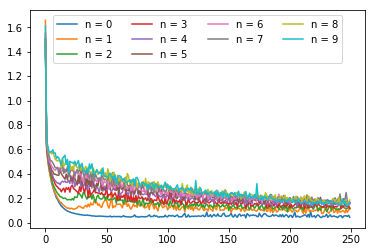

In [13]:
#Sigmoidal

valor_L1 = 0.0001
valor_L2 = 0.0001
n = 0

while n<10:
    
    SigModelReg = Sequential()
    SigModelReg.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1_l2(l1=valor_L1, l2=valor_L2)))
    SigModelReg.add(Activation('sigmoid'))
    SigModelReg.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l1_l2(l1=valor_L1, l2=valor_L2)))
    SigModelReg.add(Activation('linear'))
    SigModelReg.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])  
    SigHistoryReg = SigModelReg.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    pyplot.plot(SigHistoryReg.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Sig_Reg_%s.png')%hoje)
    
    valor_L1 = valor_L1 + 0.00025
    valor_L2 = valor_L2 + 0.00035
    n = n + 1

In [14]:
#Relu

valor_L1 = 0.0001
valor_L2 = 0.0001
n = 0

while n<10:
    
    ReluModelReg = Sequential()
    ReluModelReg.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1_l2(l1=valor_L1, l2=valor_L2)))
    ReluModelReg.add(Activation('sigmoid'))
    ReluModelReg.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l1_l2(l1=valor_L1, l2=valor_L2)))
    ReluModelReg.add(Activation('linear'))
    ReluModelReg.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])       
    ReluHistoryReg = ReluModelReg.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    
    pyplot.plot(ReluHistoryReg.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Error_Array_Relu_Reg_%s.png')%hoje)
    
    valor_L1 = valor_L1 + 0.00025
    valor_L2 = valor_L2 + 0.00035
    n = n+1

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 474us/step - loss: 2.3303 - mean_squared_error: 1.4880 - val_loss: 1.4146 - val_mean_squared_error: 0.5764
Epoch 2/250
9745/9745 [==============================] - 3s 314us/step - loss: 1.4527 - mean_squared_error: 0.6191 - val_loss: 1.2710 - val_mean_squared_error: 0.4420
Epoch 3/250
9745/9745 [==============================] - 3s 299us/step - loss: 1.3541 - mean_squared_error: 0.5297 - val_loss: 1.2576 - val_mean_squared_error: 0.4378
Epoch 4/250
9745/9745 [==============================] - 3s 282us/step - loss: 1.2630 - mean_squared_error: 0.4478 - val_loss: 1.1637 - val_mean_squared_error: 0.3531
Epoch 5/250
9745/9745 [==============================] - 3s 285us/step - loss: 1.1968 - mean_squared_error: 0.3908 - val_loss: 1.1143 - val_mean_squared_error: 0.3129
Epoch 6/250
9745/9745 [==============================] - 3s 284us/step - loss: 1.1410 - mean_squared_error: 0.3441 - 

Epoch 98/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.2286 - mean_squared_error: 0.0534 - val_loss: 0.2274 - val_mean_squared_error: 0.0540
Epoch 99/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.2208 - mean_squared_error: 0.0491 - val_loss: 0.2203 - val_mean_squared_error: 0.0505
Epoch 100/250
9745/9745 [==============================] - 2s 256us/step - loss: 0.2316 - mean_squared_error: 0.0634 - val_loss: 0.2208 - val_mean_squared_error: 0.0543
Epoch 101/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2131 - mean_squared_error: 0.0483 - val_loss: 0.2326 - val_mean_squared_error: 0.0693
Epoch 102/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.2061 - mean_squared_error: 0.0447 - val_loss: 0.2265 - val_mean_squared_error: 0.0667
Epoch 103/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.2037 - mean_squared_error: 0.0456 - val_loss: 0.2058 - val_mean_squared_er

9745/9745 [==============================] - 3s 264us/step - loss: 0.1116 - mean_squared_error: 0.0476 - val_loss: 0.1200 - val_mean_squared_error: 0.0564
Epoch 195/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.1087 - mean_squared_error: 0.0450 - val_loss: 0.1217 - val_mean_squared_error: 0.0582
Epoch 196/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.1270 - mean_squared_error: 0.0634 - val_loss: 0.1539 - val_mean_squared_error: 0.0902
Epoch 197/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.1204 - mean_squared_error: 0.0567 - val_loss: 0.1361 - val_mean_squared_error: 0.0727
Epoch 198/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.1218 - mean_squared_error: 0.0584 - val_loss: 0.1540 - val_mean_squared_error: 0.0906
Epoch 199/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.1161 - mean_squared_error: 0.0528 - val_loss: 0.1322 - val_mean_squared_error: 0.0690


9745/9745 [==============================] - 3s 263us/step - loss: 0.3547 - mean_squared_error: 0.1352 - val_loss: 0.4002 - val_mean_squared_error: 0.1848
Epoch 41/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.3625 - mean_squared_error: 0.1530 - val_loss: 0.3076 - val_mean_squared_error: 0.1044
Epoch 42/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.3280 - mean_squared_error: 0.1276 - val_loss: 0.3783 - val_mean_squared_error: 0.1799
Epoch 43/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.3658 - mean_squared_error: 0.1720 - val_loss: 0.3462 - val_mean_squared_error: 0.1547
Epoch 44/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.3271 - mean_squared_error: 0.1380 - val_loss: 0.3114 - val_mean_squared_error: 0.1264
Epoch 45/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.3514 - mean_squared_error: 0.1667 - val_loss: 0.3139 - val_mean_squared_error: 0.1306
Epoch

Epoch 89/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2973 - mean_squared_error: 0.1563 - val_loss: 0.2258 - val_mean_squared_error: 0.0835
Epoch 90/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.2767 - mean_squared_error: 0.1361 - val_loss: 0.2480 - val_mean_squared_error: 0.1075
Epoch 91/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.2710 - mean_squared_error: 0.1307 - val_loss: 0.2648 - val_mean_squared_error: 0.1233
Epoch 92/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2757 - mean_squared_error: 0.1362 - val_loss: 0.2467 - val_mean_squared_error: 0.1064
Epoch 93/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.2647 - mean_squared_error: 0.1249 - val_loss: 0.2119 - val_mean_squared_error: 0.0738
Epoch 94/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2603 - mean_squared_error: 0.1219 - val_loss: 0.3345 - val_mean_squared_error:

9745/9745 [==============================] - 3s 268us/step - loss: 0.2431 - mean_squared_error: 0.1244 - val_loss: 0.2321 - val_mean_squared_error: 0.1136
Epoch 186/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.1965 - mean_squared_error: 0.0783 - val_loss: 0.2048 - val_mean_squared_error: 0.0879
Epoch 187/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2166 - mean_squared_error: 0.0984 - val_loss: 0.4462 - val_mean_squared_error: 0.3264
Epoch 188/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.2246 - mean_squared_error: 0.1065 - val_loss: 0.1962 - val_mean_squared_error: 0.0791
Epoch 189/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.2351 - mean_squared_error: 0.1175 - val_loss: 0.2348 - val_mean_squared_error: 0.1178
Epoch 190/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.2141 - mean_squared_error: 0.0970 - val_loss: 0.1998 - val_mean_squared_error: 0.0835


9745/9745 [==============================] - 3s 264us/step - loss: 0.4555 - mean_squared_error: 0.2068 - val_loss: 0.3787 - val_mean_squared_error: 0.1361
Epoch 32/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.4641 - mean_squared_error: 0.2198 - val_loss: 0.4757 - val_mean_squared_error: 0.2313
Epoch 33/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.5122 - mean_squared_error: 0.2673 - val_loss: 0.4071 - val_mean_squared_error: 0.1663
Epoch 34/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.4613 - mean_squared_error: 0.2211 - val_loss: 0.3827 - val_mean_squared_error: 0.1452
Epoch 35/250
9745/9745 [==============================] - 3s 283us/step - loss: 0.4756 - mean_squared_error: 0.2368 - val_loss: 0.5460 - val_mean_squared_error: 0.2968
Epoch 36/250
9745/9745 [==============================] - 3s 294us/step - loss: 0.4628 - mean_squared_error: 0.2261 - val_loss: 0.4345 - val_mean_squared_error: 0.2044
Epoch

Epoch 80/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.3363 - mean_squared_error: 0.1476 - val_loss: 0.3003 - val_mean_squared_error: 0.1125
Epoch 81/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.3663 - mean_squared_error: 0.1792 - val_loss: 0.3664 - val_mean_squared_error: 0.1806
Epoch 82/250
9745/9745 [==============================] - 3s 263us/step - loss: 0.3537 - mean_squared_error: 0.1673 - val_loss: 0.3110 - val_mean_squared_error: 0.1276
Epoch 83/250
9745/9745 [==============================] - 3s 264us/step - loss: 0.3562 - mean_squared_error: 0.1708 - val_loss: 0.2782 - val_mean_squared_error: 0.0956
Epoch 84/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.3695 - mean_squared_error: 0.1840 - val_loss: 0.5983 - val_mean_squared_error: 0.4072
Epoch 85/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.3770 - mean_squared_error: 0.1919 - val_loss: 0.2782 - val_mean_squared_error:

9745/9745 [==============================] - 3s 264us/step - loss: 0.2847 - mean_squared_error: 0.1323 - val_loss: 0.2844 - val_mean_squared_error: 0.1310
Epoch 177/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2659 - mean_squared_error: 0.1142 - val_loss: 0.2355 - val_mean_squared_error: 0.0845
Epoch 178/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2678 - mean_squared_error: 0.1167 - val_loss: 0.2310 - val_mean_squared_error: 0.0820
Epoch 179/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2986 - mean_squared_error: 0.1467 - val_loss: 0.2895 - val_mean_squared_error: 0.1377
Epoch 180/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2756 - mean_squared_error: 0.1243 - val_loss: 0.3429 - val_mean_squared_error: 0.1901
Epoch 181/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.2909 - mean_squared_error: 0.1395 - val_loss: 0.2758 - val_mean_squared_error: 0.1275


9745/9745 [==============================] - 3s 268us/step - loss: 0.5941 - mean_squared_error: 0.2953 - val_loss: 0.4724 - val_mean_squared_error: 0.1756
Epoch 23/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.5635 - mean_squared_error: 0.2716 - val_loss: 0.7083 - val_mean_squared_error: 0.4091
Epoch 24/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.6027 - mean_squared_error: 0.3128 - val_loss: 1.1717 - val_mean_squared_error: 0.8695
Epoch 25/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.5316 - mean_squared_error: 0.2463 - val_loss: 0.4739 - val_mean_squared_error: 0.1932
Epoch 26/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5892 - mean_squared_error: 0.3079 - val_loss: 0.5528 - val_mean_squared_error: 0.2607
Epoch 27/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5966 - mean_squared_error: 0.3150 - val_loss: 0.4633 - val_mean_squared_error: 0.1785
Epoch

Epoch 71/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.4589 - mean_squared_error: 0.2293 - val_loss: 0.3899 - val_mean_squared_error: 0.1601
Epoch 72/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.4414 - mean_squared_error: 0.2120 - val_loss: 0.3493 - val_mean_squared_error: 0.1243
Epoch 73/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.4467 - mean_squared_error: 0.2177 - val_loss: 0.3278 - val_mean_squared_error: 0.1038
Epoch 74/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4411 - mean_squared_error: 0.2119 - val_loss: 0.4796 - val_mean_squared_error: 0.2497
Epoch 75/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4660 - mean_squared_error: 0.2376 - val_loss: 1.3594 - val_mean_squared_error: 1.1148
Epoch 76/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3917 - mean_squared_error: 0.1653 - val_loss: 0.4013 - val_mean_squared_error:

9745/9745 [==============================] - 3s 267us/step - loss: 0.3367 - mean_squared_error: 0.1529 - val_loss: 0.2772 - val_mean_squared_error: 0.0936
Epoch 168/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3719 - mean_squared_error: 0.1859 - val_loss: 0.2736 - val_mean_squared_error: 0.0863
Epoch 169/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.3627 - mean_squared_error: 0.1754 - val_loss: 0.3143 - val_mean_squared_error: 0.1300
Epoch 170/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3053 - mean_squared_error: 0.1210 - val_loss: 0.2712 - val_mean_squared_error: 0.0880
Epoch 171/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3313 - mean_squared_error: 0.1478 - val_loss: 0.3970 - val_mean_squared_error: 0.2144
Epoch 172/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3032 - mean_squared_error: 0.1218 - val_loss: 0.2916 - val_mean_squared_error: 0.1097


9745/9745 [==============================] - 3s 268us/step - loss: 0.8554 - mean_squared_error: 0.3441 - val_loss: 0.7302 - val_mean_squared_error: 0.2765
Epoch 14/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7721 - mean_squared_error: 0.3435 - val_loss: 0.6597 - val_mean_squared_error: 0.2580
Epoch 15/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.7169 - mean_squared_error: 0.3218 - val_loss: 0.8673 - val_mean_squared_error: 0.4905
Epoch 16/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.7341 - mean_squared_error: 0.3575 - val_loss: 0.6595 - val_mean_squared_error: 0.2931
Epoch 17/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.7068 - mean_squared_error: 0.3415 - val_loss: 0.6436 - val_mean_squared_error: 0.2805
Epoch 18/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7145 - mean_squared_error: 0.3559 - val_loss: 0.6834 - val_mean_squared_error: 0.3246
Epoch

Epoch 62/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.5215 - mean_squared_error: 0.2502 - val_loss: 0.7227 - val_mean_squared_error: 0.4409
Epoch 63/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.5170 - mean_squared_error: 0.2468 - val_loss: 0.5437 - val_mean_squared_error: 0.2768
Epoch 64/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.4776 - mean_squared_error: 0.2095 - val_loss: 0.3952 - val_mean_squared_error: 0.1341
Epoch 65/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.5216 - mean_squared_error: 0.2536 - val_loss: 0.6352 - val_mean_squared_error: 0.3636
Epoch 66/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5719 - mean_squared_error: 0.3008 - val_loss: 0.4219 - val_mean_squared_error: 0.1477
Epoch 67/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.4585 - mean_squared_error: 0.1905 - val_loss: 0.4273 - val_mean_squared_error:

Epoch 111/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4342 - mean_squared_error: 0.1898 - val_loss: 0.4818 - val_mean_squared_error: 0.2391
Epoch 112/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4632 - mean_squared_error: 0.2188 - val_loss: 0.3760 - val_mean_squared_error: 0.1274
Epoch 113/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4318 - mean_squared_error: 0.1853 - val_loss: 0.4463 - val_mean_squared_error: 0.2016
Epoch 114/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4805 - mean_squared_error: 0.2353 - val_loss: 0.5181 - val_mean_squared_error: 0.2724
Epoch 115/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4392 - mean_squared_error: 0.1952 - val_loss: 0.3702 - val_mean_squared_error: 0.1286
Epoch 116/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4199 - mean_squared_error: 0.1784 - val_loss: 0.4273 - val_mean_squared_

9745/9745 [==============================] - 3s 266us/step - loss: 0.3698 - mean_squared_error: 0.1658 - val_loss: 0.4240 - val_mean_squared_error: 0.2155
Epoch 208/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.3623 - mean_squared_error: 0.1586 - val_loss: 0.3299 - val_mean_squared_error: 0.1296
Epoch 209/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.3413 - mean_squared_error: 0.1392 - val_loss: 0.3525 - val_mean_squared_error: 0.1521
Epoch 210/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.3618 - mean_squared_error: 0.1599 - val_loss: 0.3116 - val_mean_squared_error: 0.1134
Epoch 211/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.3629 - mean_squared_error: 0.1601 - val_loss: 0.3125 - val_mean_squared_error: 0.1089
Epoch 212/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.3832 - mean_squared_error: 0.1779 - val_loss: 0.3007 - val_mean_squared_error: 0.0973


Epoch 54/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.6249 - mean_squared_error: 0.3193 - val_loss: 0.5429 - val_mean_squared_error: 0.2397
Epoch 55/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.5468 - mean_squared_error: 0.2464 - val_loss: 1.4216 - val_mean_squared_error: 1.1007
Epoch 56/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.5822 - mean_squared_error: 0.2814 - val_loss: 0.6892 - val_mean_squared_error: 0.3933
Epoch 57/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6048 - mean_squared_error: 0.3039 - val_loss: 0.5373 - val_mean_squared_error: 0.2479
Epoch 58/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.5933 - mean_squared_error: 0.2939 - val_loss: 0.4566 - val_mean_squared_error: 0.1534
Epoch 59/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5496 - mean_squared_error: 0.2515 - val_loss: 0.4649 - val_mean_squared_error:

Epoch 103/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4898 - mean_squared_error: 0.2129 - val_loss: 0.6036 - val_mean_squared_error: 0.3285
Epoch 104/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5044 - mean_squared_error: 0.2277 - val_loss: 0.6012 - val_mean_squared_error: 0.3284
Epoch 105/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4967 - mean_squared_error: 0.2212 - val_loss: 0.5884 - val_mean_squared_error: 0.3018
Epoch 106/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.5087 - mean_squared_error: 0.2329 - val_loss: 1.8487 - val_mean_squared_error: 1.5448
Epoch 107/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5043 - mean_squared_error: 0.2273 - val_loss: 0.4129 - val_mean_squared_error: 0.1397
Epoch 108/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5054 - mean_squared_error: 0.2290 - val_loss: 0.4538 - val_mean_squared_

9745/9745 [==============================] - 3s 268us/step - loss: 0.4385 - mean_squared_error: 0.1887 - val_loss: 0.4028 - val_mean_squared_error: 0.1526
Epoch 200/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4481 - mean_squared_error: 0.1981 - val_loss: 1.5696 - val_mean_squared_error: 1.3114
Epoch 201/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4334 - mean_squared_error: 0.1808 - val_loss: 0.4345 - val_mean_squared_error: 0.1847
Epoch 202/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4365 - mean_squared_error: 0.1871 - val_loss: 0.4408 - val_mean_squared_error: 0.1894
Epoch 203/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4541 - mean_squared_error: 0.1977 - val_loss: 0.4217 - val_mean_squared_error: 0.1737
Epoch 204/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4155 - mean_squared_error: 0.1663 - val_loss: 0.4285 - val_mean_squared_error: 0.1773


9745/9745 [==============================] - 3s 270us/step - loss: 0.6481 - mean_squared_error: 0.3028 - val_loss: 0.6490 - val_mean_squared_error: 0.3165
Epoch 46/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.6705 - mean_squared_error: 0.3284 - val_loss: 0.5677 - val_mean_squared_error: 0.1991
Epoch 47/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.7350 - mean_squared_error: 0.3903 - val_loss: 0.6065 - val_mean_squared_error: 0.2481
Epoch 48/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.6306 - mean_squared_error: 0.2891 - val_loss: 0.7270 - val_mean_squared_error: 0.3857
Epoch 49/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.6820 - mean_squared_error: 0.3434 - val_loss: 0.5184 - val_mean_squared_error: 0.1769
Epoch 50/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.6830 - mean_squared_error: 0.3402 - val_loss: 1.2207 - val_mean_squared_error: 0.8572
Epoch

Epoch 94/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5808 - mean_squared_error: 0.2625 - val_loss: 0.5665 - val_mean_squared_error: 0.2536
Epoch 95/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5782 - mean_squared_error: 0.2591 - val_loss: 1.0274 - val_mean_squared_error: 0.7088
Epoch 96/250
9745/9745 [==============================] - 3s 266us/step - loss: 0.5802 - mean_squared_error: 0.2624 - val_loss: 0.4934 - val_mean_squared_error: 0.1837
Epoch 97/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.5964 - mean_squared_error: 0.2765 - val_loss: 0.4637 - val_mean_squared_error: 0.1514
Epoch 98/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5872 - mean_squared_error: 0.2693 - val_loss: 0.5547 - val_mean_squared_error: 0.2421
Epoch 99/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5889 - mean_squared_error: 0.2727 - val_loss: 0.5127 - val_mean_squared_error:

9745/9745 [==============================] - 3s 270us/step - loss: 0.5152 - mean_squared_error: 0.2297 - val_loss: 0.4188 - val_mean_squared_error: 0.1320
Epoch 191/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5063 - mean_squared_error: 0.2188 - val_loss: 0.4494 - val_mean_squared_error: 0.1580
Epoch 192/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.5062 - mean_squared_error: 0.2173 - val_loss: 0.4301 - val_mean_squared_error: 0.1431
Epoch 193/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.4782 - mean_squared_error: 0.1931 - val_loss: 0.4639 - val_mean_squared_error: 0.1804
Epoch 194/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.4949 - mean_squared_error: 0.2107 - val_loss: 0.4639 - val_mean_squared_error: 0.1838
Epoch 195/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4580 - mean_squared_error: 0.1753 - val_loss: 0.4213 - val_mean_squared_error: 0.1430


9745/9745 [==============================] - 3s 272us/step - loss: 0.7920 - mean_squared_error: 0.4214 - val_loss: 0.9301 - val_mean_squared_error: 0.5364
Epoch 37/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7624 - mean_squared_error: 0.3890 - val_loss: 0.6539 - val_mean_squared_error: 0.2768
Epoch 38/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7443 - mean_squared_error: 0.3754 - val_loss: 0.8240 - val_mean_squared_error: 0.4397
Epoch 39/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.8004 - mean_squared_error: 0.4276 - val_loss: 0.7625 - val_mean_squared_error: 0.3855
Epoch 40/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.7708 - mean_squared_error: 0.4012 - val_loss: 0.8449 - val_mean_squared_error: 0.4627
Epoch 41/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.7423 - mean_squared_error: 0.3729 - val_loss: 2.1283 - val_mean_squared_error: 1.7468
Epoch

Epoch 85/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.6075 - mean_squared_error: 0.2763 - val_loss: 0.5124 - val_mean_squared_error: 0.1865
Epoch 86/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.6331 - mean_squared_error: 0.3024 - val_loss: 1.0617 - val_mean_squared_error: 0.7221
Epoch 87/250
9745/9745 [==============================] - 3s 273us/step - loss: 0.6431 - mean_squared_error: 0.3108 - val_loss: 1.0471 - val_mean_squared_error: 0.7130
Epoch 88/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6345 - mean_squared_error: 0.3040 - val_loss: 0.4979 - val_mean_squared_error: 0.1648
Epoch 89/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.6174 - mean_squared_error: 0.2860 - val_loss: 0.5033 - val_mean_squared_error: 0.1750
Epoch 90/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.6054 - mean_squared_error: 0.2764 - val_loss: 0.8179 - val_mean_squared_error:

9745/9745 [==============================] - 3s 267us/step - loss: 0.4956 - mean_squared_error: 0.2070 - val_loss: 0.4537 - val_mean_squared_error: 0.1721
Epoch 182/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4898 - mean_squared_error: 0.2045 - val_loss: 0.4360 - val_mean_squared_error: 0.1534
Epoch 183/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4815 - mean_squared_error: 0.1941 - val_loss: 0.4479 - val_mean_squared_error: 0.1651
Epoch 184/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4732 - mean_squared_error: 0.1891 - val_loss: 0.4205 - val_mean_squared_error: 0.1390
Epoch 185/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4703 - mean_squared_error: 0.1864 - val_loss: 0.4301 - val_mean_squared_error: 0.1514
Epoch 186/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4624 - mean_squared_error: 0.1782 - val_loss: 0.4253 - val_mean_squared_error: 0.1413


9745/9745 [==============================] - 3s 271us/step - loss: 0.8593 - mean_squared_error: 0.4549 - val_loss: 0.9232 - val_mean_squared_error: 0.5174
Epoch 28/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.8279 - mean_squared_error: 0.4291 - val_loss: 0.8499 - val_mean_squared_error: 0.4600
Epoch 29/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.9377 - mean_squared_error: 0.5191 - val_loss: 0.8643 - val_mean_squared_error: 0.4490
Epoch 30/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.8032 - mean_squared_error: 0.3994 - val_loss: 0.9130 - val_mean_squared_error: 0.5039
Epoch 31/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.9117 - mean_squared_error: 0.5094 - val_loss: 1.9341 - val_mean_squared_error: 1.5076
Epoch 32/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.8359 - mean_squared_error: 0.4372 - val_loss: 0.7054 - val_mean_squared_error: 0.3097
Epoch

Epoch 76/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.6678 - mean_squared_error: 0.3135 - val_loss: 0.8367 - val_mean_squared_error: 0.4746
Epoch 77/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.6812 - mean_squared_error: 0.3263 - val_loss: 0.6255 - val_mean_squared_error: 0.2730
Epoch 78/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.7059 - mean_squared_error: 0.3490 - val_loss: 0.5492 - val_mean_squared_error: 0.2002
Epoch 79/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.7069 - mean_squared_error: 0.3499 - val_loss: 0.5546 - val_mean_squared_error: 0.1988
Epoch 80/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6683 - mean_squared_error: 0.3143 - val_loss: 0.6655 - val_mean_squared_error: 0.3081
Epoch 81/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6488 - mean_squared_error: 0.2960 - val_loss: 0.6038 - val_mean_squared_error:

9745/9745 [==============================] - 3s 268us/step - loss: 0.5584 - mean_squared_error: 0.2417 - val_loss: 0.4767 - val_mean_squared_error: 0.1649
Epoch 173/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5304 - mean_squared_error: 0.2185 - val_loss: 0.4789 - val_mean_squared_error: 0.1681
Epoch 174/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.5680 - mean_squared_error: 0.2524 - val_loss: 0.6337 - val_mean_squared_error: 0.3210
Epoch 175/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5544 - mean_squared_error: 0.2403 - val_loss: 1.7016 - val_mean_squared_error: 1.3763
Epoch 176/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5403 - mean_squared_error: 0.2272 - val_loss: 0.5227 - val_mean_squared_error: 0.2125
Epoch 177/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5684 - mean_squared_error: 0.2560 - val_loss: 0.5334 - val_mean_squared_error: 0.2216


9745/9745 [==============================] - 3s 269us/step - loss: 0.9152 - mean_squared_error: 0.5009 - val_loss: 0.9001 - val_mean_squared_error: 0.4995
Epoch 19/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.9162 - mean_squared_error: 0.5029 - val_loss: 0.7386 - val_mean_squared_error: 0.3330
Epoch 20/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.9010 - mean_squared_error: 0.4911 - val_loss: 0.6778 - val_mean_squared_error: 0.2873
Epoch 21/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.8966 - mean_squared_error: 0.4878 - val_loss: 0.6887 - val_mean_squared_error: 0.2925
Epoch 22/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.8912 - mean_squared_error: 0.4839 - val_loss: 0.6822 - val_mean_squared_error: 0.2845
Epoch 23/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.9154 - mean_squared_error: 0.5074 - val_loss: 1.0819 - val_mean_squared_error: 0.6482
Epoch

Epoch 67/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7028 - mean_squared_error: 0.3242 - val_loss: 0.6087 - val_mean_squared_error: 0.2332
Epoch 68/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7907 - mean_squared_error: 0.4081 - val_loss: 0.5782 - val_mean_squared_error: 0.2065
Epoch 69/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.7234 - mean_squared_error: 0.3419 - val_loss: 0.5707 - val_mean_squared_error: 0.1896
Epoch 70/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.7717 - mean_squared_error: 0.3915 - val_loss: 0.7354 - val_mean_squared_error: 0.3647
Epoch 71/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.7317 - mean_squared_error: 0.3523 - val_loss: 0.5717 - val_mean_squared_error: 0.1927
Epoch 72/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.7243 - mean_squared_error: 0.3446 - val_loss: 0.5757 - val_mean_squared_error:

Epoch 116/250
9745/9745 [==============================] - 3s 271us/step - loss: 0.6457 - mean_squared_error: 0.3001 - val_loss: 0.6208 - val_mean_squared_error: 0.2665
Epoch 117/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6509 - mean_squared_error: 0.3035 - val_loss: 0.5131 - val_mean_squared_error: 0.1805
Epoch 118/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.6061 - mean_squared_error: 0.2656 - val_loss: 0.6118 - val_mean_squared_error: 0.2695
Epoch 119/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6316 - mean_squared_error: 0.2884 - val_loss: 0.5613 - val_mean_squared_error: 0.2225
Epoch 120/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.6586 - mean_squared_error: 0.3118 - val_loss: 0.5839 - val_mean_squared_error: 0.2372
Epoch 121/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.6055 - mean_squared_error: 0.2647 - val_loss: 0.5865 - val_mean_squared_

9745/9745 [==============================] - 3s 268us/step - loss: 0.4774 - mean_squared_error: 0.1885 - val_loss: 0.5588 - val_mean_squared_error: 0.2589
Epoch 213/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.4623 - mean_squared_error: 0.1728 - val_loss: 0.4132 - val_mean_squared_error: 0.1189
Epoch 214/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4745 - mean_squared_error: 0.1843 - val_loss: 0.4875 - val_mean_squared_error: 0.2009
Epoch 215/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4727 - mean_squared_error: 0.1833 - val_loss: 0.4539 - val_mean_squared_error: 0.1625
Epoch 216/250
9745/9745 [==============================] - 3s 269us/step - loss: 0.4826 - mean_squared_error: 0.1917 - val_loss: 0.5071 - val_mean_squared_error: 0.2129
Epoch 217/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.4642 - mean_squared_error: 0.1755 - val_loss: 0.5618 - val_mean_squared_error: 0.2657


In [15]:
valorDrop = 0.2
n = 0

#sigma

while n<10:
    
    SigModelDrop = Sequential()
    SigModelDrop.add(Dense(256,input_dim=idim,kernel_initializer='uniform'))
    SigModelDrop.add(Activation('sigmoid'))
    SigModelDrop.add(Dropout(valorDrop))
    SigModelDrop.add(Dense(1, kernel_initializer='uniform'))
    SigModelDrop.add(Activation('linear'))
    SigModelDrop.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])
    SigHistoryDrop = SigModelDrop.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    
    pyplot.plot(SigHistoryDrop.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Sig_History_Drop_EX1_%s.png')%hoje)

    valorDrop = valorDrop + 0.5
    n = n + 1

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 387us/step - loss: 1.6530 - mean_squared_error: 1.6530 - val_loss: 0.5639 - val_mean_squared_error: 0.5639
Epoch 2/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.8363 - mean_squared_error: 0.8363 - val_loss: 0.4795 - val_mean_squared_error: 0.4795
Epoch 3/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.7404 - mean_squared_error: 0.7404 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 4/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.6866 - mean_squared_error: 0.6866 - val_loss: 0.4852 - val_mean_squared_error: 0.4852
Epoch 5/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.6514 - mean_squared_error: 0.6514 - val_loss: 0.3907 - val_mean_squared_error: 0.3907
Epoch 6/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.6266 - mean_squared_error: 0.6266 - 

Epoch 98/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.3015 - mean_squared_error: 0.3015 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 99/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.3013 - mean_squared_error: 0.3013 - val_loss: 0.1846 - val_mean_squared_error: 0.1846
Epoch 100/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.2976 - mean_squared_error: 0.2976 - val_loss: 0.1624 - val_mean_squared_error: 0.1624
Epoch 101/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.3030 - mean_squared_error: 0.3030 - val_loss: 0.1792 - val_mean_squared_error: 0.1792
Epoch 102/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.3059 - mean_squared_error: 0.3059 - val_loss: 0.3115 - val_mean_squared_error: 0.3115
Epoch 103/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.3010 - mean_squared_error: 0.3010 - val_loss: 0.1658 - val_mean_squared_er

9745/9745 [==============================] - 2s 191us/step - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.1653 - val_mean_squared_error: 0.1653
Epoch 195/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.2633 - mean_squared_error: 0.2633 - val_loss: 0.1475 - val_mean_squared_error: 0.1475
Epoch 196/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 197/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.2579 - mean_squared_error: 0.2579 - val_loss: 0.1753 - val_mean_squared_error: 0.1753
Epoch 198/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.2610 - mean_squared_error: 0.2610 - val_loss: 0.1714 - val_mean_squared_error: 0.1714
Epoch 199/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.2641 - mean_squared_error: 0.2641 - val_loss: 0.1689 - val_mean_squared_error: 0.1689


9745/9745 [==============================] - 2s 192us/step - loss: 1.0875 - mean_squared_error: 1.0875 - val_loss: 0.4305 - val_mean_squared_error: 0.4305
Epoch 41/250
9745/9745 [==============================] - 2s 190us/step - loss: 1.1121 - mean_squared_error: 1.1121 - val_loss: 1.0409 - val_mean_squared_error: 1.0409
Epoch 42/250
9745/9745 [==============================] - 2s 193us/step - loss: 1.0909 - mean_squared_error: 1.0909 - val_loss: 0.4245 - val_mean_squared_error: 0.4245
Epoch 43/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.0735 - mean_squared_error: 1.0735 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 44/250
9745/9745 [==============================] - 2s 189us/step - loss: 1.0557 - mean_squared_error: 1.0557 - val_loss: 0.5836 - val_mean_squared_error: 0.5836
Epoch 45/250
9745/9745 [==============================] - 2s 193us/step - loss: 1.0983 - mean_squared_error: 1.0983 - val_loss: 0.4997 - val_mean_squared_error: 0.4997
Epoch

Epoch 89/250
9745/9745 [==============================] - 2s 190us/step - loss: 1.0087 - mean_squared_error: 1.0087 - val_loss: 0.4972 - val_mean_squared_error: 0.4972
Epoch 90/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.9956 - mean_squared_error: 0.9956 - val_loss: 0.3968 - val_mean_squared_error: 0.3968
Epoch 91/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.0343 - mean_squared_error: 1.0343 - val_loss: 0.3935 - val_mean_squared_error: 0.3935
Epoch 92/250
9745/9745 [==============================] - 2s 193us/step - loss: 1.0151 - mean_squared_error: 1.0151 - val_loss: 0.3983 - val_mean_squared_error: 0.3983
Epoch 93/250
9745/9745 [==============================] - 2s 190us/step - loss: 1.0295 - mean_squared_error: 1.0295 - val_loss: 0.4756 - val_mean_squared_error: 0.4756
Epoch 94/250
9745/9745 [==============================] - 2s 189us/step - loss: 1.0345 - mean_squared_error: 1.0345 - val_loss: 0.4423 - val_mean_squared_error:

9745/9745 [==============================] - 2s 218us/step - loss: 0.9829 - mean_squared_error: 0.9829 - val_loss: 0.4190 - val_mean_squared_error: 0.4190
Epoch 186/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.9539 - mean_squared_error: 0.9539 - val_loss: 0.3353 - val_mean_squared_error: 0.3353
Epoch 187/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.9403 - mean_squared_error: 0.9403 - val_loss: 0.3499 - val_mean_squared_error: 0.3499
Epoch 188/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.9457 - mean_squared_error: 0.9457 - val_loss: 0.8240 - val_mean_squared_error: 0.8240
Epoch 189/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.9508 - mean_squared_error: 0.9508 - val_loss: 0.4307 - val_mean_squared_error: 0.4307
Epoch 190/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.9519 - mean_squared_error: 0.9519 - val_loss: 0.5396 - val_mean_squared_error: 0.5396


9745/9745 [==============================] - 2s 178us/step - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0671 - val_mean_squared_error: 0.0671
Epoch 32/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 33/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 34/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0695 - val_mean_squared_error: 0.0695
Epoch 35/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 36/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch

Epoch 80/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 81/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 82/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 83/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 84/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 85/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0449 - val_mean_squared_error:

9745/9745 [==============================] - 2s 177us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 177/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 178/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 179/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 180/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 181/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0399 - val_mean_squared_error: 0.0399


9745/9745 [==============================] - 2s 177us/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0995 - val_mean_squared_error: 0.0995
Epoch 23/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0912 - val_mean_squared_error: 0.0912
Epoch 24/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 25/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 26/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0677 - mean_squared_error: 0.0677 - val_loss: 0.0921 - val_mean_squared_error: 0.0921
Epoch 27/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch

Epoch 71/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch 72/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 73/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 74/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 75/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 76/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0447 - val_mean_squared_error:

9745/9745 [==============================] - 2s 178us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 168/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0342 - val_mean_squared_error: 0.0342
Epoch 169/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 170/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 171/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 172/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0377 - val_mean_squared_error: 0.0377


9745/9745 [==============================] - 2s 176us/step - loss: 0.1352 - mean_squared_error: 0.1352 - val_loss: 0.2076 - val_mean_squared_error: 0.2076
Epoch 14/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1229 - mean_squared_error: 0.1229 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 15/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.1128 - mean_squared_error: 0.1128 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 16/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1047 - mean_squared_error: 0.1047 - val_loss: 0.1306 - val_mean_squared_error: 0.1306
Epoch 17/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.1026 - val_mean_squared_error: 0.1026
Epoch 18/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch

Epoch 62/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 63/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 64/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 65/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 66/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 67/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0527 - val_mean_squared_error:

Epoch 111/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 112/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 113/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 114/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 115/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 116/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0412 - val_mean_squared_

9745/9745 [==============================] - 2s 177us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 208/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 209/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 210/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 211/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 212/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0387 - val_mean_squared_error: 0.0387


Epoch 54/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 55/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 56/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 57/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch 58/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 59/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0523 - val_mean_squared_error:

Epoch 103/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 104/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 105/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 106/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 107/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 108/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0447 - val_mean_squared_

9745/9745 [==============================] - 2s 181us/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 200/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 201/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 202/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 203/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 204/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0375 - val_mean_squared_error: 0.0375


9745/9745 [==============================] - 2s 181us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0691 - val_mean_squared_error: 0.0691
Epoch 46/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 47/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 48/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0584 - val_mean_squared_error: 0.0584
Epoch 49/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1013 - val_mean_squared_error: 0.1013
Epoch 50/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch

Epoch 94/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 95/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 96/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 97/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 98/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 99/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0417 - val_mean_squared_error:

9745/9745 [==============================] - 2s 177us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 191/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 192/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 193/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 194/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 195/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0383 - val_mean_squared_error: 0.0383


9745/9745 [==============================] - 2s 185us/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 37/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 38/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 39/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 40/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0450 - mean_squared_error: 0.0450 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 41/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0589 - val_mean_squared_error: 0.0589
Epoch

Epoch 85/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 86/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 87/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 88/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 89/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 90/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0448 - val_mean_squared_error:

9745/9745 [==============================] - 2s 180us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 182/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 183/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 184/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 185/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 186/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0437 - val_mean_squared_error: 0.0437


9745/9745 [==============================] - 2s 184us/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 28/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 29/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0727 - val_mean_squared_error: 0.0727
Epoch 30/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0744 - val_mean_squared_error: 0.0744
Epoch 31/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 32/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch

Epoch 76/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 77/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0820 - val_mean_squared_error: 0.0820
Epoch 78/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 79/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 80/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 81/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.1051 - val_mean_squared_error:

9745/9745 [==============================] - 2s 179us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 173/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 174/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 175/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 176/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 177/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0431 - val_mean_squared_error: 0.0431


9745/9745 [==============================] - 2s 183us/step - loss: 0.1010 - mean_squared_error: 0.1010 - val_loss: 0.1080 - val_mean_squared_error: 0.1080
Epoch 19/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 20/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 21/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.2092 - val_mean_squared_error: 0.2092
Epoch 22/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0901 - val_mean_squared_error: 0.0901
Epoch 23/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.1294 - val_mean_squared_error: 0.1294
Epoch

Epoch 67/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 68/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 69/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 70/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0663 - val_mean_squared_error: 0.0663
Epoch 71/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 72/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0645 - val_mean_squared_error:

Epoch 116/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 117/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 118/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 119/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 120/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 121/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0414 - val_mean_squared_

9745/9745 [==============================] - 2s 176us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 213/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 214/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 215/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 216/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 217/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0545 - val_mean_squared_error: 0.0545


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 400us/step - loss: 1.5504 - mean_squared_error: 1.5504 - val_loss: 0.9671 - val_mean_squared_error: 0.9671
Epoch 2/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.8293 - mean_squared_error: 0.8293 - val_loss: 0.5104 - val_mean_squared_error: 0.5104
Epoch 3/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.7382 - mean_squared_error: 0.7382 - val_loss: 0.4277 - val_mean_squared_error: 0.4277
Epoch 4/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.6938 - mean_squared_error: 0.6938 - val_loss: 0.3873 - val_mean_squared_error: 0.3873
Epoch 5/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.6697 - mean_squared_error: 0.6697 - val_loss: 0.4024 - val_mean_squared_error: 0.4024
Epoch 6/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.6164 - mean_squared_error: 0.6164 - 

Epoch 98/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.2967 - mean_squared_error: 0.2967 - val_loss: 0.1875 - val_mean_squared_error: 0.1875
Epoch 99/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.3012 - mean_squared_error: 0.3012 - val_loss: 0.1658 - val_mean_squared_error: 0.1658
Epoch 100/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.3007 - mean_squared_error: 0.3007 - val_loss: 0.1883 - val_mean_squared_error: 0.1883
Epoch 101/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.3004 - mean_squared_error: 0.3004 - val_loss: 0.1680 - val_mean_squared_error: 0.1680
Epoch 102/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.3015 - mean_squared_error: 0.3015 - val_loss: 0.1633 - val_mean_squared_error: 0.1633
Epoch 103/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.2982 - mean_squared_error: 0.2982 - val_loss: 0.1743 - val_mean_squared_er

9745/9745 [==============================] - 2s 193us/step - loss: 0.2555 - mean_squared_error: 0.2555 - val_loss: 0.2176 - val_mean_squared_error: 0.2176
Epoch 195/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.2566 - mean_squared_error: 0.2566 - val_loss: 0.1429 - val_mean_squared_error: 0.1429
Epoch 196/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.2578 - mean_squared_error: 0.2578 - val_loss: 0.1886 - val_mean_squared_error: 0.1886
Epoch 197/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.1396 - val_mean_squared_error: 0.1396
Epoch 198/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.2496 - mean_squared_error: 0.2496 - val_loss: 0.1913 - val_mean_squared_error: 0.1913
Epoch 199/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.2649 - mean_squared_error: 0.2649 - val_loss: 0.1439 - val_mean_squared_error: 0.1439


9745/9745 [==============================] - 2s 197us/step - loss: 1.0759 - mean_squared_error: 1.0759 - val_loss: 0.6659 - val_mean_squared_error: 0.6659
Epoch 41/250
9745/9745 [==============================] - 2s 194us/step - loss: 1.0894 - mean_squared_error: 1.0894 - val_loss: 0.4943 - val_mean_squared_error: 0.4943
Epoch 42/250
9745/9745 [==============================] - 2s 198us/step - loss: 1.0799 - mean_squared_error: 1.0799 - val_loss: 0.5424 - val_mean_squared_error: 0.5424
Epoch 43/250
9745/9745 [==============================] - 2s 197us/step - loss: 1.1168 - mean_squared_error: 1.1168 - val_loss: 0.8318 - val_mean_squared_error: 0.8318
Epoch 44/250
9745/9745 [==============================] - 2s 199us/step - loss: 1.0554 - mean_squared_error: 1.0554 - val_loss: 0.4056 - val_mean_squared_error: 0.4056
Epoch 45/250
9745/9745 [==============================] - 2s 191us/step - loss: 1.0827 - mean_squared_error: 1.0827 - val_loss: 0.4109 - val_mean_squared_error: 0.4109
Epoch

Epoch 89/250
9745/9745 [==============================] - 2s 192us/step - loss: 1.0126 - mean_squared_error: 1.0126 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
Epoch 90/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.0081 - mean_squared_error: 1.0081 - val_loss: 0.5247 - val_mean_squared_error: 0.5247
Epoch 91/250
9745/9745 [==============================] - 2s 193us/step - loss: 1.0210 - mean_squared_error: 1.0210 - val_loss: 0.3596 - val_mean_squared_error: 0.3596
Epoch 92/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.0125 - mean_squared_error: 1.0125 - val_loss: 0.3594 - val_mean_squared_error: 0.3594
Epoch 93/250
9745/9745 [==============================] - 2s 195us/step - loss: 1.0415 - mean_squared_error: 1.0415 - val_loss: 0.9053 - val_mean_squared_error: 0.9053
Epoch 94/250
9745/9745 [==============================] - 2s 200us/step - loss: 1.0143 - mean_squared_error: 1.0143 - val_loss: 0.3985 - val_mean_squared_error:

9745/9745 [==============================] - 2s 192us/step - loss: 0.9701 - mean_squared_error: 0.9701 - val_loss: 0.3329 - val_mean_squared_error: 0.3329
Epoch 186/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.9563 - mean_squared_error: 0.9563 - val_loss: 0.3209 - val_mean_squared_error: 0.3209
Epoch 187/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.9482 - mean_squared_error: 0.9482 - val_loss: 0.3657 - val_mean_squared_error: 0.3657
Epoch 188/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.9572 - mean_squared_error: 0.9572 - val_loss: 0.3658 - val_mean_squared_error: 0.3658
Epoch 189/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.9496 - mean_squared_error: 0.9496 - val_loss: 0.3571 - val_mean_squared_error: 0.3571
Epoch 190/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.9656 - mean_squared_error: 0.9656 - val_loss: 0.9830 - val_mean_squared_error: 0.9830


9745/9745 [==============================] - 2s 187us/step - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 32/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0690 - val_mean_squared_error: 0.0690
Epoch 33/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 34/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0532 - mean_squared_error: 0.0532 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 35/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0692 - val_mean_squared_error: 0.0692
Epoch 36/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch

Epoch 80/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 81/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 82/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 83/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 84/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 85/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0539 - val_mean_squared_error:

9745/9745 [==============================] - 2s 182us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 177/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 178/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 179/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 180/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 181/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0501 - val_mean_squared_error: 0.0501


9745/9745 [==============================] - 2s 186us/step - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0889 - val_mean_squared_error: 0.0889
Epoch 23/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 24/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch 25/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 26/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 27/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch

Epoch 71/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 72/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 73/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 74/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 75/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 76/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0510 - val_mean_squared_error:

9745/9745 [==============================] - 2s 181us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 168/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 169/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 170/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 171/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 172/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0373 - val_mean_squared_error: 0.0373


9745/9745 [==============================] - 2s 189us/step - loss: 0.1416 - mean_squared_error: 0.1416 - val_loss: 0.1513 - val_mean_squared_error: 0.1513
Epoch 14/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.1244 - mean_squared_error: 0.1244 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 15/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 0.1655 - val_mean_squared_error: 0.1655
Epoch 16/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 17/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 18/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch

Epoch 62/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 63/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.1016 - val_mean_squared_error: 0.1016
Epoch 64/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 65/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 66/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 67/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0468 - val_mean_squared_error:

Epoch 111/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 112/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 113/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 114/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 115/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 116/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0480 - val_mean_squared_

9745/9745 [==============================] - 2s 187us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 208/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 209/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 210/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 211/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 212/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0362 - val_mean_squared_error: 0.0362


Epoch 54/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 55/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 56/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0517 - val_mean_squared_error: 0.0517
Epoch 57/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 58/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 59/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0686 - val_mean_squared_error:

Epoch 103/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 104/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 105/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 106/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 107/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 108/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0436 - val_mean_squared_

9745/9745 [==============================] - 2s 191us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 200/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 201/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 202/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 203/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 204/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0520 - val_mean_squared_error: 0.0520


9745/9745 [==============================] - 2s 182us/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 46/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 47/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0640 - val_mean_squared_error: 0.0640
Epoch 48/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 49/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 50/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0660 - val_mean_squared_error: 0.0660
Epoch

Epoch 94/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 95/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 96/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch 97/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 98/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0442 - val_mean_squared_error: 0.0442
Epoch 99/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0483 - val_mean_squared_error:

9745/9745 [==============================] - 2s 187us/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 191/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 192/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0633 - val_mean_squared_error: 0.0633
Epoch 193/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 194/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 195/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0509 - val_mean_squared_error: 0.0509


9745/9745 [==============================] - 2s 190us/step - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 37/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0504 - mean_squared_error: 0.0504 - val_loss: 0.0594 - val_mean_squared_error: 0.0594
Epoch 38/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_loss: 0.0835 - val_mean_squared_error: 0.0835
Epoch 39/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 40/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 41/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch

Epoch 85/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 86/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 87/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 88/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 89/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 90/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0632 - val_mean_squared_error:

9745/9745 [==============================] - 2s 189us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 182/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 183/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 184/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0449 - val_mean_squared_error: 0.0449
Epoch 185/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 186/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0431 - val_mean_squared_error: 0.0431


9745/9745 [==============================] - 2s 201us/step - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0831 - val_mean_squared_error: 0.0831
Epoch 28/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0923 - val_mean_squared_error: 0.0923
Epoch 29/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.0640 - mean_squared_error: 0.0640 - val_loss: 0.0782 - val_mean_squared_error: 0.0782
Epoch 30/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 31/250
9745/9745 [==============================] - 2s 195us/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0915 - val_mean_squared_error: 0.0915
Epoch 32/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.0817 - val_mean_squared_error: 0.0817
Epoch

Epoch 76/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 77/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 78/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 79/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 80/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 81/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0542 - val_mean_squared_error:

9745/9745 [==============================] - 2s 188us/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0385 - val_mean_squared_error: 0.0385
Epoch 173/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 174/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 175/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 176/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0474 - val_mean_squared_error: 0.0474
Epoch 177/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


9745/9745 [==============================] - 2s 188us/step - loss: 0.1017 - mean_squared_error: 0.1017 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 19/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 20/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1239 - val_mean_squared_error: 0.1239
Epoch 21/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.0941 - val_mean_squared_error: 0.0941
Epoch 22/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0806 - mean_squared_error: 0.0806 - val_loss: 0.0940 - val_mean_squared_error: 0.0940
Epoch 23/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0777 - mean_squared_error: 0.0777 - val_loss: 0.0838 - val_mean_squared_error: 0.0838
Epoch

Epoch 67/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 68/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 69/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 70/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 71/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 72/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0468 - val_mean_squared_error:

Epoch 116/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 117/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 118/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 119/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 120/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 121/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0495 - val_mean_squared_

9745/9745 [==============================] - 2s 189us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 213/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 214/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 215/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 216/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 217/250
9745/9745 [==============================] - 2s 190us/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0568 - val_mean_squared_error: 0.0568


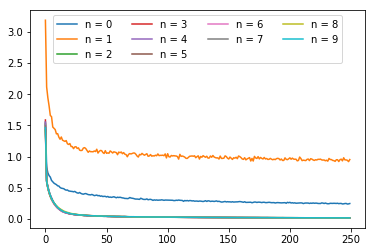

In [16]:
valorDrop = 0.2
n = 0

#Relu 

while n<10:
    
    ReluModelDrop = Sequential()
    ReluModelDrop.add(Dense(256,input_dim=idim,kernel_initializer='uniform'))
    ReluModelDrop.add(Activation('sigmoid'))
    ReluModelDrop.add(Dropout(valorDrop))
    ReluModelDrop.add(Dense(1, kernel_initializer='uniform'))
    ReluModelDrop.add(Activation('linear'))
    ReluModelDrop.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['mse'])

    ReluHistoryDrop = ReluModelDrop.fit(X_train_scaled, y_train, epochs=epo, verbose=1, validation_data=(X_val_scaled, y_val))
    
    pyplot.plot(ReluHistoryDrop.history['mean_squared_error'], label="n = %d"%n)
    leg = pyplot.legend()
    pyplot.legend(frameon=True, loc='upper center', ncol=4)
    pyplot.savefig(os.path.join(my_path, 'Relu_History_Drop_EX1_%s.png')%hoje)


    valorDrop = valorDrop + 0.5
    n = n+1

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`


Epoch 1/68
7796/7796 [==============================] - 3s 327us/step - loss: 445.7520 - mean_squared_error: 93.5281
Epoch 2/68
7796/7796 [==============================] - 0s 54us/step - loss: 434.4313 - mean_squared_error: 82.5409
Epoch 3/68
7796/7796 [==============================] - 0s 54us/step - loss: 430.8671 - mean_squared_error: 79.0993
Epoch 4/68
7796/7796 [==============================] - 0s 53us/step - loss: 428.5809 - mean_squared_error: 76.8925
Epoch 5/68
7796/7796 [==============================] - 0s 53us/step - loss: 426.8954 - mean_squared_error: 75.2659
Epoch 6/68
7796/7796 [==============================] - 0s 54us/step - loss: 425.6790 - mean_squared_error: 74.0963
Epoch 7/68
7796/7796 [==============================] - 0s 56us/step - loss: 424.6780 - mean_squared_error: 73.1343
Epoch 8/68
7796/7796 [==============================] - 0s 54us/step - loss: 423.6189 - mean_squared_error: 72.1086
Epoch 9/68
7796/7796 [==============================] - 0s 52us/step - 

7796/7796 [==============================] - 1s 65us/step - loss: 363.8762 - mean_squared_error: 55.1437
Epoch 73/96
7796/7796 [==============================] - 0s 62us/step - loss: 363.9065 - mean_squared_error: 55.1768
Epoch 74/96
7796/7796 [==============================] - 1s 64us/step - loss: 363.6395 - mean_squared_error: 54.9126
Epoch 75/96
7796/7796 [==============================] - 0s 64us/step - loss: 363.6011 - mean_squared_error: 54.8768
Epoch 76/96
7796/7796 [==============================] - 0s 63us/step - loss: 363.6042 - mean_squared_error: 54.8826
Epoch 77/96
7796/7796 [==============================] - 1s 64us/step - loss: 363.5465 - mean_squared_error: 54.8277
Epoch 78/96
7796/7796 [==============================] - 0s 64us/step - loss: 363.3755 - mean_squared_error: 54.6593
Epoch 79/96
7796/7796 [==============================] - 1s 65us/step - loss: 363.3220 - mean_squared_error: 54.6084
Epoch 80/96
7796/7796 [==============================] - 1s 64us/step - loss

7796/7796 [==============================] - 1s 75us/step - loss: 89.1084 - mean_squared_error: 22.0122
Epoch 47/64
7796/7796 [==============================] - 1s 75us/step - loss: 88.9952 - mean_squared_error: 21.8996
Epoch 48/64
7796/7796 [==============================] - 1s 77us/step - loss: 88.8771 - mean_squared_error: 21.7820
Epoch 49/64
7796/7796 [==============================] - 1s 76us/step - loss: 88.7904 - mean_squared_error: 21.6959
Epoch 50/64
7796/7796 [==============================] - 1s 75us/step - loss: 88.7998 - mean_squared_error: 21.7058
Epoch 51/64
7796/7796 [==============================] - 1s 83us/step - loss: 88.6745 - mean_squared_error: 21.5810
Epoch 52/64
7796/7796 [==============================] - 1s 86us/step - loss: 88.6146 - mean_squared_error: 21.5216
Epoch 53/64
7796/7796 [==============================] - 1s 80us/step - loss: 88.6467 - mean_squared_error: 21.5543
Epoch 54/64
7796/7796 [==============================] - 1s 81us/step - loss: 88.522

7796/7796 [==============================] - 1s 70us/step - loss: 369.9084 - mean_squared_error: 56.5257
Epoch 121/156
7796/7796 [==============================] - 1s 70us/step - loss: 369.8472 - mean_squared_error: 56.4664
Epoch 122/156
7796/7796 [==============================] - 1s 70us/step - loss: 369.7977 - mean_squared_error: 56.4187
Epoch 123/156
7796/7796 [==============================] - 1s 70us/step - loss: 369.8144 - mean_squared_error: 56.4372
Epoch 124/156
7796/7796 [==============================] - 1s 71us/step - loss: 369.7416 - mean_squared_error: 56.3663
Epoch 125/156
7796/7796 [==============================] - 1s 71us/step - loss: 369.7607 - mean_squared_error: 56.3872
Epoch 126/156
7796/7796 [==============================] - 1s 70us/step - loss: 369.6329 - mean_squared_error: 56.2611
Epoch 127/156
7796/7796 [==============================] - 1s 70us/step - loss: 369.6124 - mean_squared_error: 56.2425
Epoch 128/156
7796/7796 [==============================] - 1s 

7796/7796 [==============================] - 0s 47us/step - loss: 253.9492 - mean_squared_error: 117.1115
Epoch 101/328
7796/7796 [==============================] - 0s 48us/step - loss: 253.9516 - mean_squared_error: 117.1138
Epoch 102/328
7796/7796 [==============================] - 0s 48us/step - loss: 253.9082 - mean_squared_error: 117.0705
Epoch 103/328
7796/7796 [==============================] - 0s 48us/step - loss: 253.9328 - mean_squared_error: 117.0952
Epoch 104/328
7796/7796 [==============================] - 0s 47us/step - loss: 253.8746 - mean_squared_error: 117.0371
Epoch 105/328
7796/7796 [==============================] - 0s 47us/step - loss: 253.8851 - mean_squared_error: 117.0476
Epoch 106/328
7796/7796 [==============================] - 0s 50us/step - loss: 253.7820 - mean_squared_error: 116.9446
Epoch 107/328
7796/7796 [==============================] - 0s 48us/step - loss: 253.8086 - mean_squared_error: 116.9713
Epoch 108/328
7796/7796 [=============================

7796/7796 [==============================] - 0s 50us/step - loss: 251.4713 - mean_squared_error: 114.6377
Epoch 237/328
7796/7796 [==============================] - 0s 46us/step - loss: 251.5389 - mean_squared_error: 114.7052
Epoch 238/328
7796/7796 [==============================] - 0s 47us/step - loss: 251.5978 - mean_squared_error: 114.7641
Epoch 239/328
7796/7796 [==============================] - 0s 47us/step - loss: 251.6022 - mean_squared_error: 114.7686
Epoch 240/328
7796/7796 [==============================] - 0s 47us/step - loss: 251.4531 - mean_squared_error: 114.6195
Epoch 241/328
7796/7796 [==============================] - 0s 53us/step - loss: 251.5208 - mean_squared_error: 114.6872
Epoch 242/328
7796/7796 [==============================] - 0s 48us/step - loss: 251.4854 - mean_squared_error: 114.6518
Epoch 243/328
7796/7796 [==============================] - 0s 47us/step - loss: 251.4547 - mean_squared_error: 114.6211
Epoch 244/328
7796/7796 [=============================

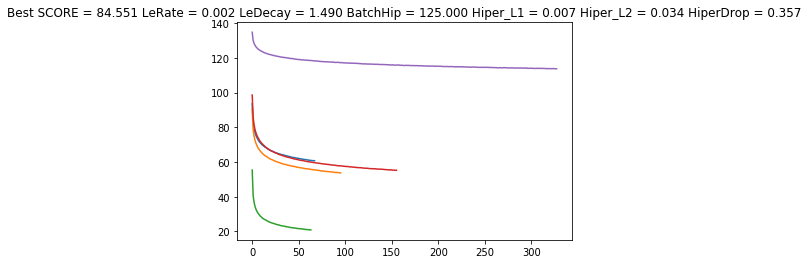

In [17]:
#Sigmoidal

Xm = X_train_scaled.values
ym = y_train
k = 5
kfold = cross_validation.KFold(len(Xm), k)
cvscores = []
bestScore = 5000
arrayBestResults = [None]*6
arte = []

for i, (train, val) in enumerate(kfold):
    
    epoHipe = random.randint(50,350)
    K = random.randint(10,30)
    j = random.randint(0,k)
    
    leRate = np.linspace(0,k/1000,K)
    leDecay = np.logspace(0.25,k/10000,K)
    batchHip = random.randint(99,K*10)
    Hiper_L1 = random.uniform(0.0001,k/100)
    Hiper_L2 = random.uniform(0.0001,k/100)
    HiperDrop = random.uniform(0.2,k/10)

    SigModelHiper = Sequential()
    SigModelHiper.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid",W_regularizer=regularizers.l1_l2(l1=Hiper_L1, l2=Hiper_L2)))
    SigModelHiper.add(Dropout(HiperDrop))
    SigModelHiper.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    SigModelHiper.compile(optimizer=SGD(lr=leRate[j], decay=leDecay[j]),loss='mean_squared_error',metrics=['mse'])
    SigHis5 = SigModelHiper.fit(Xm[train], ym[train], epochs=epoHipe, batch_size=batchHip)
    scores = SigModelHiper.evaluate(Xm[val], ym[val])
    cvscores.append(scores[-1])
    
    if cvscores[i] < bestScore :
        bestScore = cvscores[i]
        arrayBestResults[0] = leRate[j]
        arrayBestResults[1] = leDecay[j]
        arrayBestResults[2] = batchHip
        arrayBestResults[3] = Hiper_L1
        arrayBestResults[4] = Hiper_L2
        arrayBestResults[5] = HiperDrop  
        
    pyplot.plot(SigHis5.history['mean_squared_error'])
    pyplot.title('Best SCORE = %0.3f LeRate = %0.3f LeDecay = %0.3f BatchHip = %0.3f Hiper_L1 = %0.3f Hiper_L2 = %0.3f HiperDrop = %0.3f'%(cvscores[i],arrayBestResults[0],arrayBestResults[1],arrayBestResults[2],arrayBestResults[3],arrayBestResults[4],arrayBestResults[5]))
    pyplot.savefig(os.path.join(my_path, 'Sig_CvScore_K=5_%s.png')%hoje, additional_artists=arte, bbox_inches="tight")


C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`


Epoch 1/234
8770/8770 [==============================] - 3s 315us/step - loss: 314.3474 - mean_squared_error: 79.6027
Epoch 2/234
8770/8770 [==============================] - 1s 74us/step - loss: 302.5501 - mean_squared_error: 67.9978
Epoch 3/234
8770/8770 [==============================] - 1s 75us/step - loss: 298.6928 - mean_squared_error: 64.2119
Epoch 4/234
8770/8770 [==============================] - 1s 73us/step - loss: 296.4405 - mean_squared_error: 62.0061
Epoch 5/234
8770/8770 [==============================] - 1s 74us/step - loss: 294.7666 - mean_squared_error: 60.3667
Epoch 6/234
8770/8770 [==============================] - 1s 73us/step - loss: 293.4812 - mean_squared_error: 59.1087
Epoch 7/234
8770/8770 [==============================] - 1s 74us/step - loss: 292.5103 - mean_squared_error: 58.1607
Epoch 8/234
8770/8770 [==============================] - 1s 74us/step - loss: 291.7025 - mean_squared_error: 57.3725
Epoch 9/234
8770/8770 [==============================] - 1s 74u

8770/8770 [==============================] - 1s 70us/step - loss: 276.9278 - mean_squared_error: 42.9967
Epoch 140/234
8770/8770 [==============================] - 1s 69us/step - loss: 276.8579 - mean_squared_error: 42.9278
Epoch 141/234
8770/8770 [==============================] - 1s 69us/step - loss: 276.9062 - mean_squared_error: 42.9770
Epoch 142/234
8770/8770 [==============================] - 1s 68us/step - loss: 276.6832 - mean_squared_error: 42.7549
Epoch 143/234
8770/8770 [==============================] - 1s 69us/step - loss: 276.6782 - mean_squared_error: 42.7509
Epoch 144/234
8770/8770 [==============================] - 1s 70us/step - loss: 276.7037 - mean_squared_error: 42.7773
Epoch 145/234
8770/8770 [==============================] - 1s 68us/step - loss: 276.7642 - mean_squared_error: 42.8387
Epoch 146/234
8770/8770 [==============================] - 1s 70us/step - loss: 276.6176 - mean_squared_error: 42.6930
Epoch 147/234
8770/8770 [==============================] - 1s 

Epoch 208/234
8770/8770 [==============================] - 1s 69us/step - loss: 274.9511 - mean_squared_error: 41.0696
Epoch 209/234
8770/8770 [==============================] - 1s 68us/step - loss: 275.1747 - mean_squared_error: 41.2937
Epoch 210/234
8770/8770 [==============================] - 1s 70us/step - loss: 275.0666 - mean_squared_error: 41.1861
Epoch 211/234
8770/8770 [==============================] - 1s 70us/step - loss: 274.9759 - mean_squared_error: 41.0960
Epoch 212/234
8770/8770 [==============================] - 1s 68us/step - loss: 274.9538 - mean_squared_error: 41.0745
Epoch 213/234
8770/8770 [==============================] - 1s 69us/step - loss: 275.0834 - mean_squared_error: 41.2046
Epoch 214/234
8770/8770 [==============================] - 1s 69us/step - loss: 274.9315 - mean_squared_error: 41.0532
Epoch 215/234
8770/8770 [==============================] - 1s 70us/step - loss: 274.9674 - mean_squared_error: 41.0896
Epoch 216/234
8770/8770 [=======================

8770/8770 [==============================] - 1s 59us/step - loss: 136.3027 - mean_squared_error: 68.5190
Epoch 112/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.5499 - mean_squared_error: 68.7664
Epoch 113/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.3893 - mean_squared_error: 68.6057
Epoch 114/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.1976 - mean_squared_error: 68.4141
Epoch 115/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.3101 - mean_squared_error: 68.5266
Epoch 116/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.1088 - mean_squared_error: 68.3255
Epoch 117/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.2640 - mean_squared_error: 68.4807
Epoch 118/191
8770/8770 [==============================] - 1s 60us/step - loss: 136.1789 - mean_squared_error: 68.3956
Epoch 119/191
8770/8770 [==============================] - 1s 

Epoch 180/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.5587 - mean_squared_error: 66.7774
Epoch 181/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.3654 - mean_squared_error: 66.5842
Epoch 182/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.2665 - mean_squared_error: 66.4854
Epoch 183/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.1339 - mean_squared_error: 66.3528
Epoch 184/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.1397 - mean_squared_error: 66.3585
Epoch 185/191
8770/8770 [==============================] - 1s 61us/step - loss: 134.1140 - mean_squared_error: 66.3329
Epoch 186/191
8770/8770 [==============================] - 1s 60us/step - loss: 133.8566 - mean_squared_error: 66.0755
Epoch 187/191
8770/8770 [==============================] - 1s 60us/step - loss: 134.0572 - mean_squared_error: 66.2761
Epoch 188/191
8770/8770 [=======================

8770/8770 [==============================] - 1s 59us/step - loss: 150.1295 - mean_squared_error: 13.7358
Epoch 127/339
8770/8770 [==============================] - 1s 60us/step - loss: 150.0330 - mean_squared_error: 13.6403
Epoch 128/339
8770/8770 [==============================] - 1s 61us/step - loss: 150.0057 - mean_squared_error: 13.6141
Epoch 129/339
8770/8770 [==============================] - 1s 61us/step - loss: 150.0829 - mean_squared_error: 13.6923
Epoch 130/339
8770/8770 [==============================] - 1s 62us/step - loss: 149.9944 - mean_squared_error: 13.6048
Epoch 131/339
8770/8770 [==============================] - 1s 64us/step - loss: 150.1023 - mean_squared_error: 13.7137
Epoch 132/339
8770/8770 [==============================] - 1s 61us/step - loss: 149.9884 - mean_squared_error: 13.6008
Epoch 133/339
8770/8770 [==============================] - 1s 60us/step - loss: 149.9472 - mean_squared_error: 13.5606
Epoch 134/339
8770/8770 [==============================] - 1s 

Epoch 195/339
8770/8770 [==============================] - 1s 62us/step - loss: 148.9939 - mean_squared_error: 12.6578
Epoch 196/339
8770/8770 [==============================] - 1s 60us/step - loss: 149.1136 - mean_squared_error: 12.7781
Epoch 197/339
8770/8770 [==============================] - 1s 60us/step - loss: 149.0280 - mean_squared_error: 12.6932
Epoch 198/339
8770/8770 [==============================] - 1s 60us/step - loss: 149.1090 - mean_squared_error: 12.7748
Epoch 199/339
8770/8770 [==============================] - 1s 60us/step - loss: 148.9799 - mean_squared_error: 12.6465
Epoch 200/339
8770/8770 [==============================] - 1s 60us/step - loss: 149.1798 - mean_squared_error: 12.8470
Epoch 201/339
8770/8770 [==============================] - 1s 69us/step - loss: 149.1803 - mean_squared_error: 12.8482
Epoch 202/339
8770/8770 [==============================] - 1s 69us/step - loss: 149.1769 - mean_squared_error: 12.8455
Epoch 203/339
8770/8770 [=======================

Epoch 332/339
8770/8770 [==============================] - 1s 60us/step - loss: 148.1279 - mean_squared_error: 11.8604
Epoch 333/339
8770/8770 [==============================] - 1s 61us/step - loss: 147.9944 - mean_squared_error: 11.7273
Epoch 334/339
8770/8770 [==============================] - 1s 61us/step - loss: 148.2376 - mean_squared_error: 11.9707
Epoch 335/339
8770/8770 [==============================] - 1s 59us/step - loss: 148.1507 - mean_squared_error: 11.8843
Epoch 336/339
8770/8770 [==============================] - 1s 60us/step - loss: 148.1467 - mean_squared_error: 11.8806
Epoch 337/339
8770/8770 [==============================] - 1s 60us/step - loss: 148.1439 - mean_squared_error: 11.8781
Epoch 338/339
8770/8770 [==============================] - 1s 59us/step - loss: 148.1199 - mean_squared_error: 11.8545
Epoch 339/339
975/975 [==============================] - 1s 1ms/step
Epoch 1/70
8770/8770 [==============================] - 3s 319us/step - loss: 329.4458 - mean_squa

8770/8770 [==============================] - 1s 71us/step - loss: 310.8230 - mean_squared_error: 3.2936
Epoch 64/70
8770/8770 [==============================] - 1s 71us/step - loss: 310.7947 - mean_squared_error: 3.2920
Epoch 65/70
8770/8770 [==============================] - 1s 72us/step - loss: 310.7151 - mean_squared_error: 3.2386
Epoch 66/70
8770/8770 [==============================] - 1s 71us/step - loss: 310.7213 - mean_squared_error: 3.2705
Epoch 67/70
8770/8770 [==============================] - 1s 72us/step - loss: 310.6999 - mean_squared_error: 3.2744
Epoch 68/70
8770/8770 [==============================] - 1s 71us/step - loss: 310.6390 - mean_squared_error: 3.2385
Epoch 69/70
8770/8770 [==============================] - 1s 73us/step - loss: 310.6296 - mean_squared_error: 3.2537
Epoch 70/70
975/975 [==============================] - 1s 1ms/step
Epoch 1/190
8770/8770 [==============================] - 3s 304us/step - loss: 417.6798 - mean_squared_error: 133.6053
Epoch 2/190
87

8770/8770 [==============================] - 1s 59us/step - loss: 417.6469 - mean_squared_error: 133.5723
Epoch 130/190
8770/8770 [==============================] - 1s 58us/step - loss: 417.7174 - mean_squared_error: 133.6429
Epoch 131/190
8770/8770 [==============================] - 1s 59us/step - loss: 417.6584 - mean_squared_error: 133.5839
Epoch 132/190
8770/8770 [==============================] - 1s 57us/step - loss: 417.7984 - mean_squared_error: 133.7239
Epoch 133/190
8770/8770 [==============================] - 1s 57us/step - loss: 417.4967 - mean_squared_error: 133.4222
Epoch 134/190
8770/8770 [==============================] - 1s 58us/step - loss: 417.6474 - mean_squared_error: 133.5728
Epoch 135/190
8770/8770 [==============================] - 1s 57us/step - loss: 417.5983 - mean_squared_error: 133.5238
Epoch 136/190
8770/8770 [==============================] - 1s 58us/step - loss: 417.7405 - mean_squared_error: 133.6660
Epoch 137/190
8770/8770 [=============================

8771/8771 [==============================] - 1s 79us/step - loss: 165.8346 - mean_squared_error: 46.4416
Epoch 8/298
8771/8771 [==============================] - 1s 78us/step - loss: 164.9069 - mean_squared_error: 45.5219
Epoch 9/298
8771/8771 [==============================] - 1s 79us/step - loss: 164.1584 - mean_squared_error: 44.7804
Epoch 10/298
8771/8771 [==============================] - 1s 78us/step - loss: 163.4703 - mean_squared_error: 44.0986
Epoch 11/298
8771/8771 [==============================] - 1s 78us/step - loss: 162.8993 - mean_squared_error: 43.5332
Epoch 12/298
8771/8771 [==============================] - 1s 79us/step - loss: 162.3850 - mean_squared_error: 43.0241
Epoch 13/298
8771/8771 [==============================] - 1s 78us/step - loss: 162.1102 - mean_squared_error: 42.7539
Epoch 14/298
8771/8771 [==============================] - 1s 79us/step - loss: 161.6315 - mean_squared_error: 42.2795
Epoch 15/298
8771/8771 [==============================] - 1s 78us/step 

8771/8771 [==============================] - 1s 79us/step - loss: 150.7758 - mean_squared_error: 31.5552
Epoch 146/298
8771/8771 [==============================] - 1s 77us/step - loss: 150.7378 - mean_squared_error: 31.5176
Epoch 147/298
8771/8771 [==============================] - 1s 79us/step - loss: 150.8032 - mean_squared_error: 31.5833
Epoch 148/298
8771/8771 [==============================] - 1s 79us/step - loss: 150.6843 - mean_squared_error: 31.4647
Epoch 149/298
8771/8771 [==============================] - 1s 78us/step - loss: 150.6037 - mean_squared_error: 31.3844
Epoch 150/298
8771/8771 [==============================] - 1s 78us/step - loss: 150.6137 - mean_squared_error: 31.3947
Epoch 151/298
8771/8771 [==============================] - 1s 78us/step - loss: 150.6009 - mean_squared_error: 31.3822
Epoch 152/298
8771/8771 [==============================] - 1s 79us/step - loss: 150.4740 - mean_squared_error: 31.2557
Epoch 153/298
8771/8771 [==============================] - 1s 

Epoch 214/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.4019 - mean_squared_error: 30.1977
Epoch 215/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.3454 - mean_squared_error: 30.1415
Epoch 216/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.4181 - mean_squared_error: 30.2143
Epoch 217/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.4277 - mean_squared_error: 30.2241
Epoch 218/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.3113 - mean_squared_error: 30.1078
Epoch 219/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.3131 - mean_squared_error: 30.1099
Epoch 220/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.2118 - mean_squared_error: 30.0087
Epoch 221/298
8771/8771 [==============================] - 1s 78us/step - loss: 149.2485 - mean_squared_error: 30.0456
Epoch 222/298
8771/8771 [=======================

8771/8771 [==============================] - 1s 68us/step - loss: 795.5518 - mean_squared_error: 10.6580
Epoch 54/260
8771/8771 [==============================] - 1s 68us/step - loss: 795.4653 - mean_squared_error: 10.6685
Epoch 55/260
8771/8771 [==============================] - 1s 69us/step - loss: 795.2471 - mean_squared_error: 10.5454
Epoch 56/260
8771/8771 [==============================] - 1s 68us/step - loss: 795.1179 - mean_squared_error: 10.5100
Epoch 57/260
8771/8771 [==============================] - 1s 68us/step - loss: 795.0201 - mean_squared_error: 10.5040
Epoch 58/260
8771/8771 [==============================] - 1s 69us/step - loss: 794.8375 - mean_squared_error: 10.4118
Epoch 59/260
8771/8771 [==============================] - 1s 69us/step - loss: 794.8223 - mean_squared_error: 10.4850: 0s - loss: 795.3148 - mean_squared_erro
Epoch 60/260
8771/8771 [==============================] - 1s 69us/step - loss: 794.6624 - mean_squared_error: 10.4124
Epoch 61/260
8771/8771 [====

8771/8771 [==============================] - 1s 69us/step - loss: 787.1637 - mean_squared_error: 8.8856
Epoch 192/260
8771/8771 [==============================] - 1s 69us/step - loss: 787.0949 - mean_squared_error: 8.8435
Epoch 193/260
8771/8771 [==============================] - 1s 68us/step - loss: 787.1071 - mean_squared_error: 8.8824
Epoch 194/260
8771/8771 [==============================] - 1s 68us/step - loss: 787.0057 - mean_squared_error: 8.8077
Epoch 195/260
8771/8771 [==============================] - 1s 68us/step - loss: 786.9685 - mean_squared_error: 8.7971
Epoch 196/260
8771/8771 [==============================] - 1s 71us/step - loss: 786.9892 - mean_squared_error: 8.8440
Epoch 197/260
8771/8771 [==============================] - 1s 68us/step - loss: 786.9766 - mean_squared_error: 8.8576
Epoch 198/260
8771/8771 [==============================] - 1s 66us/step - loss: 786.7406 - mean_squared_error: 8.6480
Epoch 199/260
8771/8771 [==============================] - 1s 72us/ste

8771/8771 [==============================] - 1s 81us/step - loss: 522.7400 - mean_squared_error: 9.2604
Epoch 70/227
8771/8771 [==============================] - 1s 81us/step - loss: 522.7971 - mean_squared_error: 9.3636
Epoch 71/227
8771/8771 [==============================] - 1s 80us/step - loss: 522.6208 - mean_squared_error: 9.2328
Epoch 72/227
8771/8771 [==============================] - 1s 81us/step - loss: 522.8274 - mean_squared_error: 9.4839
Epoch 73/227
8771/8771 [==============================] - 1s 82us/step - loss: 522.3628 - mean_squared_error: 9.0630
Epoch 74/227
8771/8771 [==============================] - 1s 80us/step - loss: 522.5030 - mean_squared_error: 9.2470
Epoch 75/227
8771/8771 [==============================] - 1s 83us/step - loss: 522.3754 - mean_squared_error: 9.1621
Epoch 76/227
8771/8771 [==============================] - 1s 80us/step - loss: 522.2676 - mean_squared_error: 9.0965
Epoch 77/227
8771/8771 [==============================] - 1s 81us/step - loss

8771/8771 [==============================] - 1s 81us/step - loss: 518.3934 - mean_squared_error: 8.4122
Epoch 208/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.2857 - mean_squared_error: 8.3198
Epoch 209/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.4055 - mean_squared_error: 8.4548
Epoch 210/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.2300 - mean_squared_error: 8.2944
Epoch 211/227
8771/8771 [==============================] - 1s 82us/step - loss: 518.5065 - mean_squared_error: 8.5860
Epoch 212/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.1928 - mean_squared_error: 8.2873
Epoch 213/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.3830 - mean_squared_error: 8.4924
Epoch 214/227
8771/8771 [==============================] - 1s 81us/step - loss: 518.3866 - mean_squared_error: 8.5109
Epoch 215/227
8771/8771 [==============================] - 1s 82us/ste

8771/8771 [==============================] - 1s 87us/step - loss: 502.1399 - mean_squared_error: 32.1827
Epoch 58/187
8771/8771 [==============================] - 1s 88us/step - loss: 502.0201 - mean_squared_error: 32.0778
Epoch 59/187
8771/8771 [==============================] - 1s 87us/step - loss: 501.9789 - mean_squared_error: 32.0515
Epoch 60/187
8771/8771 [==============================] - 1s 88us/step - loss: 501.8019 - mean_squared_error: 31.8890
Epoch 61/187
8771/8771 [==============================] - 1s 87us/step - loss: 501.8177 - mean_squared_error: 31.9191
Epoch 62/187
8771/8771 [==============================] - 1s 88us/step - loss: 501.6343 - mean_squared_error: 31.7497
Epoch 63/187
8771/8771 [==============================] - 1s 88us/step - loss: 501.6143 - mean_squared_error: 31.7434
Epoch 64/187
8771/8771 [==============================] - 1s 87us/step - loss: 501.5002 - mean_squared_error: 31.6429
Epoch 65/187
8771/8771 [==============================] - 1s 89us/ste

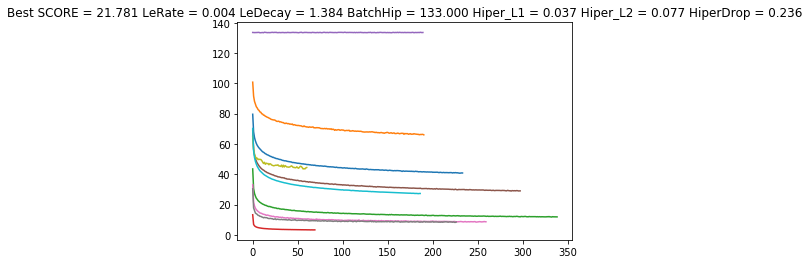

In [18]:
#Sigmoidal

Xm = X_train_scaled.values
ym = y_train
k = 10
kfold = cross_validation.KFold(len(Xm), k)
cvscores = []
arrayBestResults = [None]*6
bestScore = 5000
arte = []


for i, (train, val) in enumerate(kfold):
    
    epoHipe = random.randint(50,350)
    K = random.randint(10,30)
    j = random.randint(0,k)
    
    leRate = np.linspace(0,k/1000,K)
    leDecay = np.logspace(0.25,k/10000,K)
    batchHip = random.randint(99,K*10)
    Hiper_L1 = random.uniform(0.0001,k/100)
    Hiper_L2 = random.uniform(0.0001,k/100)
    HiperDrop = random.uniform(0.2,k/10)

    SigModelHiper = Sequential()
    SigModelHiper.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid",W_regularizer=regularizers.l1_l2(l1=Hiper_L1, l2=Hiper_L2)))
    SigModelHiper.add(Dropout(HiperDrop))
    SigModelHiper.add(Dense(1, kernel_initializer='uniform',activation="linear"))
    SigModelHiper.compile(optimizer=SGD(lr=leRate[j], decay=leDecay[j]),loss='mean_squared_error',metrics=['mse'])
    SigHis10 = SigModelHiper.fit(Xm[train], ym[train], epochs=epoHipe, batch_size=batchHip)
    scores = SigModelHiper.evaluate(Xm[val], ym[val])
    cvscores.append(scores[-1])
    
    if cvscores[i]<bestScore :
        bestScore = cvscores[i]
        arrayBestResults[0] = leRate[j]
        arrayBestResults[1] = leDecay[j]
        arrayBestResults[2] = batchHip
        arrayBestResults[3] = Hiper_L1
        arrayBestResults[4] = Hiper_L2
        arrayBestResults[5] = HiperDrop
        
    pyplot.plot(SigHis10.history['mean_squared_error'])
    pyplot.title('Best SCORE = %0.3f LeRate = %0.3f LeDecay = %0.3f BatchHip = %0.3f Hiper_L1 = %0.3f Hiper_L2 = %0.3f HiperDrop = %0.3f'%(cvscores[i],arrayBestResults[0],arrayBestResults[1],arrayBestResults[2],arrayBestResults[3],arrayBestResults[4],arrayBestResults[5]))
    pyplot.savefig(os.path.join(my_path, 'Sig_CvScore_K=10_%s.png')%hoje, additional_artists=arte, bbox_inches="tight")

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`


Epoch 1/82
7796/7796 [==============================] - 3s 367us/step - loss: 295.9081 - mean_squared_error: 142.3538
Epoch 2/82
7796/7796 [==============================] - 1s 83us/step - loss: 295.9230 - mean_squared_error: 142.3686
Epoch 3/82
7796/7796 [==============================] - 1s 80us/step - loss: 295.9157 - mean_squared_error: 142.3614
Epoch 4/82
7796/7796 [==============================] - 1s 80us/step - loss: 295.9386 - mean_squared_error: 142.3842
Epoch 5/82
7796/7796 [==============================] - 1s 81us/step - loss: 295.9147 - mean_squared_error: 142.3603
Epoch 6/82
7796/7796 [==============================] - 1s 80us/step - loss: 295.9263 - mean_squared_error: 142.3719
Epoch 7/82
7796/7796 [==============================] - 1s 83us/step - loss: 295.9402 - mean_squared_error: 142.3859
Epoch 8/82
7796/7796 [==============================] - 1s 80us/step - loss: 295.9349 - mean_squared_error: 142.3806
Epoch 9/82
7796/7796 [==============================] - 1s 81us

7796/7796 [==============================] - 0s 61us/step - loss: 476.2389 - mean_squared_error: 132.6607
Epoch 57/334
7796/7796 [==============================] - 0s 56us/step - loss: 476.2267 - mean_squared_error: 132.6548
Epoch 58/334
7796/7796 [==============================] - 0s 56us/step - loss: 476.2311 - mean_squared_error: 132.6654
Epoch 59/334
7796/7796 [==============================] - 0s 59us/step - loss: 476.2083 - mean_squared_error: 132.6488
Epoch 60/334
7796/7796 [==============================] - 1s 65us/step - loss: 476.2003 - mean_squared_error: 132.6468
Epoch 61/334
7796/7796 [==============================] - 0s 59us/step - loss: 476.2051 - mean_squared_error: 132.6574
Epoch 62/334
7796/7796 [==============================] - 0s 60us/step - loss: 476.1903 - mean_squared_error: 132.6485
Epoch 63/334
7796/7796 [==============================] - 0s 60us/step - loss: 476.1671 - mean_squared_error: 132.6310
Epoch 64/334
7796/7796 [==============================] - 0s 

7796/7796 [==============================] - 0s 58us/step - loss: 475.4894 - mean_squared_error: 132.3463
Epoch 193/334
7796/7796 [==============================] - 0s 59us/step - loss: 475.4788 - mean_squared_error: 132.3377
Epoch 194/334
7796/7796 [==============================] - 0s 60us/step - loss: 475.4775 - mean_squared_error: 132.3382
Epoch 195/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.4714 - mean_squared_error: 132.3340
Epoch 196/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.4639 - mean_squared_error: 132.3284
Epoch 197/334
7796/7796 [==============================] - 0s 59us/step - loss: 475.4957 - mean_squared_error: 132.3620
Epoch 198/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.4638 - mean_squared_error: 132.3321
Epoch 199/334
7796/7796 [==============================] - 0s 59us/step - loss: 475.4750 - mean_squared_error: 132.3450
Epoch 200/334
7796/7796 [=============================

7796/7796 [==============================] - 0s 58us/step - loss: 475.1461 - mean_squared_error: 132.2041
Epoch 329/334
7796/7796 [==============================] - 0s 60us/step - loss: 475.1603 - mean_squared_error: 132.2194
Epoch 330/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.1359 - mean_squared_error: 132.1961
Epoch 331/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.1287 - mean_squared_error: 132.1900
Epoch 332/334
7796/7796 [==============================] - 0s 58us/step - loss: 475.1501 - mean_squared_error: 132.2124
Epoch 333/334
7796/7796 [==============================] - 0s 59us/step - loss: 475.1359 - mean_squared_error: 132.1993
Epoch 334/334
1949/1949 [==============================] - 1s 601us/step
Epoch 1/94
7796/7796 [==============================] - 3s 358us/step - loss: 244.3135 - mean_squared_error: 146.5462
Epoch 2/94
7796/7796 [==============================] - 1s 66us/step - loss: 243.8814 - mean_squared_er

Epoch 63/94
7796/7796 [==============================] - 1s 76us/step - loss: 242.8576 - mean_squared_error: 145.1514
Epoch 64/94
7796/7796 [==============================] - 1s 69us/step - loss: 242.8810 - mean_squared_error: 145.1750
Epoch 65/94
7796/7796 [==============================] - 1s 71us/step - loss: 242.8408 - mean_squared_error: 145.1350
Epoch 66/94
7796/7796 [==============================] - 1s 69us/step - loss: 242.8764 - mean_squared_error: 145.1707
Epoch 67/94
7796/7796 [==============================] - 1s 65us/step - loss: 242.8778 - mean_squared_error: 145.1723
Epoch 68/94
7796/7796 [==============================] - 1s 66us/step - loss: 242.8794 - mean_squared_error: 145.1741
Epoch 69/94
7796/7796 [==============================] - 1s 66us/step - loss: 242.8232 - mean_squared_error: 145.1180
Epoch 70/94
7796/7796 [==============================] - 1s 66us/step - loss: 242.8533 - mean_squared_error: 145.1482
Epoch 71/94
7796/7796 [==============================] -

7796/7796 [==============================] - 1s 69us/step - loss: 564.4894 - mean_squared_error: 153.8318
Epoch 106/241
7796/7796 [==============================] - 1s 70us/step - loss: 564.5131 - mean_squared_error: 153.8568
Epoch 107/241
7796/7796 [==============================] - 1s 70us/step - loss: 564.4826 - mean_squared_error: 153.8276
Epoch 108/241
7796/7796 [==============================] - 1s 68us/step - loss: 564.4632 - mean_squared_error: 153.8095
Epoch 109/241
7796/7796 [==============================] - 1s 69us/step - loss: 564.4697 - mean_squared_error: 153.8172
Epoch 110/241
7796/7796 [==============================] - 1s 70us/step - loss: 564.4668 - mean_squared_error: 153.8154
Epoch 111/241
7796/7796 [==============================] - 1s 69us/step - loss: 564.4959 - mean_squared_error: 153.8458
Epoch 112/241
7796/7796 [==============================] - 1s 70us/step - loss: 564.4456 - mean_squared_error: 153.7965
Epoch 113/241
7796/7796 [=============================

1949/1949 [==============================] - 1s 606us/step
Epoch 1/172
7796/7796 [==============================] - 3s 380us/step - loss: 205.3256 - mean_squared_error: 153.1951
Epoch 2/172
7796/7796 [==============================] - 1s 82us/step - loss: 205.2972 - mean_squared_error: 153.1667
Epoch 3/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3084 - mean_squared_error: 153.1779
Epoch 4/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.2820 - mean_squared_error: 153.1515
Epoch 5/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.2963 - mean_squared_error: 153.1658
Epoch 6/172
7796/7796 [==============================] - 1s 84us/step - loss: 205.2969 - mean_squared_error: 153.1664
Epoch 7/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3317 - mean_squared_error: 153.2012
Epoch 8/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3042 - mean_squared_error: 153.1

7796/7796 [==============================] - 1s 83us/step - loss: 205.2921 - mean_squared_error: 153.1616
Epoch 137/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.2750 - mean_squared_error: 153.1445
Epoch 138/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3057 - mean_squared_error: 153.1752
Epoch 139/172
7796/7796 [==============================] - 1s 82us/step - loss: 205.2743 - mean_squared_error: 153.1438
Epoch 140/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3366 - mean_squared_error: 153.2061
Epoch 141/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.3467 - mean_squared_error: 153.2162
Epoch 142/172
7796/7796 [==============================] - 1s 84us/step - loss: 205.3107 - mean_squared_error: 153.1802
Epoch 143/172
7796/7796 [==============================] - 1s 83us/step - loss: 205.2726 - mean_squared_error: 153.1421
Epoch 144/172
7796/7796 [=============================

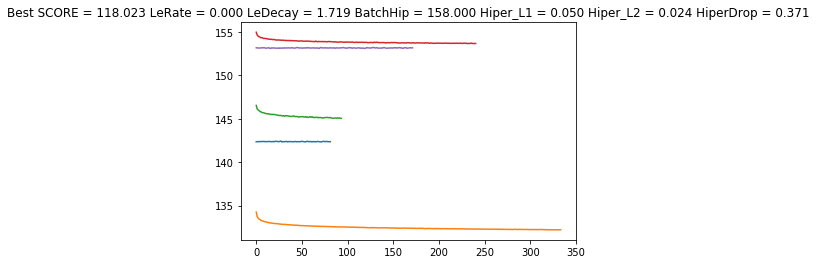

In [19]:
#Relu

Xm = X_train_scaled.values
ym = y_train
k = 5
kfold = cross_validation.KFold(len(Xm), k)
cvscores = []
arte = []
bestScore = 5000
arrayBestResults = [None]*6

for i, (train, val) in enumerate(kfold):
    
    epoHipe = random.randint(50,350)
    K = random.randint(10,30)
    j = random.randint(0,k)
    
    leRate = np.linspace(0,k/1000,K)
    leDecay = np.logspace(0.25,k/10000,K)
    batchHip = random.randint(99,K*10)
    Hiper_L1 = random.uniform(0.0001,k/100)
    Hiper_L2 = random.uniform(0.0001,k/100)
    HiperDrop = random.uniform(0.2,k/10)

    ReluModelHiper = Sequential()
    ReluModelHiper.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu",W_regularizer=regularizers.l1_l2(l1=Hiper_L1, l2=Hiper_L2)))
    ReluModelHiper.add(Dropout(HiperDrop))
    ReluModelHiper.add(Dense(1, kernel_initializer='uniform',activation="sigmoid"))
    ReluModelHiper.compile(optimizer=SGD(lr=leRate[j], decay=leDecay[j]),loss='mean_squared_error',metrics=['mse'])
    ReluHis5 = ReluModelHiper.fit(Xm[train], ym[train], epochs=epoHipe, batch_size=batchHip)
    scores = ReluModelHiper.evaluate(Xm[val], ym[val])
    cvscores.append(scores[-1])
    
    if cvscores[i]<bestScore :
        bestScore = cvscores[i]
        arrayBestResults[0] = leRate[j]
        arrayBestResults[1] = leDecay[j]
        arrayBestResults[2] = batchHip
        arrayBestResults[3] = Hiper_L1
        arrayBestResults[4] = Hiper_L2
        arrayBestResults[5] = HiperDrop
            
    pyplot.plot(ReluHis5.history['mean_squared_error'])
    pyplot.title('Best SCORE = %0.3f LeRate = %0.3f LeDecay = %0.3f BatchHip = %0.3f Hiper_L1 = %0.3f Hiper_L2 = %0.3f HiperDrop = %0.3f'%(cvscores[i],arrayBestResults[0],arrayBestResults[1],arrayBestResults[2],arrayBestResults[3],arrayBestResults[4],arrayBestResults[5]))
    pyplot.savefig(os.path.join(my_path, 'Relu_CvScore_K=5_%s.png')%hoje, additional_artists=arte, bbox_inches="tight")

In [20]:
#Relu

Xm = X_train_scaled.values
ym = y_train
k = 10
kfold = cross_validation.KFold(len(Xm), k)
cvscores = []
bestScore = 5000
arrayBestResults = [None]*6
arte = []

for i, (train, val) in enumerate(kfold):
    
    epoHipe = random.randint(50,350)
    K = random.randint(10,30)
    j = random.randint(0,k)
    
    leRate = np.linspace(0,k/1000,K)
    leDecay = np.logspace(0.25,k/10000,K)
    batchHip = random.randint(99,K*10)
    Hiper_L1 = random.uniform(0.0001,k/100)
    Hiper_L2 = random.uniform(0.0001,k/100)
    HiperDrop = random.uniform(0.2,k/10)

    ReluModelHiper = Sequential()
    ReluModelHiper.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu",W_regularizer=regularizers.l1_l2(l1=Hiper_L1, l2=Hiper_L2)))
    ReluModelHiper.add(Dropout(HiperDrop))
    ReluModelHiper.add(Dense(1, kernel_initializer='uniform',activation="sigmoid"))
    ReluModelHiper.compile(optimizer=SGD(lr=leRate[j], decay=leDecay[j]),loss='mean_squared_error',metrics=['mse'])
    ReluHis10 = ReluModelHiper.fit(Xm[train], ym[train], epochs=epoHipe, batch_size=batchHip)
    scores = ReluModelHiper.evaluate(Xm[val], ym[val])
    cvscores.append(scores[-1])
    
    if cvscores[i]<bestScore :
        bestScore = cvscores[i]
        arrayBestResults[0] = leRate[j]
        arrayBestResults[1] = leDecay[j]
        arrayBestResults[2] = batchHip
        arrayBestResults[3] = Hiper_L1
        arrayBestResults[4] = Hiper_L2
        arrayBestResults[5] = HiperDrop
            
    
    pyplot.plot(ReluHis10.history['mean_squared_error'])
    pyplot.title('Best SCORE = %0.3f LeRate = %0.3f LeDecay = %0.3f BatchHip = %0.3f Hiper_L1 = %0.3f Hiper_L2 = %0.3f HiperDrop = %0.3f'%(cvscores[i],arrayBestResults[0],arrayBestResults[1],arrayBestResults[2],arrayBestResults[3],arrayBestResults[4],arrayBestResults[5]))
    pyplot.savefig(os.path.join(my_path, 'Relu_CvScore_K=10_%s.png')%hoje, additional_artists=arte, bbox_inches="tight")

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`


Epoch 1/179
8770/8770 [==============================] - 3s 316us/step - loss: 627.9132 - mean_squared_error: 142.1010
Epoch 2/179
8770/8770 [==============================] - 0s 49us/step - loss: 622.5399 - mean_squared_error: 140.6323
Epoch 3/179
8770/8770 [==============================] - 0s 48us/step - loss: 620.6096 - mean_squared_error: 140.1880
Epoch 4/179
8770/8770 [==============================] - 0s 48us/step - loss: 619.4091 - mean_squared_error: 139.9479
Epoch 5/179
8770/8770 [==============================] - 0s 50us/step - loss: 618.5027 - mean_squared_error: 139.7534
Epoch 6/179
8770/8770 [==============================] - 0s 48us/step - loss: 617.8310 - mean_squared_error: 139.6478
Epoch 7/179
8770/8770 [==============================] - 0s 48us/step - loss: 617.2541 - mean_squared_error: 139.5410
Epoch 8/179
8770/8770 [==============================] - 0s 50us/step - loss: 616.7795 - mean_squared_error: 139.4686
Epoch 9/179
8770/8770 [==============================] 

8770/8770 [==============================] - 0s 47us/step - loss: 607.2849 - mean_squared_error: 138.0629
Epoch 138/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.2950 - mean_squared_error: 138.0932
Epoch 139/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.2385 - mean_squared_error: 138.0567
Epoch 140/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.2000 - mean_squared_error: 138.0383
Epoch 141/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.1758 - mean_squared_error: 138.0339
Epoch 142/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.1490 - mean_squared_error: 138.0268
Epoch 143/179
8770/8770 [==============================] - 0s 48us/step - loss: 607.1409 - mean_squared_error: 138.0382
Epoch 144/179
8770/8770 [==============================] - 0s 47us/step - loss: 607.1246 - mean_squared_error: 138.0413
Epoch 145/179
8770/8770 [=============================

8770/8770 [==============================] - 1s 67us/step - loss: 859.7761 - mean_squared_error: 137.0269
Epoch 31/282
8770/8770 [==============================] - 1s 68us/step - loss: 859.6264 - mean_squared_error: 137.0163
Epoch 32/282
8770/8770 [==============================] - 1s 68us/step - loss: 859.4950 - mean_squared_error: 137.0195
Epoch 33/282
8770/8770 [==============================] - 1s 67us/step - loss: 859.3192 - mean_squared_error: 136.9739
Epoch 34/282
8770/8770 [==============================] - 1s 69us/step - loss: 859.1905 - mean_squared_error: 136.9717
Epoch 35/282
8770/8770 [==============================] - 1s 67us/step - loss: 859.0620 - mean_squared_error: 136.9658
Epoch 36/282
8770/8770 [==============================] - 1s 68us/step - loss: 858.9259 - mean_squared_error: 136.9488
Epoch 37/282
8770/8770 [==============================] - 1s 67us/step - loss: 858.8269 - mean_squared_error: 136.9656
Epoch 38/282
8770/8770 [==============================] - 1s 

Epoch 99/282
8770/8770 [==============================] - 1s 68us/step - loss: 854.2982 - mean_squared_error: 136.5669
Epoch 100/282
8770/8770 [==============================] - 1s 68us/step - loss: 854.2597 - mean_squared_error: 136.5703
Epoch 101/282
8770/8770 [==============================] - 1s 67us/step - loss: 854.1990 - mean_squared_error: 136.5513
Epoch 102/282
8770/8770 [==============================] - 1s 68us/step - loss: 854.1575 - mean_squared_error: 136.5511
Epoch 103/282
8770/8770 [==============================] - 1s 69us/step - loss: 854.1222 - mean_squared_error: 136.5567
Epoch 104/282
8770/8770 [==============================] - 1s 67us/step - loss: 854.0797 - mean_squared_error: 136.5546
Epoch 105/282
8770/8770 [==============================] - 1s 67us/step - loss: 854.0405 - mean_squared_error: 136.5554
Epoch 106/282
8770/8770 [==============================] - 1s 67us/step - loss: 853.9894 - mean_squared_error: 136.5436
Epoch 107/282
8770/8770 [================

8770/8770 [==============================] - 1s 67us/step - loss: 850.4083 - mean_squared_error: 136.2733
Epoch 236/282
8770/8770 [==============================] - 1s 68us/step - loss: 850.3972 - mean_squared_error: 136.2800
Epoch 237/282
8770/8770 [==============================] - 1s 68us/step - loss: 850.3738 - mean_squared_error: 136.2745
Epoch 238/282
8770/8770 [==============================] - 1s 66us/step - loss: 850.3585 - mean_squared_error: 136.2768
Epoch 239/282
8770/8770 [==============================] - 1s 67us/step - loss: 850.3523 - mean_squared_error: 136.2883
Epoch 240/282
8770/8770 [==============================] - 1s 67us/step - loss: 850.3192 - mean_squared_error: 136.2726
Epoch 241/282
8770/8770 [==============================] - 1s 67us/step - loss: 850.2740 - mean_squared_error: 136.2450
Epoch 242/282
8770/8770 [==============================] - 1s 68us/step - loss: 850.3044 - mean_squared_error: 136.2927
Epoch 243/282
8770/8770 [=============================

Epoch 89/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.9801 - mean_squared_error: 131.1813
Epoch 90/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.8497 - mean_squared_error: 131.1771
Epoch 91/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.7236 - mean_squared_error: 131.1755
Epoch 92/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.5922 - mean_squared_error: 131.1673
Epoch 93/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.4735 - mean_squared_error: 131.1707
Epoch 94/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.3498 - mean_squared_error: 131.1675
Epoch 95/103
8770/8770 [==============================] - 1s 78us/step - loss: 751.2236 - mean_squared_error: 131.1608
Epoch 96/103
8770/8770 [==============================] - 1s 79us/step - loss: 751.1087 - mean_squared_error: 131.1636
Epoch 97/103
8770/8770 [========================

8771/8771 [==============================] - 1s 67us/step - loss: 279.6057 - mean_squared_error: 139.7744
Epoch 52/258
8771/8771 [==============================] - 1s 68us/step - loss: 279.6120 - mean_squared_error: 139.7827
Epoch 53/258
8771/8771 [==============================] - 1s 66us/step - loss: 279.5949 - mean_squared_error: 139.7675
Epoch 54/258
8771/8771 [==============================] - 1s 66us/step - loss: 279.5760 - mean_squared_error: 139.7505
Epoch 55/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.5847 - mean_squared_error: 139.7610
Epoch 56/258
8771/8771 [==============================] - 1s 66us/step - loss: 279.5592 - mean_squared_error: 139.7373
Epoch 57/258
8771/8771 [==============================] - 1s 66us/step - loss: 279.5510 - mean_squared_error: 139.7309
Epoch 58/258
8771/8771 [==============================] - 1s 68us/step - loss: 279.5670 - mean_squared_error: 139.7487
Epoch 59/258
8771/8771 [==============================] - 1s 

8771/8771 [==============================] - 1s 66us/step - loss: 279.0838 - mean_squared_error: 139.3846
Epoch 188/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.0429 - mean_squared_error: 139.3442
Epoch 189/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.0554 - mean_squared_error: 139.3572
Epoch 190/258
8771/8771 [==============================] - 1s 66us/step - loss: 279.0583 - mean_squared_error: 139.3607
Epoch 191/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.0441 - mean_squared_error: 139.3470
Epoch 192/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.0625 - mean_squared_error: 139.3658
Epoch 193/258
8771/8771 [==============================] - 1s 68us/step - loss: 279.0475 - mean_squared_error: 139.3514
Epoch 194/258
8771/8771 [==============================] - 1s 67us/step - loss: 279.0414 - mean_squared_error: 139.3458
Epoch 195/258
8771/8771 [=============================

8771/8771 [==============================] - 1s 78us/step - loss: 280.4072 - mean_squared_error: 140.7719
Epoch 66/227
8771/8771 [==============================] - 1s 80us/step - loss: 280.4127 - mean_squared_error: 140.7861
Epoch 67/227
8771/8771 [==============================] - 1s 80us/step - loss: 280.3802 - mean_squared_error: 140.7622
Epoch 68/227
8771/8771 [==============================] - 1s 78us/step - loss: 280.3560 - mean_squared_error: 140.7464
Epoch 69/227
8771/8771 [==============================] - 1s 79us/step - loss: 280.3633 - mean_squared_error: 140.7620
Epoch 70/227
8771/8771 [==============================] - 1s 80us/step - loss: 280.3696 - mean_squared_error: 140.7765
Epoch 71/227
8771/8771 [==============================] - 1s 78us/step - loss: 280.3356 - mean_squared_error: 140.7505
Epoch 72/227
8771/8771 [==============================] - 1s 78us/step - loss: 280.3207 - mean_squared_error: 140.7436
Epoch 73/227
8771/8771 [==============================] - 1s 

8771/8771 [==============================] - 1s 81us/step - loss: 279.6258 - mean_squared_error: 140.6302
Epoch 202/227
8771/8771 [==============================] - 1s 78us/step - loss: 279.6247 - mean_squared_error: 140.6320
Epoch 203/227
8771/8771 [==============================] - 1s 78us/step - loss: 279.6063 - mean_squared_error: 140.6164
Epoch 204/227
8771/8771 [==============================] - 1s 78us/step - loss: 279.6035 - mean_squared_error: 140.6164
Epoch 205/227
8771/8771 [==============================] - 1s 79us/step - loss: 279.5921 - mean_squared_error: 140.6078
Epoch 206/227
8771/8771 [==============================] - 1s 81us/step - loss: 279.5940 - mean_squared_error: 140.6124
Epoch 207/227
8771/8771 [==============================] - 1s 81us/step - loss: 279.5986 - mean_squared_error: 140.6197
Epoch 208/227
8771/8771 [==============================] - 1s 78us/step - loss: 279.6011 - mean_squared_error: 140.6250
Epoch 209/227
8771/8771 [=============================

8771/8771 [==============================] - 1s 67us/step - loss: 498.9880 - mean_squared_error: 150.5462
Epoch 111/228
8771/8771 [==============================] - 1s 67us/step - loss: 498.9424 - mean_squared_error: 150.5006
Epoch 112/228
8771/8771 [==============================] - 1s 66us/step - loss: 499.0081 - mean_squared_error: 150.5663
Epoch 113/228
8771/8771 [==============================] - 1s 67us/step - loss: 498.9956 - mean_squared_error: 150.5538
Epoch 114/228
8771/8771 [==============================] - 1s 65us/step - loss: 498.9921 - mean_squared_error: 150.5503
Epoch 115/228
8771/8771 [==============================] - 1s 66us/step - loss: 498.9495 - mean_squared_error: 150.5077
Epoch 116/228
8771/8771 [==============================] - 1s 66us/step - loss: 498.9755 - mean_squared_error: 150.5337
Epoch 117/228
8771/8771 [==============================] - 1s 68us/step - loss: 498.9728 - mean_squared_error: 150.5310
Epoch 118/228
8771/8771 [=============================

8771/8771 [==============================] - 1s 77us/step - loss: 458.0379 - mean_squared_error: 152.1696
Epoch 18/140
8771/8771 [==============================] - 1s 77us/step - loss: 457.9977 - mean_squared_error: 152.1294
Epoch 19/140
8771/8771 [==============================] - 1s 78us/step - loss: 458.0499 - mean_squared_error: 152.1816
Epoch 20/140
8771/8771 [==============================] - 1s 76us/step - loss: 457.9676 - mean_squared_error: 152.0993
Epoch 21/140
8771/8771 [==============================] - 1s 78us/step - loss: 457.9431 - mean_squared_error: 152.0748
Epoch 22/140
8771/8771 [==============================] - 1s 77us/step - loss: 458.0629 - mean_squared_error: 152.1946
Epoch 23/140
8771/8771 [==============================] - 1s 77us/step - loss: 458.0817 - mean_squared_error: 152.2134
Epoch 24/140
8771/8771 [==============================] - 1s 76us/step - loss: 457.9714 - mean_squared_error: 152.1030
Epoch 25/140
8771/8771 [==============================] - 1s 

Epoch 86/140
8771/8771 [==============================] - 1s 77us/step - loss: 458.0287 - mean_squared_error: 152.1604
Epoch 87/140
8771/8771 [==============================] - 1s 77us/step - loss: 458.0284 - mean_squared_error: 152.1601
Epoch 88/140
8771/8771 [==============================] - 1s 76us/step - loss: 458.0469 - mean_squared_error: 152.1786
Epoch 89/140
8771/8771 [==============================] - 1s 77us/step - loss: 458.0172 - mean_squared_error: 152.1489
Epoch 90/140
8771/8771 [==============================] - 1s 78us/step - loss: 458.0393 - mean_squared_error: 152.1710
Epoch 91/140
8771/8771 [==============================] - 1s 77us/step - loss: 457.9671 - mean_squared_error: 152.0988
Epoch 92/140
8771/8771 [==============================] - 1s 77us/step - loss: 457.9987 - mean_squared_error: 152.1303
Epoch 93/140
8771/8771 [==============================] - 1s 78us/step - loss: 457.9383 - mean_squared_error: 152.0700
Epoch 94/140
8771/8771 [========================

8771/8771 [==============================] - 1s 90us/step - loss: 875.1950 - mean_squared_error: 147.7748
Epoch 15/218
8771/8771 [==============================] - 1s 89us/step - loss: 875.1875 - mean_squared_error: 147.7673
Epoch 16/218
8771/8771 [==============================] - 1s 91us/step - loss: 875.2032 - mean_squared_error: 147.7830
Epoch 17/218
8771/8771 [==============================] - 1s 86us/step - loss: 875.2076 - mean_squared_error: 147.7874
Epoch 18/218
8771/8771 [==============================] - 1s 93us/step - loss: 875.2186 - mean_squared_error: 147.7984
Epoch 19/218
8771/8771 [==============================] - 1s 90us/step - loss: 875.1804 - mean_squared_error: 147.7601
Epoch 20/218
8771/8771 [==============================] - 1s 90us/step - loss: 875.2095 - mean_squared_error: 147.7893
Epoch 21/218
8771/8771 [==============================] - 1s 89us/step - loss: 875.1933 - mean_squared_error: 147.7730
Epoch 22/218
8771/8771 [==============================] - 1s 

Epoch 83/218
8771/8771 [==============================] - 1s 90us/step - loss: 875.1912 - mean_squared_error: 147.7710
Epoch 84/218
8771/8771 [==============================] - 1s 92us/step - loss: 875.1875 - mean_squared_error: 147.7673
Epoch 85/218
8771/8771 [==============================] - 1s 91us/step - loss: 875.1846 - mean_squared_error: 147.7643
Epoch 86/218
8771/8771 [==============================] - 1s 95us/step - loss: 875.1922 - mean_squared_error: 147.7720
Epoch 87/218
8771/8771 [==============================] - 1s 89us/step - loss: 875.1978 - mean_squared_error: 147.7776
Epoch 88/218
8771/8771 [==============================] - 1s 91us/step - loss: 875.2003 - mean_squared_error: 147.7801
Epoch 89/218
8771/8771 [==============================] - 1s 90us/step - loss: 875.1749 - mean_squared_error: 147.7547
Epoch 90/218
8771/8771 [==============================] - 1s 91us/step - loss: 875.2195 - mean_squared_error: 147.7993
Epoch 91/218
8771/8771 [========================

974/974 [==============================] - 1s 1ms/step
